<a href="https://colab.research.google.com/github/CristaldoWeint/M71V-M72V_06-M-todos-de-An-lisis-Multivariado---C09-2024/blob/main/CRISTALDO_Multivariado_TFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

image.png

M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS
# M71V/M72V_06 Métodos de Análisis Multivariado

## TRABAJO FINAL

Profesora: Blanca Vitale

Alumno: **CRISTALDO VALENZUELA, MAURICIO EMANUEL**

#OBTENCION DE INFORMACIÓN

In [1]:
#1. Mediante conexión a la API de Kaggle con Python:importe el archivo de dato
!pip install kaggle
import pandas as pd #Importamos la librería pandas para utlizar la función que lee .csv (o .xlsx o .txt, etc)

# Configuración de la API de Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset el archivo
dataset = "mauriciocristaldo/eepp-e-indicadores-seguros-argentina-2024-06"
file = "indicadores_sinensup_202406_corregido.csv"
!kaggle datasets download -d {dataset} -f {file}



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mauriciocristaldo/eepp-e-indicadores-seguros-argentina-2024-06
License(s): DbCL-1.0
100% 155k/155k [00:00<00:00, 293kB/s]
100% 155k/155k [00:00<00:00, 292kB/s]


In [2]:
df_original = pd.read_csv('/content/indicadores_sinensup_202406_corregido.csv', sep=';') #/content/indicadores_sinensup_202406_corregido.csv

In [3]:
df_original.head()

Entidad N Entidad NJ Entidad Denominacion SEGMENTO  Rank    TOP  \
0          1          A          AFIANZADORA       PM    92  RESTO   
1          2          C            AGROSALTA       PM   113  RESTO   
2          3          A                 ALBA       PM   121  RESTO   
3          4          A              ALLIANZ       PM    11     20   
4          5          A            ANTaRTIDA       PM   123  RESTO   

   A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  ...  \
0         7.534390e+04    4.418959e+06  2.538016e+06  0.000000e+00  ...   
1         2.256459e+06    6.147431e+07  1.358144e+07  1.764929e+07  ...   
2         1.207561e+05    3.055744e+06  9.179537e+05  2.597781e+05  ...   
3         1.387707e+07    2.869870e+08  1.256212e+08  7.954588e+06  ...   
4         1.887429e+05    3.332890e+05  1.188759e+06  8.732468e+06  ...   

   RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
0                  0.000000e+00                0.000         -286023.633   
1                  4.415820e+07                0.000         -837382.362   
2                  3.690407e+06               -1.119         -936868.376   
3                  3.352328e+08           357754.610               0.000   
4                  5.113801e+04             -148.153               0.000   

   RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM   RF -  TOTAL  \
0                              -1441457.503 -3.062344e+06 -2.099534e+06   
1                               -330014.242 -6.548793e+07 -1.891490e+07   
2                              -2514450.999 -2.484058e+06  2.411046e+05   
3                              -4917388.283 -5.209753e+08 -6.041762e+07   
4                              -1325125.271  1.112795e+06  9.100645e+05   

   RF -  ResultadoOperacionesOrdinarias  \
0                          3.586780e+05   
1                         -1.526299e+07   
2                          4.484604e+05   
3                         -3.653974e+07   
4                          2.278367e+06   

   RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  \
0                                         0.0                 -2.354916e+05   
1                                         0.0                  0.000000e+00   
2                                         0.0                 -4.229918e+04   
3                                         0.0                  1.045464e+07   
4                                         0.0                  0.000000e+00   

   RF -  RESULTADODELEJERCICIO  
0                 1.231864e+05  
1                -1.526299e+07  
2                 4.061612e+05  
3                -2.608509e+07  
4                 2.278367e+06  

[5 rows x 87 columns]

In [4]:
#df_original = df_original1.loc[df_original1['TOP'] != 'RESTO']
#df_original.head()

In [5]:
import pandas as pd

print(df_original.dtypes)

Entidad N                                       int64
Entidad NJ                                     object
Entidad Denominacion                           object
SEGMENTO                                       object
Rank                                            int64
                                               ...   
RF -  TOTAL                                   float64
RF -  ResultadoOperacionesOrdinarias          float64
RF -  Resultado OperacionesExtraordinarias    float64
RF -  Impuestoa lasGanancias                  float64
RF -  RESULTADODELEJERCICIO                   float64
Length: 87, dtype: object


In [6]:
df_corr = df_original.iloc[:, 6:]
df_corr.head()

A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  \
0         7.534390e+04    4.418959e+06  2.538016e+06  0.000000e+00   
1         2.256459e+06    6.147431e+07  1.358144e+07  1.764929e+07   
2         1.207561e+05    3.055744e+06  9.179537e+05  2.597781e+05   
3         1.387707e+07    2.869870e+08  1.256212e+08  7.954588e+06   
4         1.887429e+05    3.332890e+05  1.188759e+06  8.732468e+06   

   A- Bienes de Uso     A- Otros      A- TOTAL  P- Deudas c/Asegurados  \
0      2.805741e+05      487.618  7.313381e+06            5.479394e+05   
1      6.439812e+06        0.000  1.014013e+08            1.792510e+07   
2      2.878371e+06   590959.237  7.823562e+06            3.256080e+05   
3      2.982617e+07  4199252.894  4.684653e+08            1.368835e+08   
4      1.933008e+06    14865.328  1.239113e+07            4.287364e+06   

   P- Otras Deudas  P- Compromisos Tecnicos  ...  \
0     3.058200e+06             1.339325e+06  ...   
1     3.025772e+06             2.683422e+06  ...   
2     1.893068e+06             7.264428e+05  ...   
3     6.348320e+07             4.630491e+07  ...   
4     1.808519e+06             4.140773e+05  ...   

   RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
0                  0.000000e+00                0.000         -286023.633   
1                  4.415820e+07                0.000         -837382.362   
2                  3.690407e+06               -1.119         -936868.376   
3                  3.352328e+08           357754.610               0.000   
4                  5.113801e+04             -148.153               0.000   

   RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM   RF -  TOTAL  \
0                              -1441457.503 -3.062344e+06 -2.099534e+06   
1                               -330014.242 -6.548793e+07 -1.891490e+07   
2                              -2514450.999 -2.484058e+06  2.411046e+05   
3                              -4917388.283 -5.209753e+08 -6.041762e+07   
4                              -1325125.271  1.112795e+06  9.100645e+05   

   RF -  ResultadoOperacionesOrdinarias  \
0                          3.586780e+05   
1                         -1.526299e+07   
2                          4.484604e+05   
3                         -3.653974e+07   
4                          2.278367e+06   

   RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  \
0                                         0.0                 -2.354916e+05   
1                                         0.0                  0.000000e+00   
2                                         0.0                 -4.229918e+04   
3                                         0.0                  1.045464e+07   
4                                         0.0                  0.000000e+00   

   RF -  RESULTADODELEJERCICIO  
0                 1.231864e+05  
1                -1.526299e+07  
2                 4.061612e+05  
3                -2.608509e+07  
4                 2.278367e+06  

[5 rows x 81 columns]

In [7]:
df_corr.corr()

A- Disponibilidades  \
A- Disponibilidades                                    1.000000   
A- Inversiones                                         0.614709   
A- Creditos                                            0.653570   
A- Inmuebles                                           0.438003   
A- Bienes de Uso                                       0.449687   
...                                                         ...   
RF -  TOTAL                                           -0.264008   
RF -  ResultadoOperacionesOrdinarias                  -0.104495   
RF -  Resultado OperacionesExtraordinarias             0.000723   
RF -  Impuestoa lasGanancias                          -0.169662   
RF -  RESULTADODELEJERCICIO                           -0.206725   

                                            A- Inversiones  A- Creditos  \
A- Disponibilidades                               0.614709     0.653570   
A- Inversiones                                    1.000000     0.645979   
A- Creditos                                       0.645979     1.000000   
A- Inmuebles                                      0.254663     0.491472   
A- Bienes de Uso                                  0.452991     0.765871   
...                                                    ...          ...   
RF -  TOTAL                                      -0.486765    -0.284993   
RF -  ResultadoOperacionesOrdinarias              0.095063    -0.256783   
RF -  Resultado OperacionesExtraordinarias        0.001855     0.004282   
RF -  Impuestoa lasGanancias                     -0.386872    -0.169877   
RF -  RESULTADODELEJERCICIO                      -0.046646    -0.400864   

                                            A- Inmuebles  A- Bienes de Uso  \
A- Disponibilidades                             0.438003          0.449687   
A- Inversiones                                  0.254663          0.452991   
A- Creditos                                     0.491472          0.765871   
A- Inmuebles                                    1.000000          0.432653   
A- Bienes de Uso                                0.432653          1.000000   
...                                                  ...               ...   
RF -  TOTAL                                    -0.198018         -0.190212   
RF -  ResultadoOperacionesOrdinarias           -0.169189         -0.315612   
RF -  Resultado OperacionesExtraordinarias      0.010044          0.005451   
RF -  Impuestoa lasGanancias                    0.020053         -0.155701   
RF -  RESULTADODELEJERCICIO                    -0.206883         -0.469676   

                                            A- Otros  A- TOTAL  \
A- Disponibilidades                         0.440943  0.692978   
A- Inversiones                              0.220670  0.968453   
A- Creditos                                 0.589056  0.802253   
A- Inmuebles                                0.740725  0.410034   
A- Bienes de Uso                            0.554679  0.615651   
...                                              ...       ...   
RF -  TOTAL                                -0.128887 -0.468217   
RF -  ResultadoOperacionesOrdinarias       -0.169426 -0.009937   
RF -  Resultado OperacionesExtraordinarias  0.000368  0.003129   
RF -  Impuestoa lasGanancias               -0.035885 -0.349527   
RF -  RESULTADODELEJERCICIO                -0.231445 -0.164241   

                                            P- Deudas c/Asegurados  \
A- Disponibilidades                                       0.614902   
A- Inversiones                                            0.711540   
A- Creditos                                               0.738435   
A- Inmuebles                                              0.249363   
A- Bienes de Uso                                          0.548429   
...                                                            ...   
RF -  TOTAL                                              -0.228268   
RF -  ResultadoOperacionesOrdinarias            

# ANALISIS DE COMPONENTES PRINCIPALES (PCA)

## PCA para variables patrimoniales

In [8]:
columnas_a_extraer = [6,7,8,9,10,11,13,14,15,16,18]

In [9]:
df_pca_pat = df_original.iloc[:, columnas_a_extraer].abs()

In [10]:
df_pca_pat.head()

A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  \
0         7.534390e+04    4.418959e+06  2.538016e+06  0.000000e+00   
1         2.256459e+06    6.147431e+07  1.358144e+07  1.764929e+07   
2         1.207561e+05    3.055744e+06  9.179537e+05  2.597781e+05   
3         1.387707e+07    2.869870e+08  1.256212e+08  7.954588e+06   
4         1.887429e+05    3.332890e+05  1.188759e+06  8.732468e+06   

   A- Bienes de Uso     A- Otros  P- Deudas c/Asegurados  P- Otras Deudas  \
0      2.805741e+05      487.618            5.479394e+05     3.058200e+06   
1      6.439812e+06        0.000            1.792510e+07     3.025772e+06   
2      2.878371e+06   590959.237            3.256080e+05     1.893068e+06   
3      2.982617e+07  4199252.894            1.368835e+08     6.348320e+07   
4      1.933008e+06    14865.328            4.287364e+06     1.808519e+06   

   P- Compromisos Tecnicos  P- Previsiones  PATRIMONIO NETO   
0             1.339325e+06        4110.827      2.363805e+06  
1             2.683422e+06       43410.417      7.772361e+07  
2             7.264428e+05      758765.282      4.119678e+06  
3             4.630491e+07     1902365.466      2.198913e+08  
4             4.140773e+05       24026.538      5.857145e+06

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que df_pca_pat es tu DataFrame
X = df_pca_pat.values

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

In [13]:
pca = PCA()
principal_components_pat = pca.fit_transform(X_scaled)

In [14]:
# Crear un DataFrame con la información
explained_variance_ratio = pca.explained_variance_ratio_

df_varianza = pd.DataFrame({'Componente': range(1, len(explained_variance_ratio) + 1),
                            'Varianza Explicada': explained_variance_ratio})

# Mostrar el DataFrame
df_varianza

Componente  Varianza Explicada
0            1            0.558824
1            2            0.149119
2            3            0.110408
3            4            0.052571
4            5            0.046495
5            6            0.027870
6            7            0.020070
7            8            0.018212
8            9            0.009472
9           10            0.006958
10          11            0.000000

In [15]:
principal_components_pat

array([[-1.02596907e+00, -3.04446593e-02, -1.53724455e-01, ...,
        -6.45808101e-02,  5.28602469e-03, -3.76680536e-16],
       [ 2.73398435e-01,  5.67495997e-01,  1.93870756e-01, ...,
         6.55004147e-01, -2.07515518e-01,  3.14121626e-15],
       [-9.72010105e-01,  2.94173858e-02, -1.76182823e-01, ...,
        -9.96145317e-02, -6.97176940e-03, -6.84454513e-16],
       ...,
       [-7.63757023e-01, -2.88705576e-01,  3.10169117e-01, ...,
        -4.31955853e-02, -8.69458979e-02,  7.10876938e-16],
       [-1.09085104e+00,  1.04377119e-02, -1.17120575e-01, ...,
        -1.05505582e-03,  4.06076514e-03, -3.12335199e-16],
       [-1.12224396e+00, -4.20487041e-02, -1.39692516e-01, ...,
        -2.42597359e-02,  2.04034377e-02, -5.10720213e-16]])

In [16]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(df_pca_pat.columns))], index=df_pca_pat.columns[0:])
loadings

PC0       PC1       PC2       PC3       PC4  \
A- Disponibilidades      0.311870 -0.034913  0.074757 -0.355164  0.692455   
A- Inversiones           0.319740 -0.403667  0.265923  0.042104 -0.044472   
A- Creditos              0.376926  0.039901 -0.162738  0.099611 -0.055120   
A- Inmuebles             0.234008  0.448205  0.298296 -0.415608 -0.168860   
A- Bienes de Uso         0.315653  0.185432 -0.169472  0.562080 -0.179323   
A- Otros                 0.257626  0.491566  0.083209 -0.244757 -0.261634   
P- Deudas c/Asegurados   0.317765 -0.227947 -0.284634 -0.120790  0.217929   
P- Otras Deudas          0.361189  0.100164 -0.032767  0.286720  0.206591   
P- Compromisos Tecnicos  0.127914 -0.267925  0.785633  0.186346 -0.104789   
P- Previsiones           0.213076 -0.472547 -0.260956 -0.412476 -0.525635   
PATRIMONIO NETO          0.380089  0.015986 -0.071968  0.109241 -0.094458   

                              PC5       PC6       PC7       PC8       PC9  \
A- Disponibilidades     -0.421119  0.280036  0.025203 -0.167711  0.073500   
A- Inversiones           0.111658 -0.055301  0.164573  0.166384 -0.215445   
A- Creditos             -0.023465 -0.247725 -0.344712  0.131045  0.769213   
A- Inmuebles             0.431768  0.351954 -0.357849  0.073639 -0.089767   
A- Bienes de Uso        -0.048306  0.600836  0.204249 -0.281350  0.032270   
A- Otros                -0.225867 -0.399988  0.566009 -0.152917  0.013788   
P- Deudas c/Asegurados   0.643417 -0.030758  0.417406  0.062108  0.082640   
P- Otras Deudas          0.108255 -0.449652 -0.392935 -0.403344 -0.440160   
P- Compromisos Tecnicos -0.011961 -0.018458  0.065291 -0.126002  0.221158   
P- Previsiones          -0.202146  0.090035 -0.165544 -0.337866 -0.083322   
PATRIMONIO NETO         -0.321179  0.026606 -0.054965  0.722827 -0.301294   

                             PC10  
A- Disponibilidades      0.019202  
A- Inversiones           0.737322  
A- Creditos              0.165178  
A- Inmuebles             0.047906  
A- Bienes de Uso         0.062555  
A- Otros                 0.041993  
P- Deudas c/Asegurados  -0.322675  
P- Otras Deudas         -0.093898  
P- Compromisos Tecnicos -0.423551  
P- Previsiones          -0.138931  
PATRIMONIO NETO         -0.330302

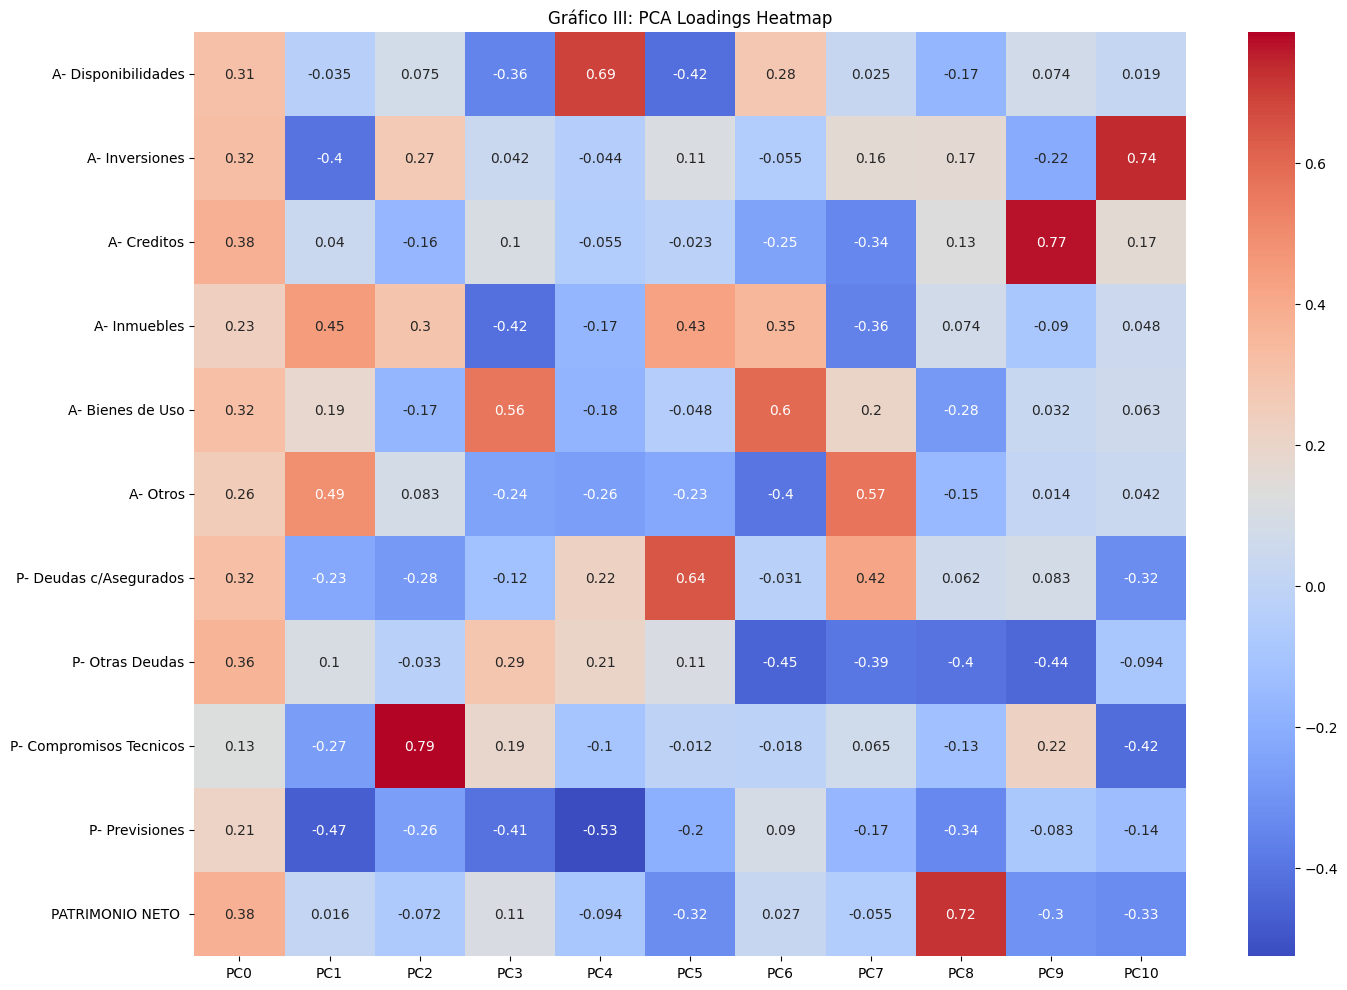

In [17]:
import seaborn as sns

# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Gráfico III: PCA Loadings Heatmap')
plt.show()

EL modelo sera PC0, pero si nos interesa que tenga menor deuda con asegurados será PC8 para compañias con baja inversion y baja deuda. 'PATRIMONIO NETO '

In [18]:
# umbral para el cual extraer las variables
threshold = 0.3

# Buscar las variables de mayor importancia dentro de cada componente
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# obtener el nombre de las variables encoentradas
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

PC0: A- Disponibilidades, A- Inversiones, A- Creditos, A- Bienes de Uso, P- Deudas c/Asegurados, P- Otras Deudas, PATRIMONIO NETO 
PC1: A- Inversiones, A- Inmuebles, A- Otros, P- Previsiones
PC2: P- Compromisos Tecnicos
PC3: A- Disponibilidades, A- Inmuebles, A- Bienes de Uso, P- Previsiones
PC4: A- Disponibilidades, P- Previsiones
PC5: A- Disponibilidades, A- Inmuebles, P- Deudas c/Asegurados, PATRIMONIO NETO 
PC6: A- Inmuebles, A- Bienes de Uso, A- Otros, P- Otras Deudas
PC7: A- Creditos, A- Inmuebles, A- Otros, P- Deudas c/Asegurados, P- Otras Deudas
PC8: P- Otras Deudas, P- Previsiones, PATRIMONIO NETO 
PC9: A- Creditos, P- Otras Deudas, PATRIMONIO NETO 
PC10: A- Inversiones, P- Deudas c/Asegurados, P- Compromisos Tecnicos, PATRIMONIO NETO 


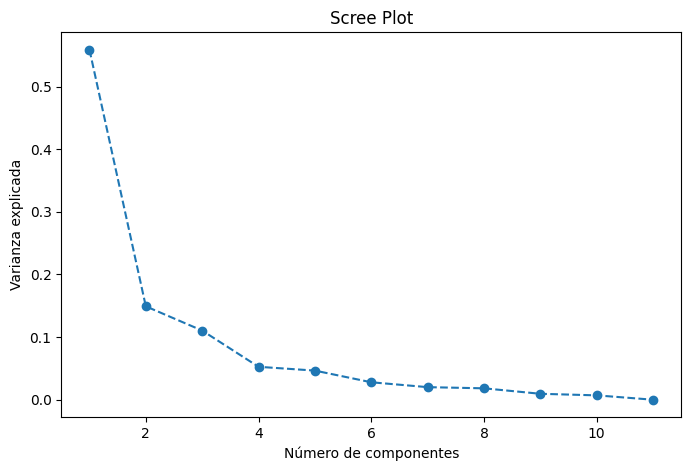

In [19]:
import numpy as np
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Gráfico II: Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axhline(y=0.8, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, '80% umbral de corte', color = 'red', fontsize=16)
plt.xticks(range(1, 11))  # Asegurar que las marcas en el eje x coincidan con los valores

plt.show()

In [20]:
principal_components_pat = pd.DataFrame(principal_components_pat, columns=[f'PC{i}' for i in range(0, len(df_pca_pat.columns))])
principal_components_pat.head()

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0 -1.025969 -0.030445 -0.153724 -0.036993 -0.075051 -0.096660 -0.103219   
1  0.273398  0.567496  0.193871 -0.500282 -0.154257  0.220075  0.762093   
2 -0.972010  0.029417 -0.176183  0.006830 -0.141540 -0.132180  0.026740   
3  5.219417 -0.009829 -0.563320  0.922806  1.810332 -0.626511 -0.051717   
4 -0.811180  0.330292  0.036191 -0.327779 -0.210100  0.229645  0.277222   

        PC7       PC8       PC9          PC10  
0  0.060066 -0.064581  0.005286 -3.766805e-16  
1 -0.401307  0.655004 -0.207516  3.141216e-15  
2  0.148739 -0.099615 -0.006972 -6.844545e-16  
3 -0.744815  0.484431  0.516605 -7.269050e-16  
4 -0.144344  0.007053 -0.066821  1.374844e-16

In [21]:
nombres_variables = df_original.columns[columnas_a_extraer]
nombres_variables_cortos = [nombre[:10] for nombre in df_original.columns[columnas_a_extraer]]

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()

# Normalizar los componentes principales
principal_components_pat_norm = scaler.fit_transform(principal_components_pat[['PC0', 'PC1']])

# Normalizar los loadings
loadings_pat_norm = scaler.fit_transform(loadings[['PC0', 'PC1']])

In [23]:
import matplotlib.pyplot as plt
import numpy as np


# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 13))

# Agregar las observaciones
ax.scatter(principal_components_pat_norm[:, 0], principal_components_pat_norm[:, 1])

# Agregar las variables normalizadas con flechas
for i, (x, y) in enumerate(zip(loadings_pat_norm[:, 0], loadings_pat_norm[:, 1])):
    ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, color='red')
    ax.text(x, y, nombres_variables_cortos[i], rotation=0)


# Personalizar el gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.grid(True)
plt.title('Gráfico I: Componentes de Patrimonio Normalizados')
plt.show()

Resultado: se selecciona PC0, PC1 y PC2 para el análisis del mercado y PC8 para test de kmeans.

## PCA para variables resultados


In [24]:
columnas_a_extraer = [59,60,61,63,64,65,66,70,71,73]

In [25]:
df_pca_res = df_original.iloc[:, columnas_a_extraer].abs()

In [26]:
df_pca_res.head()

SD -  PrimasEmitidas  SD -  PrimasCedidas  SD -  Variacionde RRC  \
0          1.210745e+07         3.449998e+06            1449492.400   
1          7.749039e+06         3.938316e+04             626384.665   
2          6.294006e+06         2.491436e+06             192736.530   
3          3.899410e+08         7.884531e+07            1637220.452   
4          6.178499e+06         1.869007e+05             185577.965   

   SD - SiniestrosPagados  SD - SiniestrosPagados.1  SD - SiniestrosPagados.2  \
0            2.468312e+05                  2835.232              3.796414e+04   
1            7.698131e+06                     0.000              0.000000e+00   
2            1.277315e+05                 24965.821              4.088212e+04   
3            2.134700e+08               2936811.548              5.553205e+07   
4            3.967586e+06                   509.980              9.389366e+05   

   SD - SiniestrosPagados.3  SD - Gastos deProduccion   \
0              1.864714e+05               3.122619e+06   
1              1.670975e+07               9.925046e+06   
2              3.564111e+04               9.610538e+05   
3              2.920650e+06               7.340331e+07   
4              2.579664e+06               2.239526e+06   

   SD - Gastos deExplotacion   \
0                3.715799e+06   
1                2.517932e+06   
2                3.883366e+06   
3                7.770062e+07   
4                2.266662e+06   

   SD - Gastos de Produccion y Explotacion - Total   
0                                      5.168774e+06  
1                                      1.244298e+07  
2                                      3.707490e+06  
3                                      1.361483e+08  
4                                      4.506188e+06

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que df_pca_pat es tu DataFrame
Y = df_pca_res.values

# Estandarizar los datos
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [28]:
#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

In [29]:
pca = PCA()
principal_components_res = pca.fit_transform(Y_scaled)

In [30]:
explained_variance_ratio = pca.explained_variance_ratio_

# Crear un DataFrame con la información
df_varianza = pd.DataFrame({'Componente': range(1, len(explained_variance_ratio) + 1),
                            'Varianza Explicada': explained_variance_ratio})

# Mostrar el DataFrame
df_varianza



Componente  Varianza Explicada
0           1            0.657666
1           2            0.137865
2           3            0.101106
3           4            0.041613
4           5            0.032252
5           6            0.014416
6           7            0.012262
7           8            0.002409
8           9            0.000363
9          10            0.000051

In [31]:
principal_components_res

array([[-9.54882303e-01,  4.63383856e-02, -1.50376614e-01, ...,
         1.25298817e-02,  1.08072778e-03, -1.88978153e-02],
       [-6.83769387e-01, -3.74449265e-01, -2.23969787e-01, ...,
        -3.56533813e-01, -4.22313104e-02,  7.78170930e-03],
       [-1.01561034e+00,  2.29857202e-02, -1.93954520e-01, ...,
         1.78362520e-02, -1.72106658e-02, -1.11428891e-02],
       ...,
       [-1.06387604e+00, -1.44484889e-02,  1.38082290e-01, ...,
         2.10229410e-02, -2.07209079e-02,  3.15322687e-03],
       [-1.14396832e+00, -3.33999222e-02, -2.00802777e-01, ...,
         3.32198210e-02, -6.03269360e-03,  2.83391453e-03],
       [-1.14283645e+00, -3.32881130e-02, -1.98381407e-01, ...,
         3.28717071e-02, -6.46698126e-03,  2.85075520e-03]])

In [32]:
loadings_res = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(df_pca_res.columns))], index=df_pca_res.columns[0:])
loadings_res

PC0       PC1  \
SD -  PrimasEmitidas                              0.385895 -0.072415   
SD -  PrimasCedidas                               0.238361  0.596788   
SD -  Variacionde RRC                             0.058928  0.066060   
SD - SiniestrosPagados                            0.364502 -0.253902   
SD - SiniestrosPagados.1                          0.326614 -0.122758   
SD - SiniestrosPagados.2                          0.270711  0.550120   
SD - SiniestrosPagados.3                          0.267953 -0.500352   
SD - Gastos deProduccion                          0.363400  0.033268   
SD - Gastos deExplotacion                         0.365213 -0.012149   
SD - Gastos de Produccion y Explotacion - Total   0.375147 -0.021490   

                                                       PC2       PC3  \
SD -  PrimasEmitidas                             -0.010659  0.086765   
SD -  PrimasCedidas                              -0.128725  0.401770   
SD -  Variacionde RRC                             0.969461  0.218203   
SD - SiniestrosPagados                           -0.068081  0.186992   
SD - SiniestrosPagados.1                         -0.008337 -0.210117   
SD - SiniestrosPagados.2                         -0.116143  0.150368   
SD - SiniestrosPagados.3                         -0.116657  0.618771   
SD - Gastos deProduccion                          0.046403 -0.307747   
SD - Gastos deExplotacion                         0.068529 -0.300400   
SD - Gastos de Produccion y Explotacion - Total   0.069348 -0.337473   

                                                       PC4       PC5  \
SD -  PrimasEmitidas                             -0.093266 -0.083815   
SD -  PrimasCedidas                              -0.001994 -0.461871   
SD -  Variacionde RRC                             0.052078  0.037684   
SD - SiniestrosPagados                            0.004486  0.207365   
SD - SiniestrosPagados.1                          0.890851 -0.062151   
SD - SiniestrosPagados.2                          0.103838  0.533753   
SD - SiniestrosPagados.3                         -0.092685  0.006326   
SD - Gastos deProduccion                         -0.286086  0.418926   
SD - Gastos deExplotacion                        -0.178609 -0.516247   
SD - Gastos de Produccion y Explotacion - Total  -0.248656 -0.066524   

                                                       PC6       PC7  \
SD -  PrimasEmitidas                              0.018703  0.402792   
SD -  PrimasCedidas                               0.409346  0.009681   
SD -  Variacionde RRC                            -0.006409  0.000302   
SD - SiniestrosPagados                           -0.041729  0.665995   
SD - SiniestrosPagados.1                          0.135950 -0.133577   
SD - SiniestrosPagados.2                         -0.516252 -0.147862   
SD - SiniestrosPagados.3                         -0.048010 -0.519900   
SD - Gastos deProduccion                          0.537403 -0.220680   
SD - Gastos deExplotacion                        -0.503763 -0.108993   
SD - Gastos de Produccion y Explotacion - Total   0.020535 -0.153410   

                                                       PC8       PC9  
SD -  PrimasEmitidas                              0.811787 -0.029788  
SD -  PrimasCedidas                              -0.166053  0.021867  
SD -  Variacionde RRC                            -0.022855 -0.000408  
SD - SiniestrosPagados                           -0.524139  0.006214  
SD - SiniestrosPagados.1                          0.015204 -0.000349  
SD - SiniestrosPagados.2                          0.056114  0.027953  
SD - SiniestrosPagados.3                          0.009624  0.006159  
SD - Gastos deProduccion                         -0.044048 -0.416157  
SD - Gastos deExplotacion                        -0.165394 -0.424397  
SD - Gastos de Produccion y Explotacion - Total  -0.073601  0.802793

In [33]:
import seaborn as sns

# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_res, annot=True, cmap='coolwarm')
plt.title('Gráfico VI: PCA Loadings Heatmap')
plt.show()

el modelo será PC0, pero nos interesa el que mayor correlacione con ingresos pero menos con siniestros pagados. 'SD- PrimasEmitidas'

In [34]:
# umbral para el cual extraer las variables
threshold = 0.3

# Buscar las variables de mayor importancia dentro de cada componente
important_features_res = {}
for column in loadings_res.columns:
    important_features_res[column] = loadings_res.index[loadings_res[column].abs() > threshold].tolist()

# obtener el nombre de las variables encoentradas
for pc, features in important_features_res.items():
    print(f"{pc}: {', '.join(features)}")

PC0: SD -  PrimasEmitidas, SD - SiniestrosPagados, SD - SiniestrosPagados.1, SD - Gastos deProduccion , SD - Gastos deExplotacion , SD - Gastos de Produccion y Explotacion - Total 
PC1: SD -  PrimasCedidas, SD - SiniestrosPagados.2, SD - SiniestrosPagados.3
PC2: SD -  Variacionde RRC
PC3: SD -  PrimasCedidas, SD - SiniestrosPagados.3, SD - Gastos deProduccion , SD - Gastos deExplotacion , SD - Gastos de Produccion y Explotacion - Total 
PC4: SD - SiniestrosPagados.1
PC5: SD -  PrimasCedidas, SD - SiniestrosPagados.2, SD - Gastos deProduccion , SD - Gastos deExplotacion 
PC6: SD -  PrimasCedidas, SD - SiniestrosPagados.2, SD - Gastos deProduccion , SD - Gastos deExplotacion 
PC7: SD -  PrimasEmitidas, SD - SiniestrosPagados, SD - SiniestrosPagados.3
PC8: SD -  PrimasEmitidas, SD - SiniestrosPagados
PC9: SD - Gastos deProduccion , SD - Gastos deExplotacion , SD - Gastos de Produccion y Explotacion - Total 


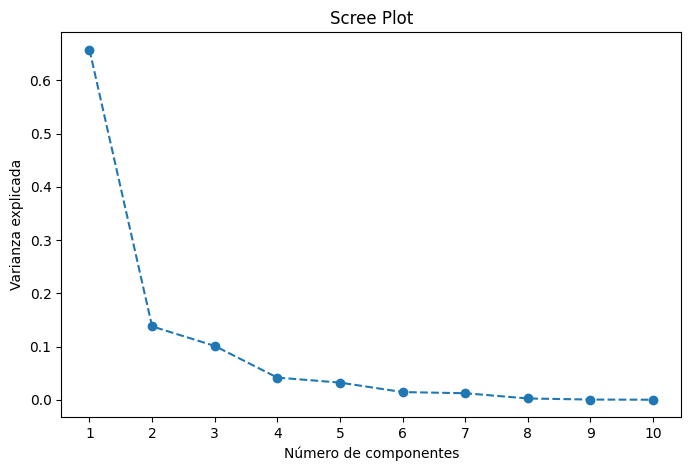

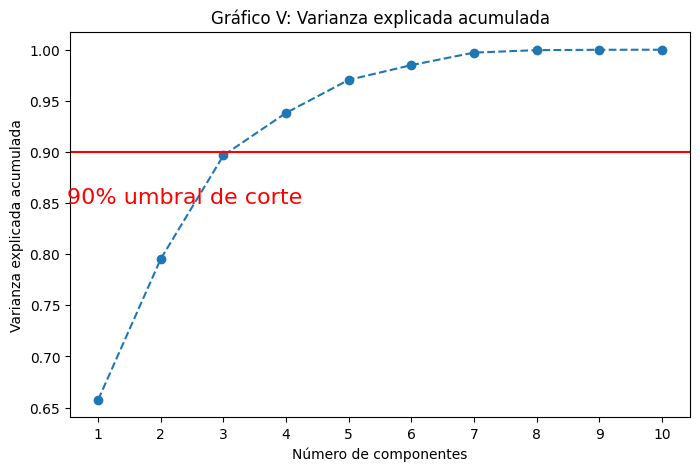

In [35]:
import numpy as np
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Gráfico V: Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.9, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, '90% umbral de corte', color = 'red', fontsize=16)
plt.show()

In [36]:
principal_components_res = pd.DataFrame(principal_components_res, columns=[f'PC{i}' for i in range(0, len(df_pca_res.columns))])
principal_components_res.head()

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0 -0.954882  0.046338 -0.150377 -0.033626 -0.010150 -0.011004  0.085272   
1 -0.683769 -0.374449 -0.223970  0.209648 -0.162250  0.181513  0.144321   
2 -1.015610  0.022986 -0.193955 -0.038260  0.026157 -0.024440  0.026785   
3  5.953206  3.899305 -0.891348  0.131486 -0.403918  1.095208 -1.145935   
4 -0.976901 -0.042405 -0.206585  0.004628  0.011140  0.118577 -0.012233   

        PC7       PC8       PC9  
0  0.012530  0.001081 -0.018898  
1 -0.356534 -0.042231  0.007782  
2  0.017836 -0.017211 -0.011143  
3  0.220375  0.068064 -0.025264  
4 -0.028467 -0.009576  0.006104

In [37]:
#nombres_variables = df_original.columns[columnas_a_extraer]
#nombres_variables_cortos = [nombre[:10] for nombre in df_original.columns[columnas_a_extraer]]
nombres_variables_cortos = df_original.columns[columnas_a_extraer]


In [38]:
print(principal_components_pat.dtypes)

PC0     float64
PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
dtype: object


In [39]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()

# Normalizar los componentes principales
principal_components_res_norm = scaler.fit_transform(principal_components_res[['PC0', 'PC1']])

# Normalizar los loadings
loadings_res_norm = scaler.fit_transform(loadings_res[['PC0', 'PC1']])

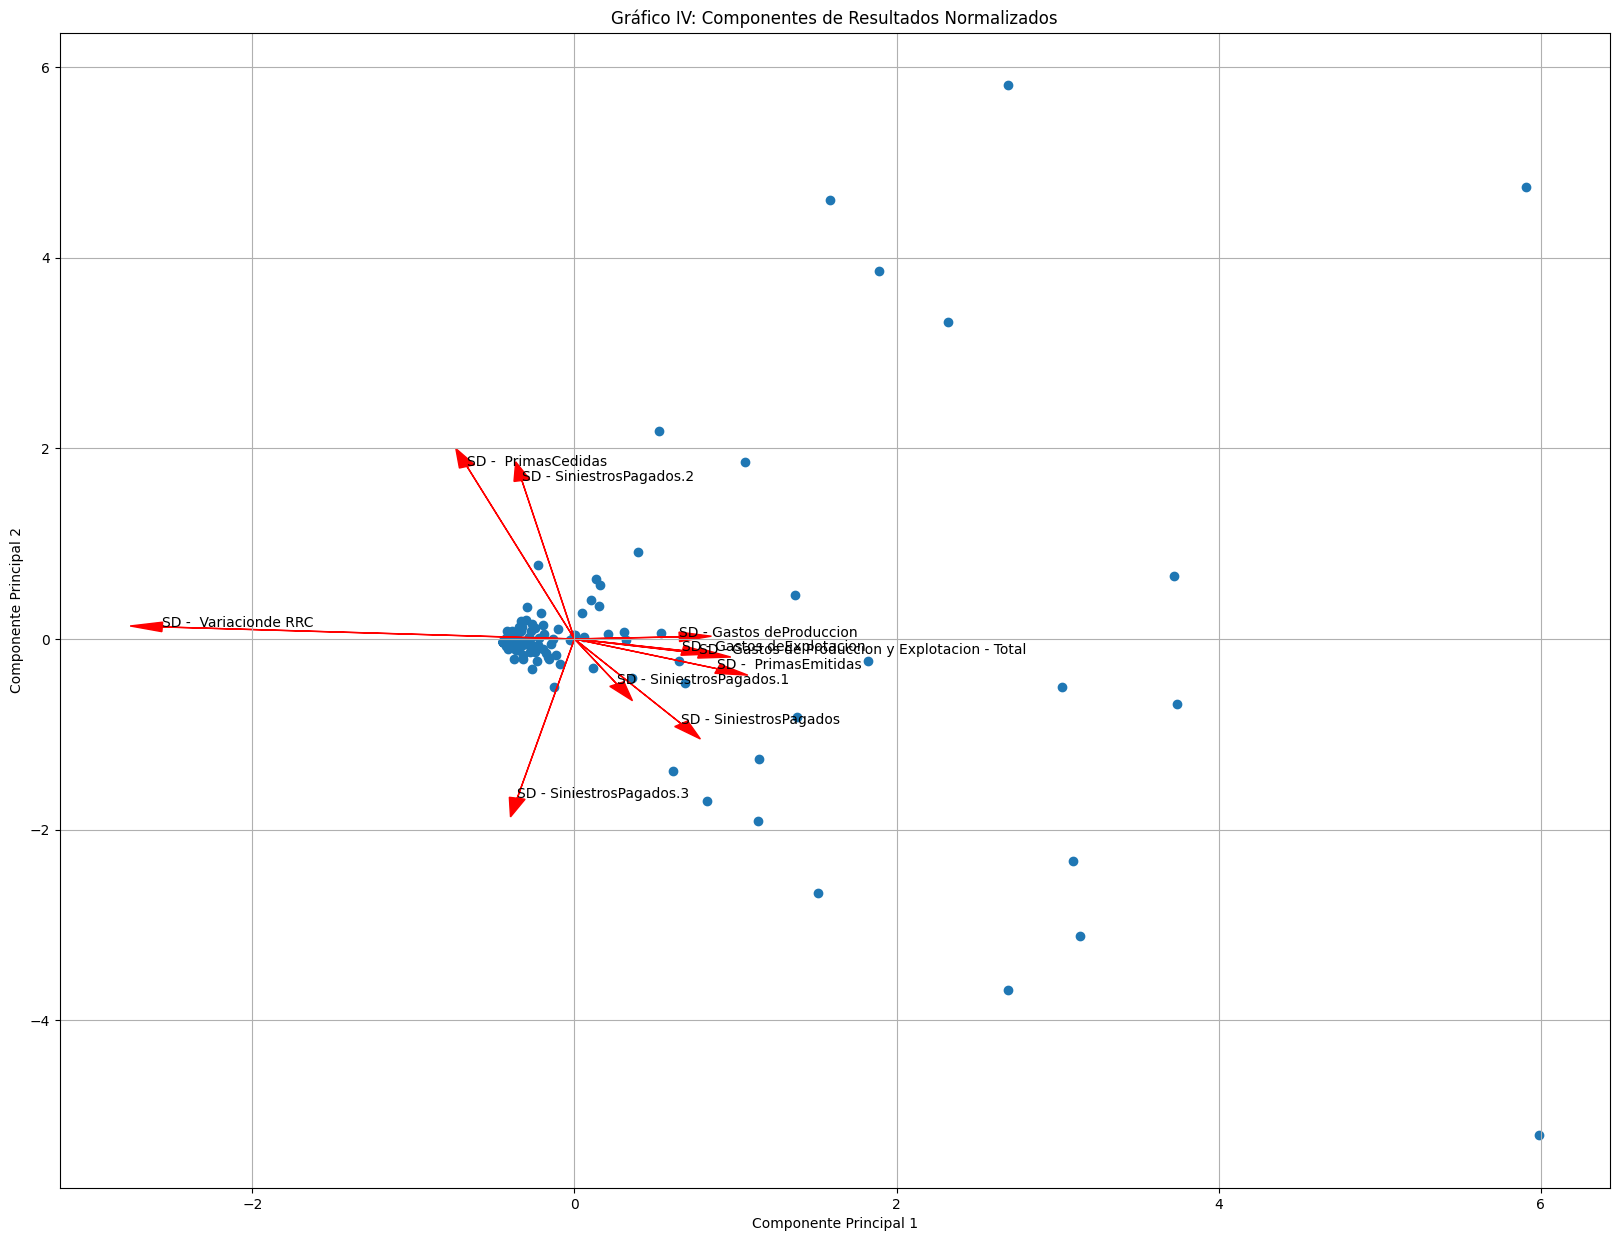

In [40]:
import matplotlib.pyplot as plt
import numpy as np


# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 15))

# Agregar las observaciones
ax.scatter(principal_components_res_norm[:, 0], principal_components_res_norm[:, 1])

# Agregar las variables normalizadas con flechas
for i, (x, y) in enumerate(zip(loadings_res_norm[:, 0], loadings_res_norm[:, 1])):
    ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, color='red')
    ax.text(x, y, nombres_variables_cortos[i], rotation=0)


# Personalizar el gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.grid(True)
plt.title('Gráfico IV: Componentes de Resultados Normalizados')
plt.show()

Resultado: se selecciona PC0 y PC1 para la explicación del mercado y PC8 para el cluster de decision


## PCA para variables indicadores


In [41]:
df_original.head()

Entidad N Entidad NJ Entidad Denominacion SEGMENTO  Rank    TOP  \
0          1          A          AFIANZADORA       PM    92  RESTO   
1          2          C            AGROSALTA       PM   113  RESTO   
2          3          A                 ALBA       PM   121  RESTO   
3          4          A              ALLIANZ       PM    11     20   
4          5          A            ANTaRTIDA       PM   123  RESTO   

   A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  ...  \
0         7.534390e+04    4.418959e+06  2.538016e+06  0.000000e+00  ...   
1         2.256459e+06    6.147431e+07  1.358144e+07  1.764929e+07  ...   
2         1.207561e+05    3.055744e+06  9.179537e+05  2.597781e+05  ...   
3         1.387707e+07    2.869870e+08  1.256212e+08  7.954588e+06  ...   
4         1.887429e+05    3.332890e+05  1.188759e+06  8.732468e+06  ...   

   RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
0                  0.000000e+00                0.000         -286023.633   
1                  4.415820e+07                0.000         -837382.362   
2                  3.690407e+06               -1.119         -936868.376   
3                  3.352328e+08           357754.610               0.000   
4                  5.113801e+04             -148.153               0.000   

   RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM   RF -  TOTAL  \
0                              -1441457.503 -3.062344e+06 -2.099534e+06   
1                               -330014.242 -6.548793e+07 -1.891490e+07   
2                              -2514450.999 -2.484058e+06  2.411046e+05   
3                              -4917388.283 -5.209753e+08 -6.041762e+07   
4                              -1325125.271  1.112795e+06  9.100645e+05   

   RF -  ResultadoOperacionesOrdinarias  \
0                          3.586780e+05   
1                         -1.526299e+07   
2                          4.484604e+05   
3                         -3.653974e+07   
4                          2.278367e+06   

   RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  \
0                                         0.0                 -2.354916e+05   
1                                         0.0                  0.000000e+00   
2                                         0.0                 -4.229918e+04   
3                                         0.0                  1.045464e+07   
4                                         0.0                  0.000000e+00   

   RF -  RESULTADODELEJERCICIO  
0                 1.231864e+05  
1                -1.526299e+07  
2                 4.061612e+05  
3                -2.608509e+07  
4                 2.278367e+06  

[5 rows x 87 columns]

In [42]:
columnas_a_extraer = [21,22,23,24,25,26,27,38,39,40,41,42,43]

In [43]:
df_pca_ind = df_original.iloc[:, columnas_a_extraer].abs()

In [44]:
df_pca_ind.head()

C - PATRIMONIAL  D1 - PATRIMONIAL  D2 - PATRIMONIAL  E - PATRIMONIAL  \
0           34.704           820.219           820.219          238.139   
1           13.394           355.539           454.001          424.941   
2           11.733           975.560             0.000          539.031   
3           26.816           219.796           225.607          184.094   
4            9.594            12.176           215.855          236.712   

   F - PATRIMONIAL  G - SOLVENCIA  H - SOLVENCIA  I  - GESTION  J - GESTION  \
0           60.423        129.184          0.000       28.4948       0.2714   
1           78.030          0.000        389.222        0.5082     127.2240   
2           42.379        519.548          0.000       39.5843       2.4410   
3           62.959        557.378         26.413       20.2198      48.6295   
4           73.163        248.643          1.250        3.0250       7.2602   

   K - GESTION  L - GESTION  M - GESTION  N - GESTION  
0      25.7909      30.6902      42.6909       1.0174  
1     128.0810      32.4935     160.5745     196.9662  
2      15.2693      61.6994      58.9051       6.4531  
3      18.8242      19.9262      34.9151       6.6895  
4      36.2471      36.6863      72.9334      36.8757

In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que df_pca_pat es tu DataFrame
Z = df_pca_ind.values

# Estandarizar los datos
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

In [46]:
#ocultar texto warning
import warnings
warnings.filterwarnings('ignore')

In [47]:
pca = PCA()
principal_components_ind = pca.fit_transform(Z_scaled)

In [48]:
explained_variance_ratio = pca.explained_variance_ratio_

# Crear un DataFrame con la información
df_varianza = pd.DataFrame({'Componente': range(1, len(explained_variance_ratio) + 1),
                            'Varianza Explicada': explained_variance_ratio})

# Mostrar el DataFrame
df_varianza
# Explicar la varianza por cada componente
#explained_variance_ratio = pca.explained_variance_ratio_
#explained_variance_ratio

Componente  Varianza Explicada
0            1            0.235204
1            2            0.146105
2            3            0.122067
3            4            0.107457
4            5            0.078116
5            6            0.074154
6            7            0.061791
7            8            0.054068
8            9            0.049726
9           10            0.041665
10          11            0.019019
11          12            0.010450
12          13            0.000179

In [49]:
principal_components_ind

array([[ 3.19838881,  1.74934349,  0.25014054, ...,  0.02640513,
        -0.10293043, -0.06850321],
       [ 0.96728924,  3.12890519,  0.06576734, ..., -1.12721805,
        -0.37305441,  0.08047268],
       [ 1.83102777,  1.28366831,  0.52963733, ..., -1.43703702,
        -2.66073673, -0.0612966 ],
       ...,
       [-2.98633726,  0.51705205,  0.30205543, ...,  0.31909764,
         0.0681074 ,  0.00365106],
       [-1.4818144 , -1.76027715,  1.26365967, ...,  0.11650065,
         0.04728285, -0.00442344],
       [-1.30360417, -1.35522079,  1.45836328, ...,  0.14892075,
        -0.00643271, -0.00605593]])

In [50]:
loadings_ind = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(0, len(df_pca_ind.columns))], index=df_pca_ind.columns[0:])
loadings_ind

PC0       PC1       PC2       PC3       PC4       PC5  \
C - PATRIMONIAL   0.426281  0.031008 -0.371015  0.028374 -0.115680  0.051498   
D1 - PATRIMONIAL  0.347763  0.379935  0.274618  0.148896  0.142054 -0.285352   
D2 - PATRIMONIAL  0.363533  0.367853  0.246256  0.227187  0.113787 -0.254314   
E - PATRIMONIAL   0.200437  0.202375  0.248310 -0.143005  0.302610  0.275314   
F - PATRIMONIAL  -0.389099 -0.001985  0.376469  0.028037  0.071348  0.046892   
G - SOLVENCIA    -0.045467  0.066421  0.384208 -0.391172  0.145218  0.323409   
H - SOLVENCIA    -0.100460  0.256446  0.337000  0.114264 -0.480426  0.267989   
I  - GESTION      0.238548 -0.092240 -0.180014 -0.176789  0.535706  0.370249   
J - GESTION      -0.000894 -0.239812  0.045964  0.643963  0.148104  0.074871   
K - GESTION       0.210532  0.194420 -0.145407  0.209675 -0.342708  0.626811   
L - GESTION      -0.339291  0.476896 -0.308593 -0.030192  0.190665 -0.070530   
M - GESTION      -0.301218  0.524839 -0.330425  0.030186  0.067405  0.052350   
N - GESTION      -0.233189 -0.039149  0.040599  0.496361  0.371037  0.231390   

                       PC6       PC7       PC8       PC9      PC10      PC11  \
C - PATRIMONIAL  -0.178404  0.060177 -0.207764  0.151812  0.746707 -0.059913   
D1 - PATRIMONIAL -0.190384  0.020784  0.124272 -0.014268 -0.106582 -0.686824   
D2 - PATRIMONIAL -0.061207 -0.060057  0.180079 -0.020819  0.027430  0.708247   
E - PATRIMONIAL   0.714350 -0.035174 -0.353518  0.159040  0.072865 -0.047704   
F - PATRIMONIAL   0.151994  0.015823  0.542904 -0.062530  0.608218 -0.082665   
G - SOLVENCIA    -0.535557 -0.421137 -0.272292 -0.133424  0.090770  0.053300   
H - SOLVENCIA    -0.107132  0.634740 -0.258083 -0.108689 -0.005967  0.045118   
I  - GESTION     -0.136714  0.493596  0.293074 -0.295719 -0.084816  0.042310   
J - GESTION       0.060986 -0.169771 -0.288349 -0.608999  0.094287 -0.051834   
K - GESTION       0.068396 -0.350388  0.397786  0.025094 -0.160532 -0.065482   
L - GESTION      -0.014143  0.019858 -0.107520 -0.150714  0.049184  0.000842   
M - GESTION       0.008252 -0.092859 -0.041518 -0.129924  0.018921  0.002191   
N - GESTION      -0.262919  0.079705 -0.089090  0.647258 -0.046604  0.017727   

                      PC12  
C - PATRIMONIAL  -0.002944  
D1 - PATRIMONIAL  0.010420  
D2 - PATRIMONIAL -0.008263  
E - PATRIMONIAL   0.001811  
F - PATRIMONIAL   0.004902  
G - SOLVENCIA    -0.002398  
H - SOLVENCIA    -0.005138  
I  - GESTION      0.046990  
J - GESTION      -0.002279  
K - GESTION      -0.161426  
L - GESTION      -0.694761  
M - GESTION       0.699127  
N - GESTION       0.003469

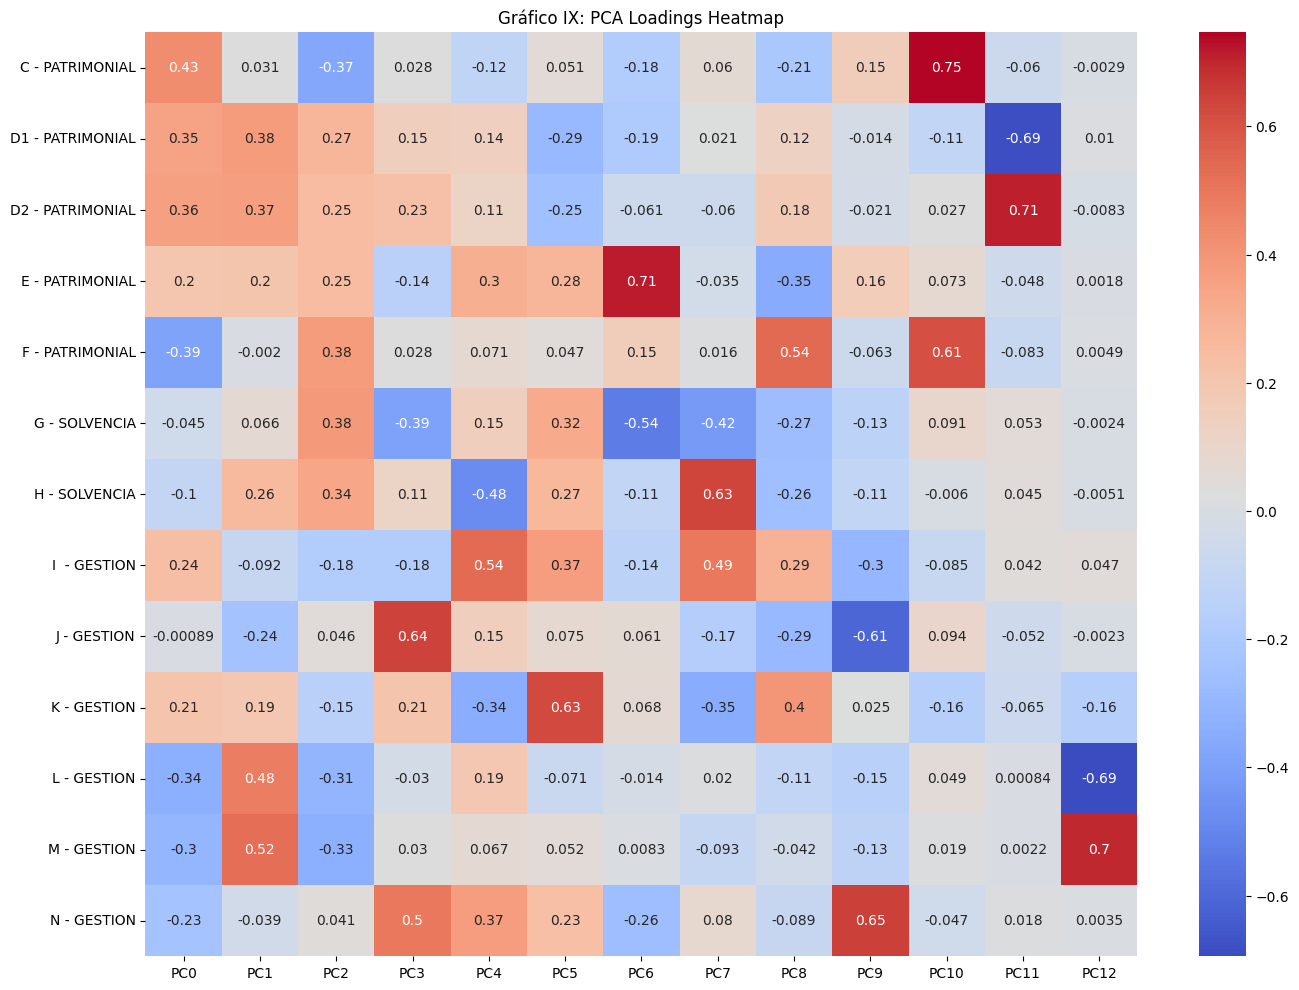

In [51]:
import seaborn as sns

# heatmap de la varianza de los componentes
plt.figure(figsize=(16, 12))
sns.heatmap(loadings_ind, annot=True, cmap='coolwarm')
plt.title('Gráfico IX: PCA Loadings Heatmap')
plt.show()

Para el analisis contextual se usaran de PC0 a PC4 y como test al planteo PC12 'M- GESTION'

In [52]:
# umbral para el cual extraer las variables
threshold = 0.5

# Buscar las variables de mayor importancia dentro de cada componente
important_features_ind = {}
for column in loadings_ind.columns:
    important_features_ind[column] = loadings_ind.index[loadings_ind[column].abs() > threshold].tolist()

# obtener el nombre de las variables encoentradas
for pc, features in important_features_ind.items():
    print(f"{pc}: {', '.join(features)}")

PC0: 
PC1: M - GESTION
PC2: 
PC3: J - GESTION
PC4: I  - GESTION
PC5: K - GESTION
PC6: E - PATRIMONIAL, G - SOLVENCIA
PC7: H - SOLVENCIA
PC8: F - PATRIMONIAL
PC9: J - GESTION, N - GESTION
PC10: C - PATRIMONIAL, F - PATRIMONIAL
PC11: D1 - PATRIMONIAL, D2 - PATRIMONIAL
PC12: L - GESTION, M - GESTION


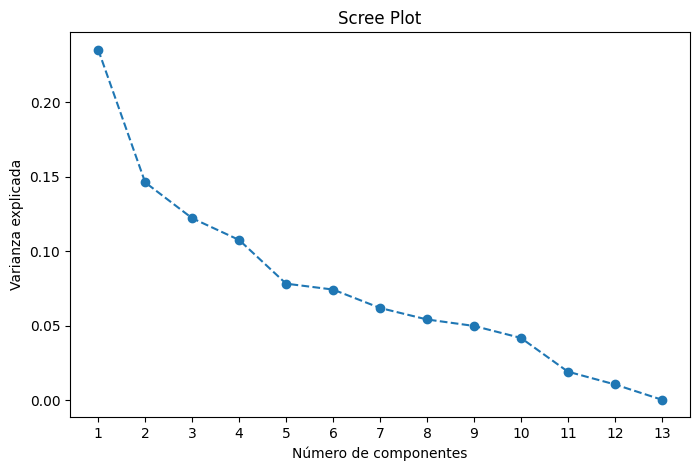

In [53]:
import numpy as np
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

# Varianza acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Gráfico VIII: Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=0.7, color='r', linestyle='-')  # línea de corte estabelcer umbral según criterio
plt.text(0.5, 0.85, ' 70% umbral de corte', color = 'red', fontsize=16)
plt.show()

In [54]:
principal_components_ind = pd.DataFrame(principal_components_ind, columns=[f'PC{i}' for i in range(0, len(df_pca_ind.columns))])
principal_components_ind.head()

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0  3.198389  1.749343  0.250141  0.485660  0.697235 -0.974383 -0.536137   
1  0.967289  3.128905  0.065767  4.843095 -2.736801  5.306804  1.217545   
2  1.831028  1.283668  0.529637 -1.246195  1.898538  0.233652 -0.276690   
3  0.912611 -0.449749  0.157762 -0.332510  0.245554  0.482023 -0.810865   
4 -0.289283  0.084525 -0.274644 -0.082885 -0.582332  0.713193  0.548395   

        PC7       PC8       PC9      PC10      PC11      PC12  
0  0.299012  1.570221  0.223163  0.026405 -0.102930 -0.068503  
1 -1.327516  2.039798 -0.146397 -1.127218 -0.373054  0.080473  
2  0.266241 -0.172271 -0.188528 -1.437037 -2.660737 -0.061297  
3 -0.437093 -0.036259 -0.502673  0.242082 -0.016930  0.007700  
4 -0.916291  0.988006  0.481651 -0.499877  0.427065  0.023810

In [55]:
nombres_variables = df_original.columns[columnas_a_extraer]



In [56]:
print(principal_components_ind.dtypes)

PC0     float64
PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
PC11    float64
PC12    float64
dtype: object


In [57]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()

# Normalizar los componentes principales
principal_components_ind_norm = scaler.fit_transform(principal_components_ind[['PC0', 'PC1']])

# Normalizar los loadings
loadings_ind_norm = scaler.fit_transform(loadings_ind[['PC0', 'PC1']])

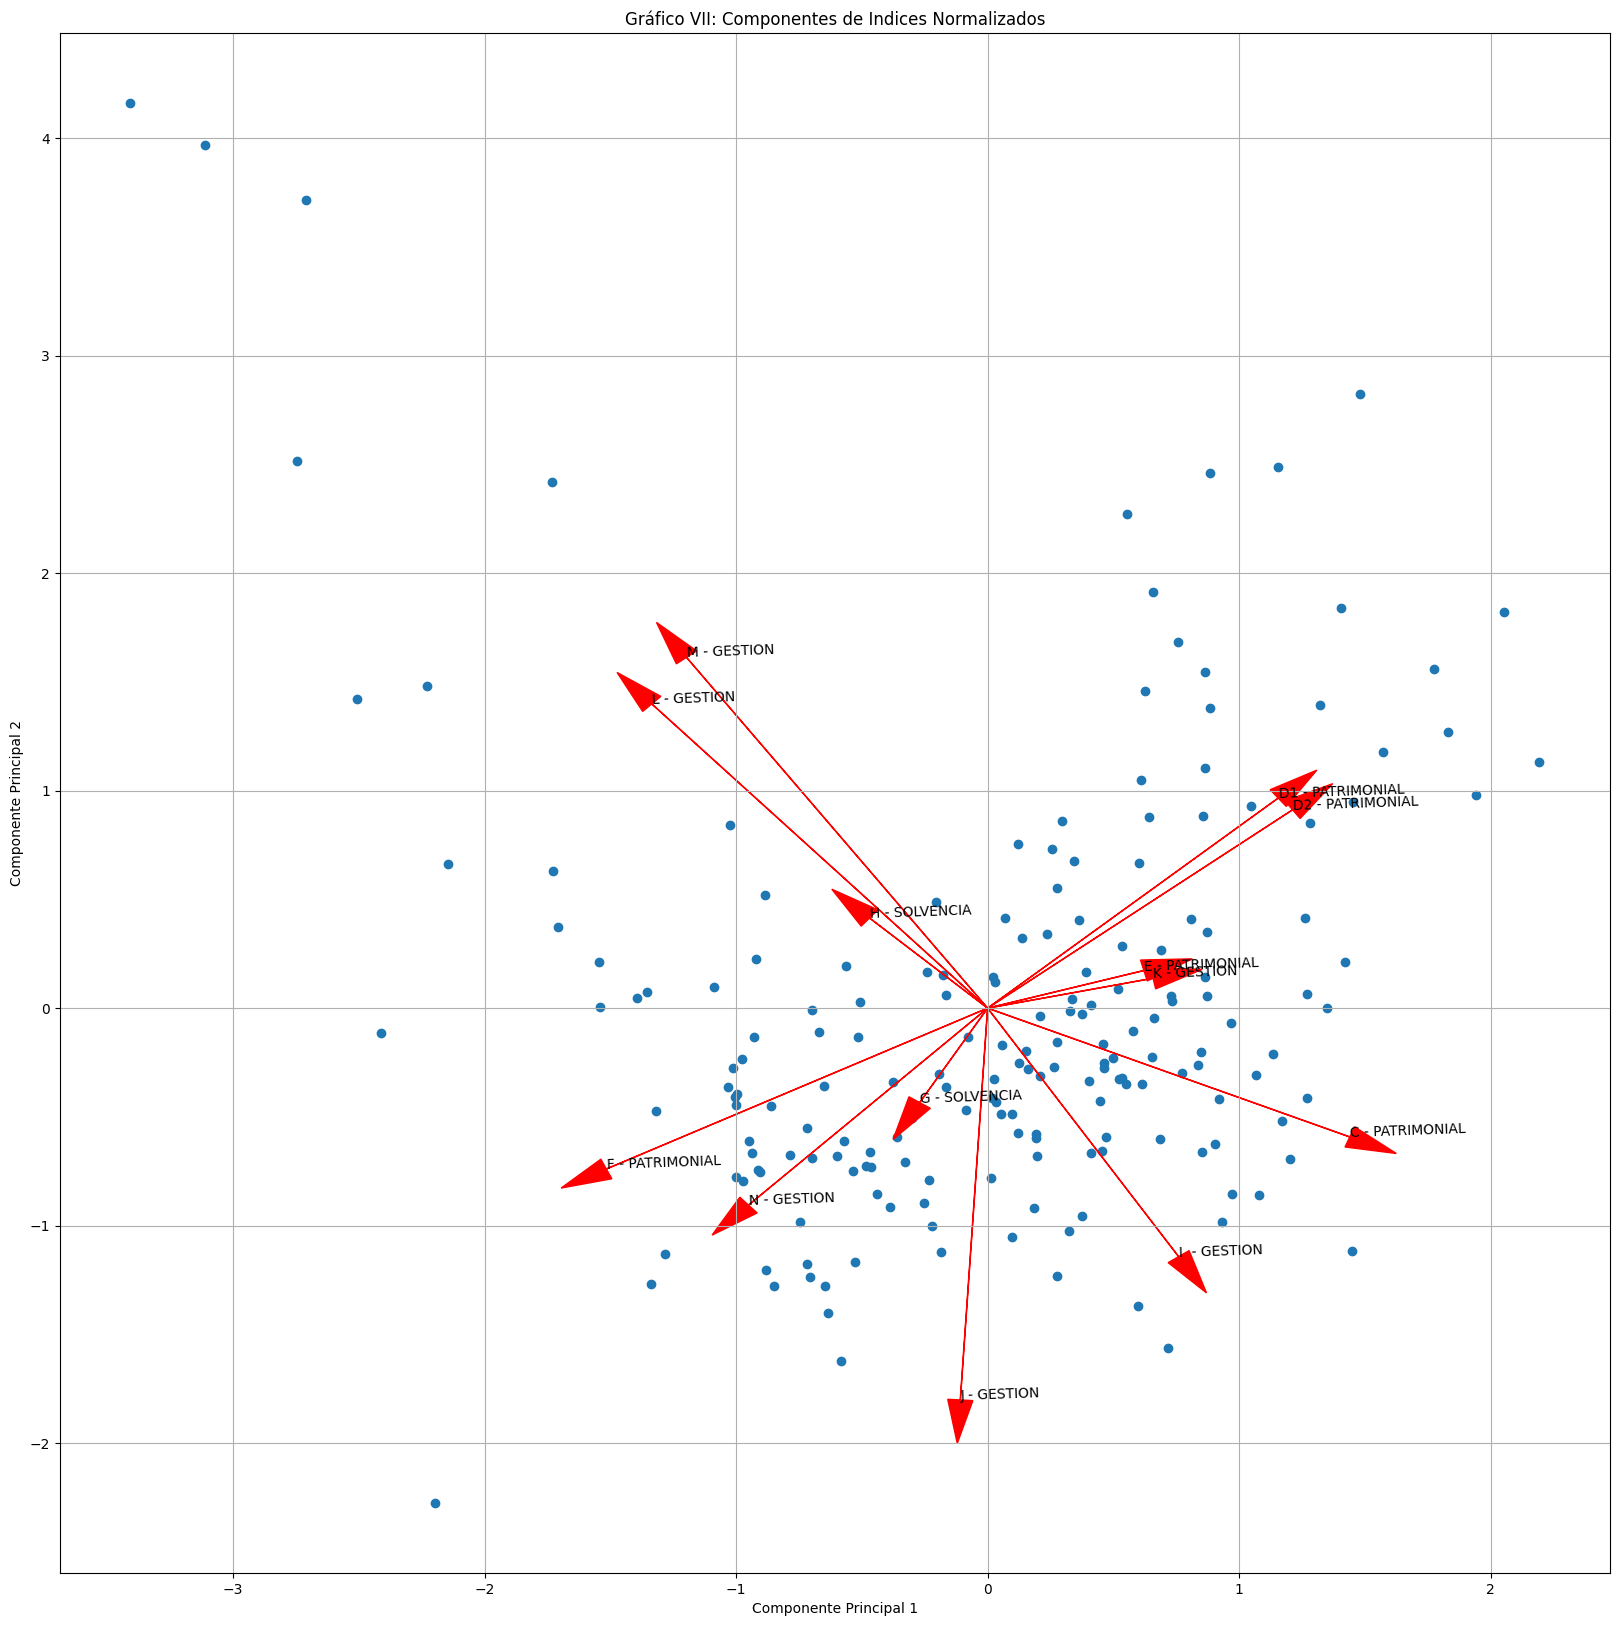

In [58]:
import matplotlib.pyplot as plt
import numpy as np


# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 20))

# Agregar las observaciones
ax.scatter(principal_components_ind_norm[:, 0], principal_components_ind_norm[:, 1])

# Agregar las variables normalizadas con flechas
for i, (x, y) in enumerate(zip(loadings_ind_norm[:, 0], loadings_ind_norm[:, 1])):
    ax.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, color='red')
    ax.text(x, y, nombres_variables[i], rotation=2)


# Personalizar el gráfico
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.grid(True)
plt.title('Gráfico VII: Componentes de Indices Normalizados')
plt.show()

#ANALISIS DE CLUSTERS

### Armado del DF a trabajar

In [59]:
extraer_orginal = [0,1,3,4,5,19,20]
df_cluster = df_original.iloc[:,extraer_orginal]
df_cluster['PC8_PAT'] = principal_components_pat["PC8"]
df_cluster['PC8_RES'] = principal_components_res["PC8"]
df_cluster['PC12_IND'] = principal_components_ind["PC12"]
df_cluster.head()

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0          1          A       PM    92  RESTO       0.0936         40.0   
1          2          C       PM   113  RESTO       0.0599       5180.0   
2          3          A       PM   121  RESTO       0.0487         75.0   
3          4          A       PM    11     20       3.0154       2879.0   
4          5          A       PM   123  RESTO       0.0478       2229.0   

    PC8_PAT   PC8_RES  PC12_IND  
0 -0.064581  0.001081 -0.068503  
1  0.655004 -0.042231  0.080473  
2 -0.099615 -0.017211 -0.061297  
3  0.484431  0.068064  0.007700  
4  0.007053 -0.009576  0.023810

In [60]:
print(df_cluster.dtypes)

Entidad N        int64
Entidad NJ      object
SEGMENTO        object
Rank             int64
TOP             object
A - GENERAL    float64
B - GENERAL    float64
PC8_PAT        float64
PC8_RES        float64
PC12_IND       float64
dtype: object


In [61]:
df_cluster_escal = df_cluster[['PC8_PAT', 'PC8_RES', 'PC12_IND']].to_numpy()
df_cluster_escal

array([[-6.45808101e-02,  1.08072778e-03, -6.85032075e-02],
       [ 6.55004147e-01, -4.22313104e-02,  8.04726757e-02],
       [-9.96145317e-02, -1.72106658e-02, -6.12965989e-02],
       [ 4.84430857e-01,  6.80643456e-02,  7.70027217e-03],
       [ 7.05275301e-03, -9.57633230e-03,  2.38103171e-02],
       [-4.71639240e-03, -1.37076464e-02, -7.18754750e-03],
       [-3.51010122e-02, -1.19561747e-02,  2.30281597e-01],
       [-3.72544817e-02, -1.89981735e-02, -1.07224434e-01],
       [ 2.88432865e-02, -6.90556090e-03,  1.46925306e-02],
       [-1.15462549e-01, -1.08446091e-02, -9.43552949e-02],
       [-3.47552697e-01, -3.41824135e-02,  1.06176797e-02],
       [-3.35168900e-02, -2.27814108e-03,  9.10155655e-03],
       [-1.10952466e-01,  3.19469657e-02,  1.49689754e-02],
       [ 3.78009305e-01, -9.82070906e-02,  1.80694986e-02],
       [-2.53297859e-02, -7.45491446e-03,  1.69535317e-02],
       [-4.02029855e-02,  7.12980041e-02,  1.46793058e-02],
       [ 1.43621564e+00, -1.98161322e-01

## Selección óptima de Cluster

### Análisis Jerárquico

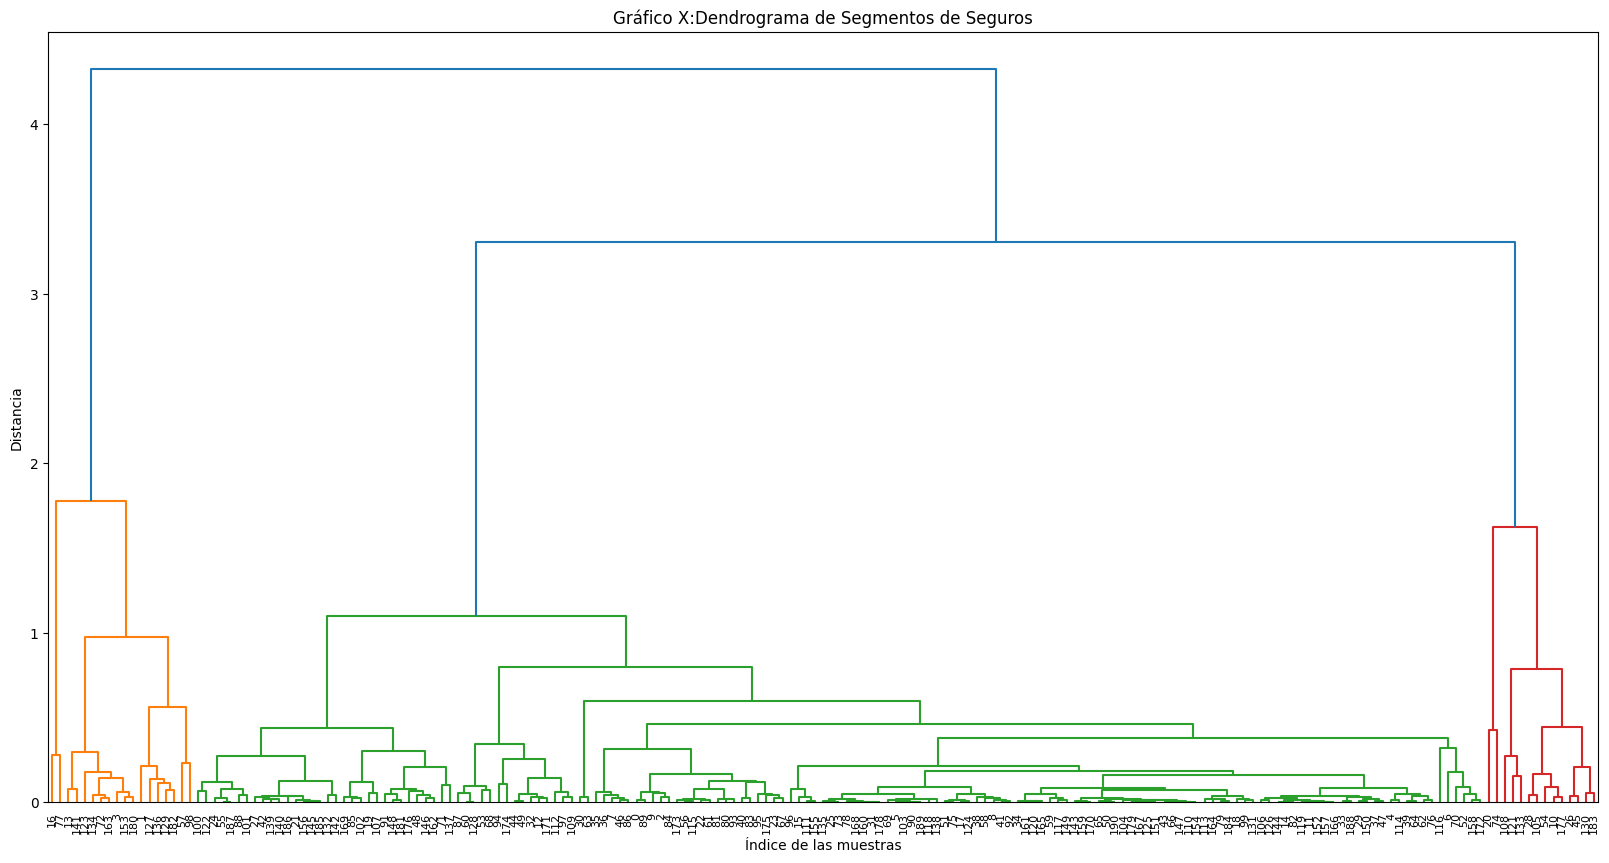

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Seleccionamos las columnas numéricas (componentes principales)
X = df_cluster_escal  # Reemplaza 'CP1', 'CP2', etc. con los nombres reales

# Realizamos el clustering jerárquico utilizando el método de Ward
Z = linkage(X, 'ward')

# Visualizamos el dendrograma
plt.figure(figsize=(20, 10))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.title('Gráfico X:Dendrograma de Segmentos de Seguros')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

In [63]:
df_cluster.head()

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0          1          A       PM    92  RESTO       0.0936         40.0   
1          2          C       PM   113  RESTO       0.0599       5180.0   
2          3          A       PM   121  RESTO       0.0487         75.0   
3          4          A       PM    11     20       3.0154       2879.0   
4          5          A       PM   123  RESTO       0.0478       2229.0   

    PC8_PAT   PC8_RES  PC12_IND  
0 -0.064581  0.001081 -0.068503  
1  0.655004 -0.042231  0.080473  
2 -0.099615 -0.017211 -0.061297  
3  0.484431  0.068064  0.007700  
4  0.007053 -0.009576  0.023810

In [64]:
df_cluster ['cat_comb'] = df_cluster['Entidad NJ'].astype(str) + '_' +  df_cluster['SEGMENTO'].astype(str)+ '_' +  df_cluster['TOP'].astype(str)

Text(0, 0.5, 'Distancia')

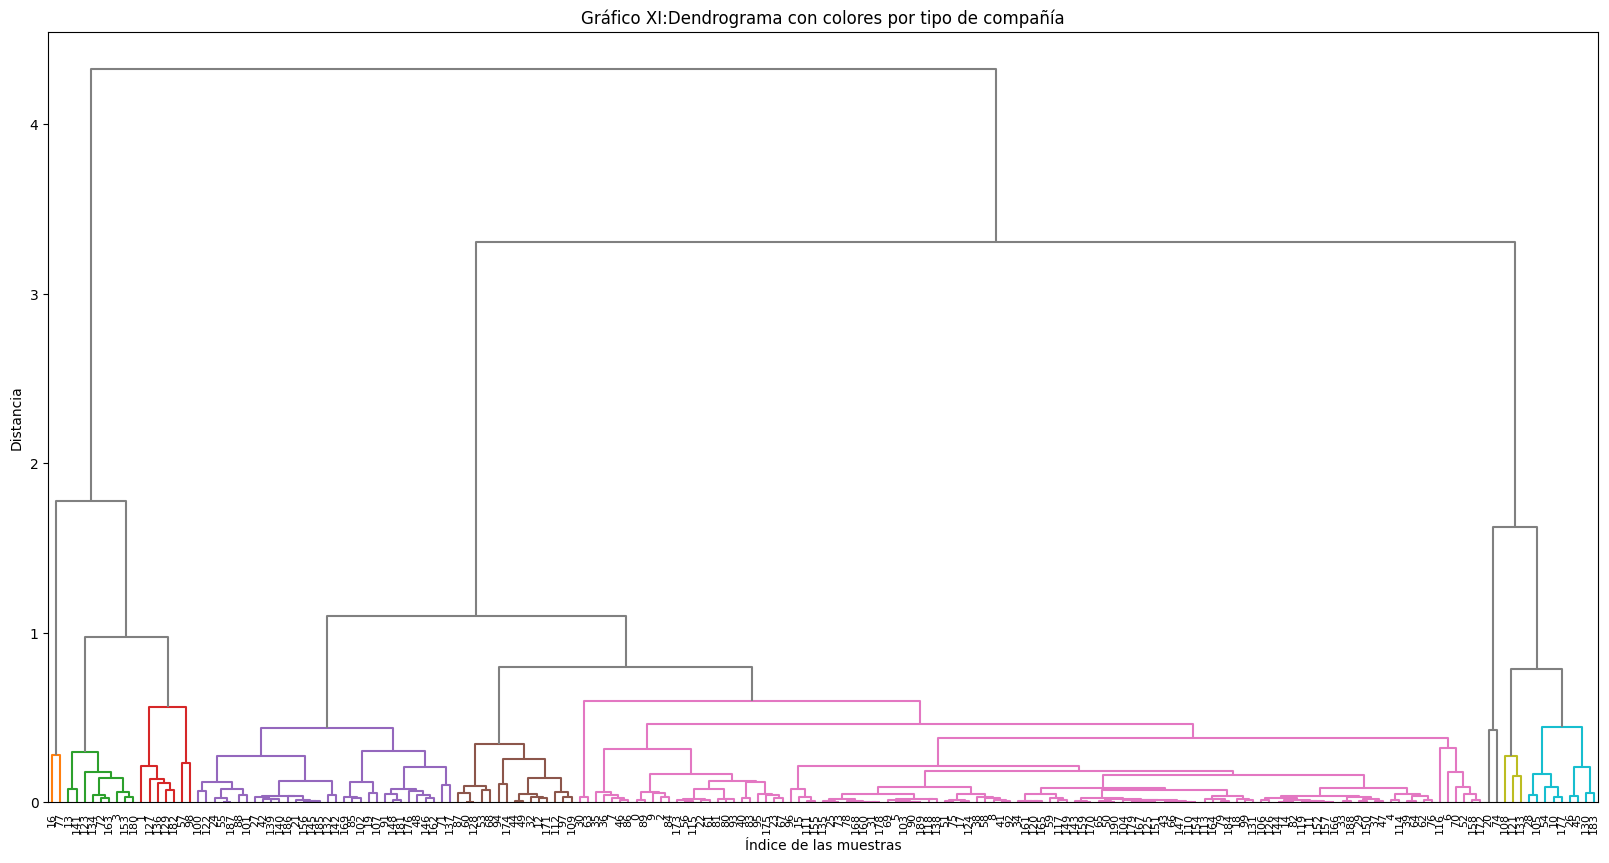

In [65]:
# Codificar la variable "tipo_compañia"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cluster['cat_comb'] = le.fit_transform(df_cluster['cat_comb'])

# Crear un nuevo DataFrame con las variables numéricas y la codificada
X_encoded = df_cluster[['PC8_PAT', 'PC8_RES','PC12_IND', 'cat_comb']]

# Asignar colores a las hojas del dendrograma según la categoría
plt.figure(figsize=(20, 10))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,
           color_threshold=0.7,  #
           above_threshold_color='grey')
plt.title('Gráfico XI:Dendrograma con colores por tipo de compañía')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')

### Método del codo

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np


def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += np.sum((points[i] - curr_center) ** 2)

        sse.append(curr_sse)
    return sse


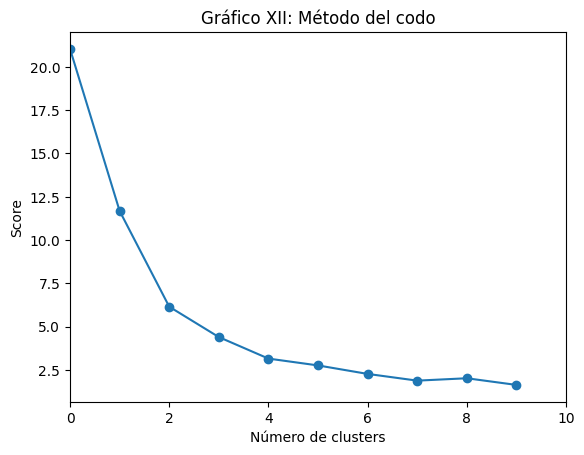

In [67]:
plt.plot(range(0,10), calculate_WSS(df_cluster_escal, 10), marker='o')
plt.title('Gráfico XII: Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.xlim(0,10)
plt.show()

4 clusters es  un punto de inflexión donde la disminución del score se hace menos pronunciada

## Aplicación de KMeans con k=5

In [68]:
#KMeans con 5 cluster
def doKmeans(X, nclust=5):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df_cluster_escal, 5)
kmeans = pd.DataFrame(clust_labels) #clusters
datas=pd.DataFrame(df_cluster)
datas.columns=df_cluster.columns
datas.insert((df_cluster.shape[1]),'kmeans',kmeans)

In [69]:
datas.head()

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0          1          A       PM    92  RESTO       0.0936         40.0   
1          2          C       PM   113  RESTO       0.0599       5180.0   
2          3          A       PM   121  RESTO       0.0487         75.0   
3          4          A       PM    11     20       3.0154       2879.0   
4          5          A       PM   123  RESTO       0.0478       2229.0   

    PC8_PAT   PC8_RES  PC12_IND  cat_comb  kmeans  
0 -0.064581  0.001081 -0.068503         7       0  
1  0.655004 -0.042231  0.080473        15       1  
2 -0.099615 -0.017211 -0.061297         7       0  
3  0.484431  0.068064  0.007700         5       1  
4  0.007053 -0.009576  0.023810         7       0

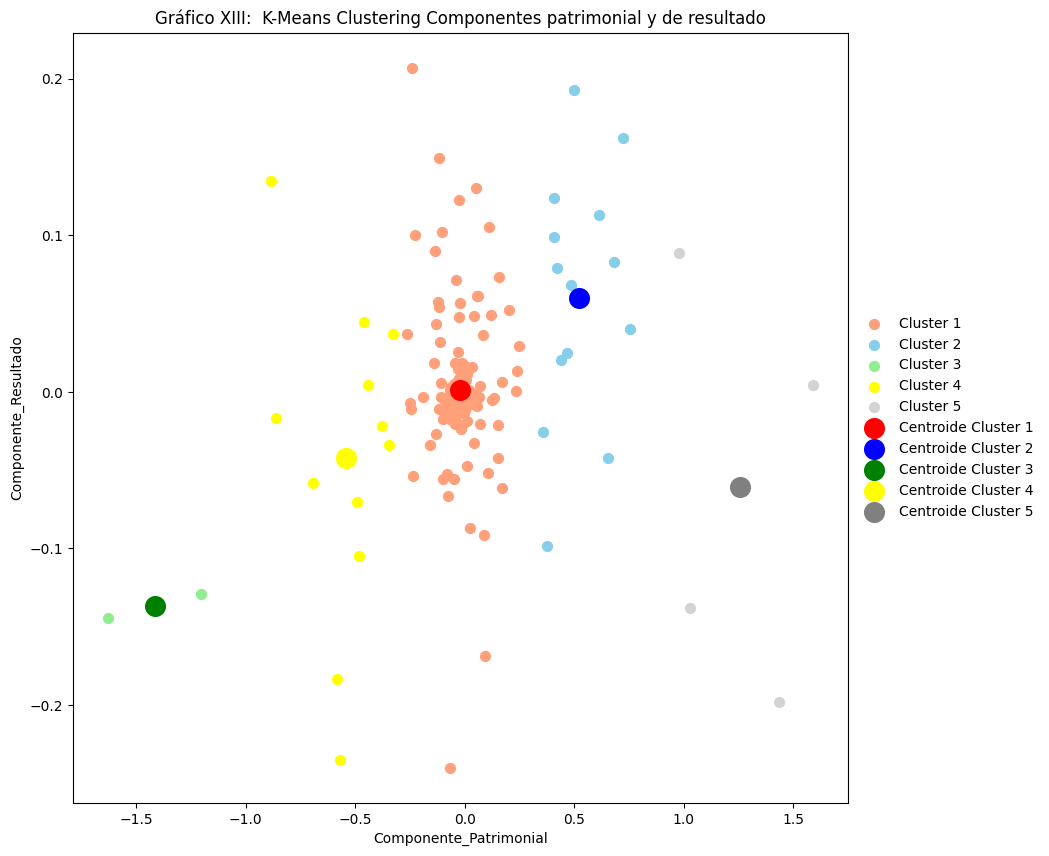

In [70]:
# Gráfico de clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Define colors for each cluster
#colors = ['red', 'blue', 'green', 'grey']

ax.scatter(datas[datas['kmeans']==0]['PC8_PAT'],datas[datas['kmeans']==0]['PC8_RES'],c='lightsalmon',s=50, label='Cluster 1')
ax.scatter(datas[datas['kmeans']==1]['PC8_PAT'],datas[datas['kmeans']==1]['PC8_RES'],c='skyblue',s=50, label='Cluster 2')
ax.scatter(datas[datas['kmeans']==2]['PC8_PAT'],datas[datas['kmeans']==2]['PC8_RES'],c='lightgreen',s=50, label='Cluster 3')
ax.scatter(datas[datas['kmeans']==3]['PC8_PAT'],datas[datas['kmeans']==3]['PC8_RES'],c='yellow',s=50, label='Cluster 4')
ax.scatter(datas[datas['kmeans']==4]['PC8_PAT'],datas[datas['kmeans']==4]['PC8_RES'],c='lightgrey',s=50, label='Cluster 5')
#ax.scatter(datas[datas['kmeans']==5]['PC8_PAT'],datas[datas['kmeans']==5]['PC8_RES'],c='pink',s=50, label='Cluster 6')

plt.scatter(cent[:, 0][0], cent[:, 1][0], s=200, c='red', label = 'Centroide Cluster 1')
plt.scatter(cent[:, 0][1], cent[:, 1][1], s=200, c='blue', label = 'Centroide Cluster 2')
plt.scatter(cent[:, 0][2], cent[:, 1][2], s=200, c='green', label = 'Centroide Cluster 3')
plt.scatter(cent[:, 0][3], cent[:, 1][3], s=200, c='yellow', label = 'Centroide Cluster 4')
plt.scatter(cent[:, 0][4], cent[:, 1][4], s=200, c='grey', label = 'Centroide Cluster 5')
#plt.scatter(cent[:, 0][4], cent[:, 1][5], s=200, c='violet', label = 'Centroide Cluster 6')

ax.set_title('Gráfico XIII:  K-Means Clustering Componentes patrimonial y de resultado')
ax.set_xlabel('Componente_Patrimonial')
ax.set_ylabel('Componente_Resultado')

plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

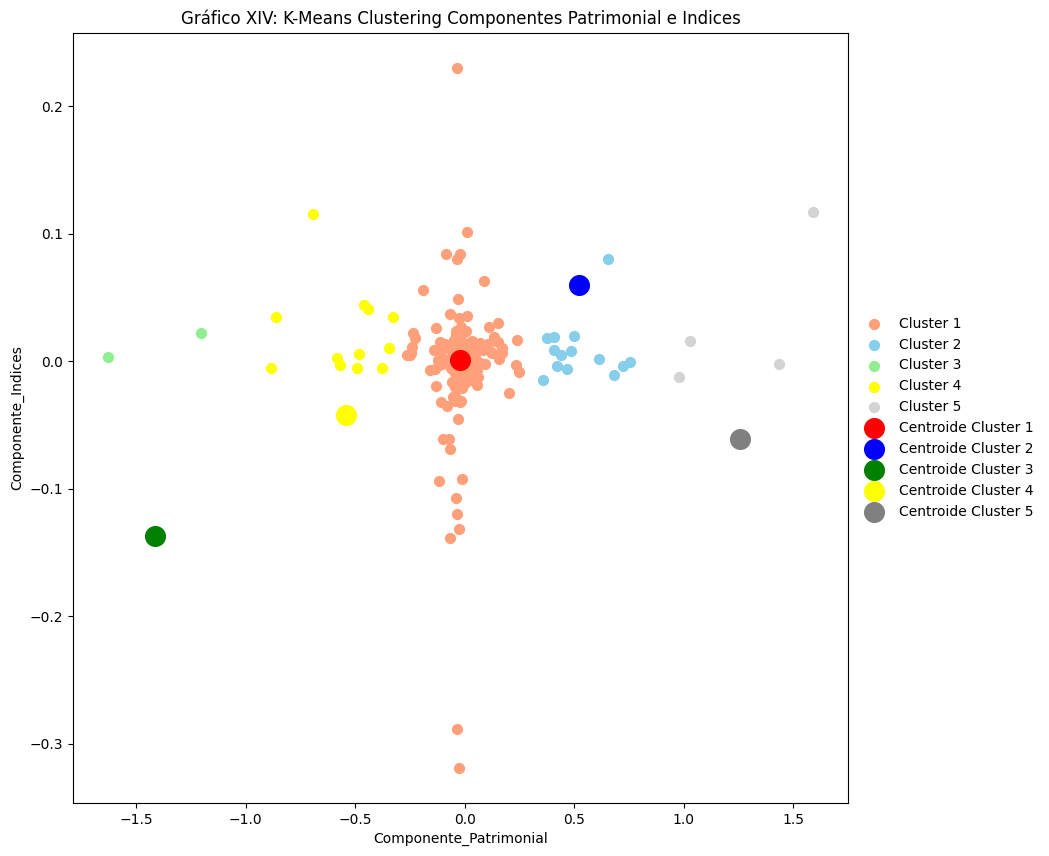

In [71]:
# Gráfico de clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Define colors for each cluster
#colors = ['red', 'blue', 'green', 'grey']

ax.scatter(datas[datas['kmeans']==0]['PC8_PAT'],datas[datas['kmeans']==0]['PC12_IND'],c='lightsalmon',s=50, label='Cluster 1')
ax.scatter(datas[datas['kmeans']==1]['PC8_PAT'],datas[datas['kmeans']==1]['PC12_IND'],c='skyblue',s=50, label='Cluster 2')
ax.scatter(datas[datas['kmeans']==2]['PC8_PAT'],datas[datas['kmeans']==2]['PC12_IND'],c='lightgreen',s=50, label='Cluster 3')
ax.scatter(datas[datas['kmeans']==3]['PC8_PAT'],datas[datas['kmeans']==3]['PC12_IND'],c='yellow',s=50, label='Cluster 4')
ax.scatter(datas[datas['kmeans']==4]['PC8_PAT'],datas[datas['kmeans']==4]['PC12_IND'],c='lightgrey',s=50, label='Cluster 5')
#ax.scatter(datas[datas['kmeans']==5]['PC8_PAT'],datas[datas['kmeans']==5]['PC12_IND'],c='pink',s=50, label='Cluster 6')

plt.scatter(cent[:, 0][0], cent[:, 1][0], s=200, c='red', label = 'Centroide Cluster 1')
plt.scatter(cent[:, 0][1], cent[:, 1][1], s=200, c='blue', label = 'Centroide Cluster 2')
plt.scatter(cent[:, 0][2], cent[:, 1][2], s=200, c='green', label = 'Centroide Cluster 3')
plt.scatter(cent[:, 0][3], cent[:, 1][3], s=200, c='yellow', label = 'Centroide Cluster 4')
plt.scatter(cent[:, 0][4], cent[:, 1][4], s=200, c='grey', label = 'Centroide Cluster 5')
#plt.scatter(cent[:, 0][4], cent[:, 1][5], s=200, c='violet', label = 'Centroide Cluster 6')

ax.set_title('Gráfico XIV: K-Means Clustering Componentes Patrimonial e Indices')
ax.set_xlabel('Componente_Patrimonial')
ax.set_ylabel('Componente_Indices')

plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

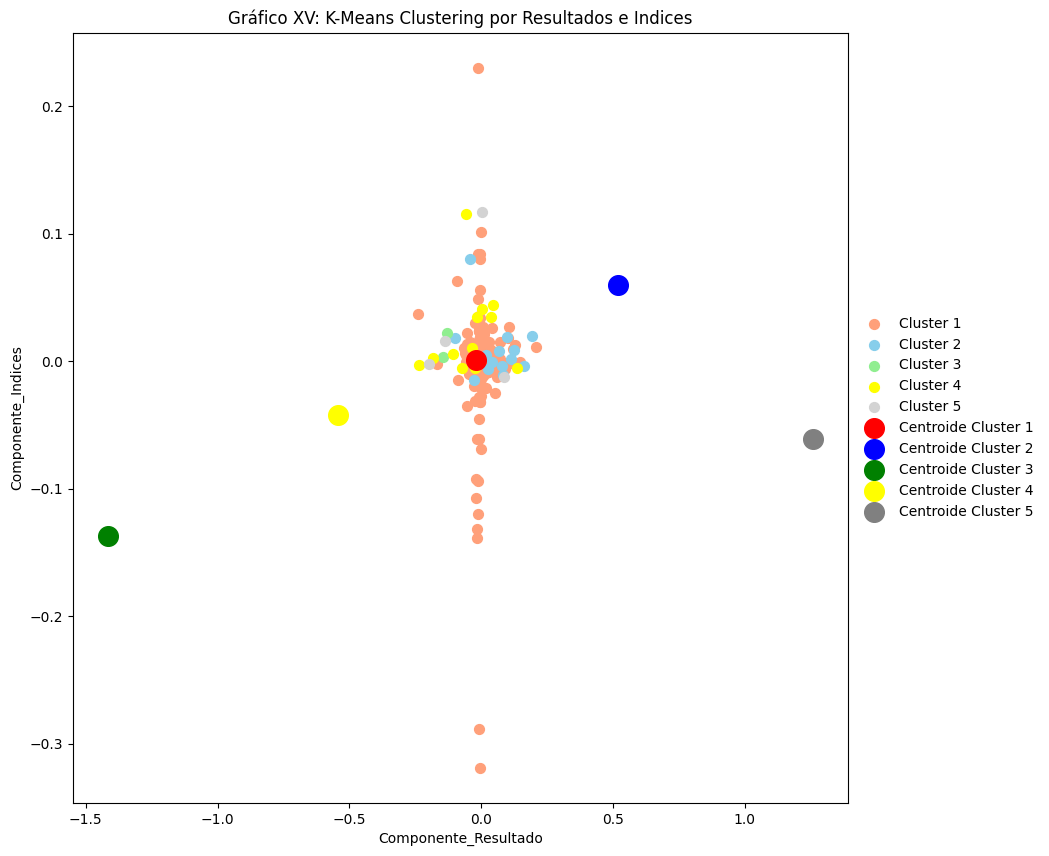

In [72]:
# Gráfico de clusters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Define colors for each cluster
#colors = ['red', 'blue', 'green', 'grey']

ax.scatter(datas[datas['kmeans']==0]['PC8_RES'],datas[datas['kmeans']==0]['PC12_IND'],c='lightsalmon',s=50, label='Cluster 1')
ax.scatter(datas[datas['kmeans']==1]['PC8_RES'],datas[datas['kmeans']==1]['PC12_IND'],c='skyblue',s=50, label='Cluster 2')
ax.scatter(datas[datas['kmeans']==2]['PC8_RES'],datas[datas['kmeans']==2]['PC12_IND'],c='lightgreen',s=50, label='Cluster 3')
ax.scatter(datas[datas['kmeans']==3]['PC8_RES'],datas[datas['kmeans']==3]['PC12_IND'],c='yellow',s=50, label='Cluster 4')
ax.scatter(datas[datas['kmeans']==4]['PC8_RES'],datas[datas['kmeans']==4]['PC12_IND'],c='lightgrey',s=50, label='Cluster 5')
#ax.scatter(datas[datas['kmeans']==5]['PC8_RES'],datas[datas['kmeans']==5]['PC12_IND'],c='pink',s=50, label='Cluster 6')
plt.scatter(cent[:, 0][0], cent[:, 1][0], s=200, c='red', label = 'Centroide Cluster 1')
plt.scatter(cent[:, 0][1], cent[:, 1][1], s=200, c='blue', label = 'Centroide Cluster 2')
plt.scatter(cent[:, 0][2], cent[:, 1][2], s=200, c='green', label = 'Centroide Cluster 3')
plt.scatter(cent[:, 0][3], cent[:, 1][3], s=200, c='yellow', label = 'Centroide Cluster 4')
plt.scatter(cent[:, 0][4], cent[:, 1][4], s=200, c='grey', label = 'Centroide Cluster 5')
#plt.scatter(cent[:, 0][4], cent[:, 1][5], s=200, c='grey', label = 'Centroide Cluster 6')
ax.set_title('Gráfico XV: K-Means Clustering por Resultados e Indices')
ax.set_xlabel('Componente_Resultado')
ax.set_ylabel('Componente_Indices')

plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

In [73]:
#Armar la categoria combinada
datas ['cat_comb'] = datas['Entidad NJ'].astype(str) + '_' +  datas['SEGMENTO'].astype(str)+ '_' +  datas['TOP'].astype(str)

In [74]:
datas.head()

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0          1          A       PM    92  RESTO       0.0936         40.0   
1          2          C       PM   113  RESTO       0.0599       5180.0   
2          3          A       PM   121  RESTO       0.0487         75.0   
3          4          A       PM    11     20       3.0154       2879.0   
4          5          A       PM   123  RESTO       0.0478       2229.0   

    PC8_PAT   PC8_RES  PC12_IND    cat_comb  kmeans  
0 -0.064581  0.001081 -0.068503  A_PM_RESTO       0  
1  0.655004 -0.042231  0.080473  C_PM_RESTO       1  
2 -0.099615 -0.017211 -0.061297  A_PM_RESTO       0  
3  0.484431  0.068064  0.007700     A_PM_20       1  
4  0.007053 -0.009576  0.023810  A_PM_RESTO       0

### Grupos Kmeans

In [75]:
datas_kmeans_0 = datas.loc[datas['kmeans'] == 0]

# Obtén los índices de 'datas_kmeans_0'
indices_kmeans_0 = datas_kmeans_0.index

# Usa estos índices para filtrar 'df_original'
df_filtered0 = df_original.loc[indices_kmeans_0]

# Muestra el DataFrame filtrado #agregar a la columna
df_filtered0 = df_filtered0.reset_index(drop=True)
df_filtered0

Entidad N Entidad NJ  Entidad Denominacion SEGMENTO  Rank    TOP  \
0            1          A           AFIANZADORA       PM    92  RESTO   
1            3          A                  ALBA       PM   121  RESTO   
2            5          A             ANTaRTIDA       PM   123  RESTO   
3            6          A                 ARGOS       PM   150  RESTO   
4            7          A   ASEGURADORA DEL SUR       PM   125  RESTO   
..         ...        ...                   ...      ...   ...    ...   
154         12          A  SAN CRIST BAL RETIRO   RETIRO    79  RESTO   
155         13          A        SEGUNDA RETIRO   RETIRO    88  RESTO   
156         14          A            SMG RETIRO   RETIRO   147  RESTO   
157         15          A      SOLVENCIA RETIRO   RETIRO   188  RESTO   
158         16          A         ZURICH RETIRO   RETIRO   190  RESTO   

     A- Disponibilidades  A- Inversiones  A- Creditos  A- Inmuebles  ...  \
0              75343.904    4.418959e+06  2538016.462         0.000  ...   
1             120756.139    3.055744e+06   917953.716    259778.133  ...   
2             188742.857    3.332890e+05  1188758.685   8732467.764  ...   
3             138838.428    3.494257e+06   384594.958   3169273.094  ...   
4             190858.813    1.682388e+06   841394.261         0.000  ...   
..                   ...             ...          ...           ...  ...   
154          1734213.270    1.240620e+08  1384065.672   9700731.628  ...   
155           184681.626    9.100902e+07  2559362.324         0.000  ...   
156            28359.561    6.627737e+07  1828515.002         0.000  ...   
157            39729.117    1.468380e+06    21268.763   1220041.878  ...   
158            12090.984    2.140035e+06    45107.309         0.000  ...   

     RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
0                    0.000000e+00                0.000       -2.860236e+05   
1                    3.690407e+06               -1.119       -9.368684e+05   
2                    5.113801e+04             -148.153        0.000000e+00   
3                    2.190941e+06           618343.236        0.000000e+00   
4                    1.905000e+06           -46477.682        0.000000e+00   
..                            ...                  ...                 ...   
154                  9.364751e+06           138079.927       -6.796444e+07   
155                  6.531756e+07                0.000        5.341187e+06   
156                  3.150508e+07               27.857       -3.100622e+04   
157                  4.846775e+05                0.000        0.000000e+00   
158                  3.571195e+05          -247412.097        0.000000e+00   

     RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM  RF -  TOTAL  \
0                                -1441457.503 -3.062344e+06 -2099533.852   
1                                -2514450.999 -2.484058e+06   241104.604   
2                                -1325125.271  1.112795e+06   910064.457   
3                                 -104104.715 -1.595828e+06  2675053.324   
4                                  -99268.425 -2.509935e+06  -173609.124   
..                                        ...           ...          ...   
154                              -1087954.587 -2.380650e+07   128928.311   
155                               -973025.087 -1.158964e+08  4219153.118   
156                               -114106.180 -8.975071e+07   299545.935   
157                                -24822.510 -2.055164e+06  -236150.526   
158                                     0.000 -2.777633e+06  -265929.911   

     RF -  ResultadoOperacionesOrdinarias  \
0                              358678.042   
1                              448460.390   
2                             2278367.005   
3                             -965227.689   
4                              -76895.541   
..                                    ...   
154                           5003409.335   
155  

In [104]:
#df_filtered0.to_csv('df_filtered0.csv', index=False)  # index=False evita guardar el índice como una columna

In [76]:
import numpy as np
columnas_intresado = [18,42,44]
df_filtered0.iloc[:,columnas_intresado].describe()

PATRIMONIO NETO   M - GESTION  RT SD - Primas NetasDevengadas
count      1.590000e+02   159.000000                    1.590000e+02
mean       1.735920e+07    63.604113                    3.058182e+07
std        5.134257e+07    63.627124                    8.995898e+07
min        5.700583e+04     0.000000                   -9.626630e+07
25%        1.815806e+06    35.770550                    1.406186e+06
50%        5.284866e+06    48.993400                    6.742251e+06
75%        1.562726e+07    67.948050                    2.396587e+07
max        5.531487e+08   420.563300                    8.009968e+08

In [77]:
columnas_intresado = [0,1,2,3,4,5,20,18,42,44]
df_filtered0.iloc[:,columnas_intresado]

Entidad N Entidad NJ  Entidad Denominacion SEGMENTO  Rank    TOP  \
0            1          A           AFIANZADORA       PM    92  RESTO   
1            3          A                  ALBA       PM   121  RESTO   
2            5          A             ANTaRTIDA       PM   123  RESTO   
3            6          A                 ARGOS       PM   150  RESTO   
4            7          A   ASEGURADORA DEL SUR       PM   125  RESTO   
..         ...        ...                   ...      ...   ...    ...   
154         12          A  SAN CRIST BAL RETIRO   RETIRO    79  RESTO   
155         13          A        SEGUNDA RETIRO   RETIRO    88  RESTO   
156         14          A            SMG RETIRO   RETIRO   147  RESTO   
157         15          A      SOLVENCIA RETIRO   RETIRO   188  RESTO   
158         16          A         ZURICH RETIRO   RETIRO   190  RESTO   

     B - GENERAL  PATRIMONIO NETO   M - GESTION  \
0           40.0      2.363805e+06      42.6909   
1           75.0      4.119678e+06      58.9051   
2         2229.0      5.857145e+06      72.9334   
3          406.0      6.566987e+06      75.4871   
4            0.0      1.757027e+06       3.6692   
..           ...               ...          ...   
154          0.0      3.092780e+07      24.3126   
155          0.0      1.762773e+07       7.3858   
156         20.0      1.142399e+07     124.5092   
157          0.0      2.732097e+06       0.0000   
158          1.0      1.124585e+06       0.0000   

     RT SD - Primas NetasDevengadas  
0                      7.207955e+06  
1                      3.995307e+06  
2                      6.177176e+06  
3                      1.411163e+06  
4                      3.294628e+05  
..                              ...  
154                   -9.626630e+07  
155                    1.407838e+07  
156                    1.160366e+07  
157                   -8.599299e+03  
158                   -7.477857e+04  

[159 rows x 10 columns]

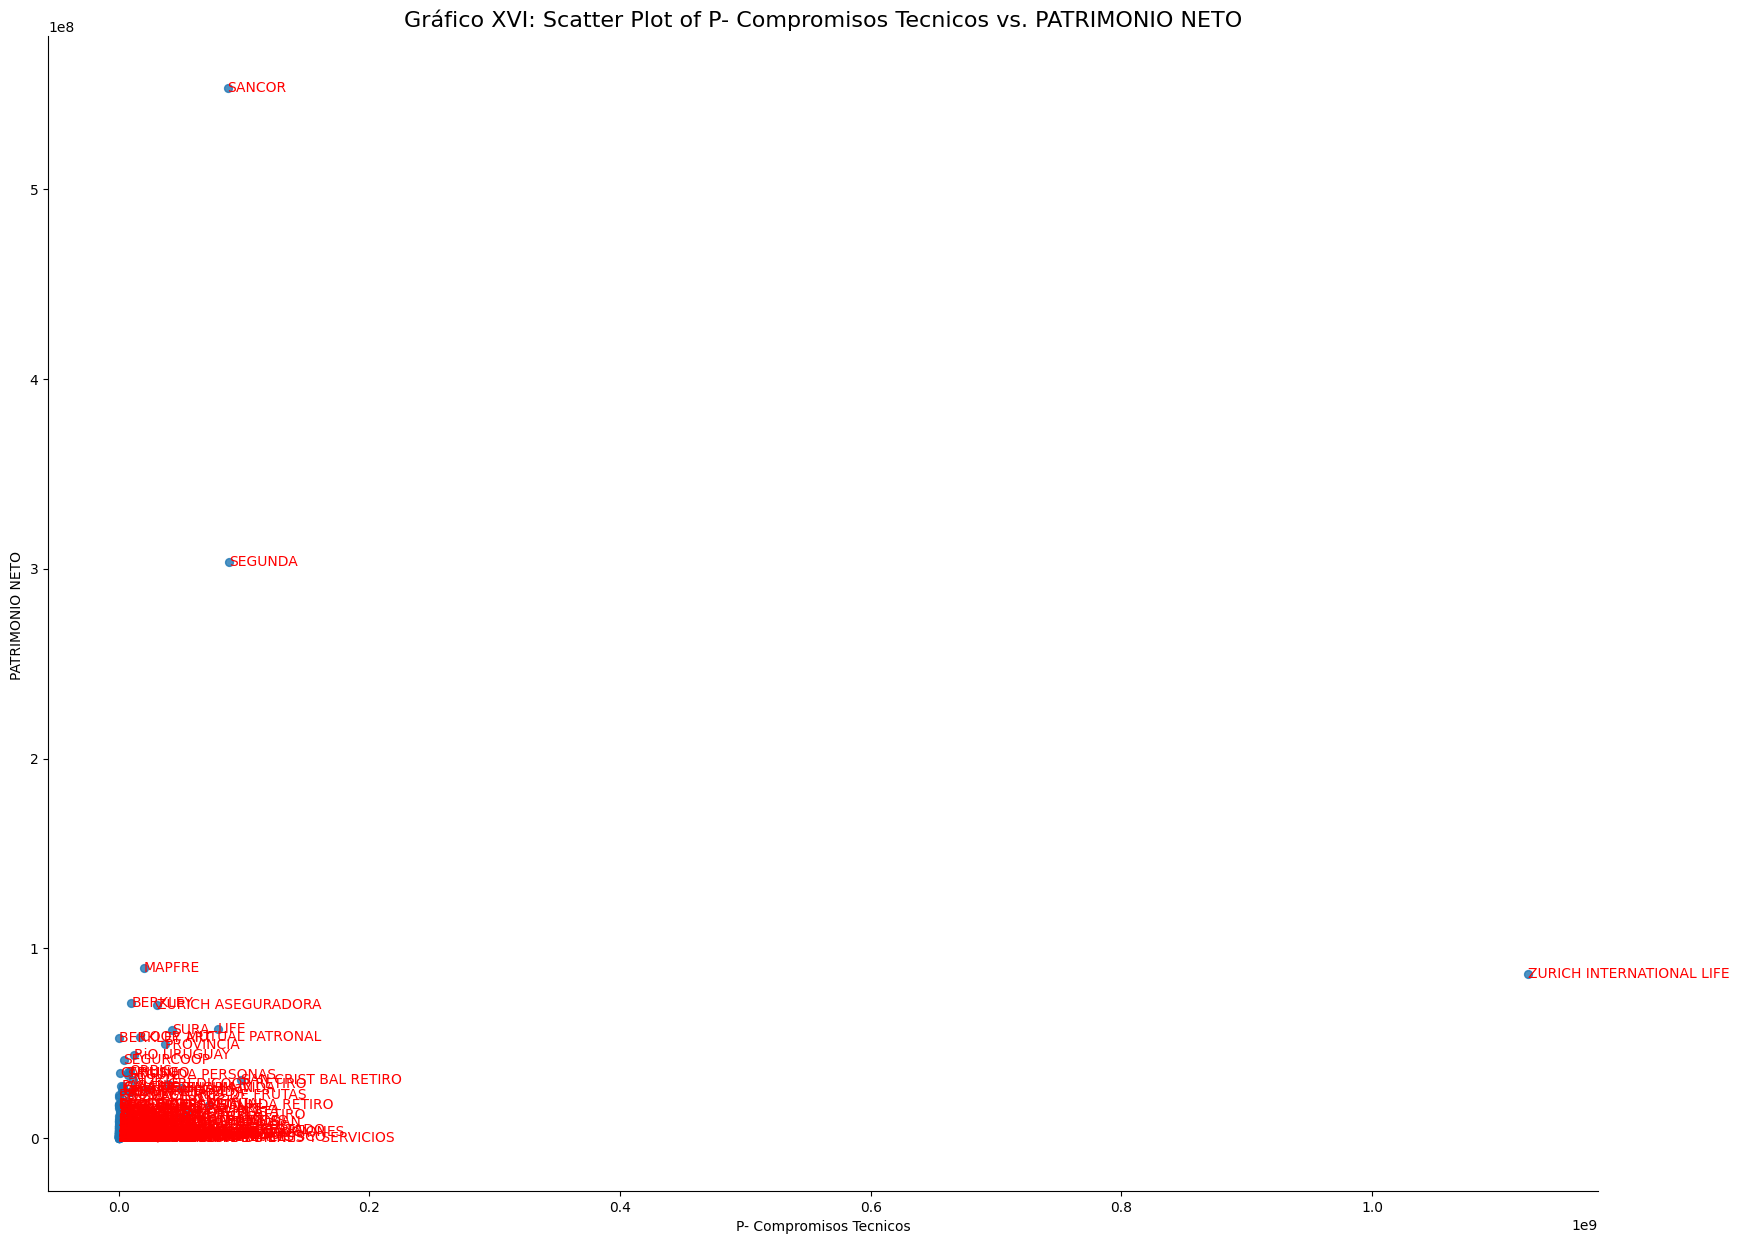

In [109]:
from matplotlib import pyplot as plt
df_filtered0.plot(kind='scatter', x='P- Compromisos Tecnicos', y='PATRIMONIO NETO ', s=32, alpha=.8,figsize=(20, 15))
plt.title("Gráfico XVI: Scatter Plot of P- Compromisos Tecnicos vs. PATRIMONIO NETO", fontsize=16)  # Add title here
plt.gca().spines[['top', 'right',]].set_visible(False)

for index, row in df_filtered0.iterrows():
    plt.annotate(row['Entidad Denominacion'],
                 (row['P- Compromisos Tecnicos'], row['PATRIMONIO NETO ']),
                 fontsize=10, color='red', ha='left', va='center')
#plt.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.9)

plt.show()

In [110]:
from matplotlib import pyplot as plt
df_filtered0.plot(kind='scatter', x='RT SD - Primas NetasDevengadas', y='RT SD - Siniestros NetosDevengados', s=32, alpha=.8,figsize=(20, 15))
plt.title("Gráfico XVII: Scatter Plot of RT SD - Primas NetasDevengadas vs. RT SD - Siniestros NetosDevengados", fontsize=16)  # Add title here
plt.gca().spines[['top', 'right',]].set_visible(False)

for index, row in df_filtered0.iterrows():
    plt.annotate(row['Entidad Denominacion'],
                 (row['RT SD - Primas NetasDevengadas'], row['RT SD - Siniestros NetosDevengados']),
                 fontsize=10, color='red', ha='left', va='center')

plt.show()

In [112]:
from matplotlib import pyplot as plt
df_filtered0.plot(kind='scatter', x='L - GESTION', y='M - GESTION', s=32, alpha=.8,figsize=(20, 15))
plt.title("Gráfico XVIII: Scatter Plot of L- GESTION vs. M- GESTION", fontsize=16)  # Add title here
plt.gca().spines[['top', 'right',]].set_visible(False)

for index, row in df_filtered0.iterrows():
    plt.annotate(row['Entidad Denominacion'],
                 (row['L - GESTION'], row['M - GESTION']),
                 fontsize=10, color='red', ha='left', va='center')

plt.show()

In [80]:
#Profiling Report:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=67af4d361a92a56d01c32d8c990f8b52dd3db4c915bf14bce50cba552ce5cbb0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [81]:
from ydata_profiling import ProfileReport


In [82]:
ProfileReport(datas.loc[datas['kmeans'] == 0], title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
df_filtered0.to_csv('mis_datos_formateados.csv', index=False)


In [84]:
datas_kmeans_1 = datas.loc[datas['kmeans'] == 1]

# Obtén los índices de 'datas_kmeans_0'
indices_kmeans_1 = datas_kmeans_1.index

# Usa estos índices para filtrar 'df_original'
df_filtered1 = df_original.loc[indices_kmeans_1]

# Muestra el DataFrame filtrado
df_filtered1

Entidad N Entidad NJ Entidad Denominacion SEGMENTO  Rank    TOP  \
1            2          C            AGROSALTA       PM   113  RESTO   
3            4          A              ALLIANZ       PM    11     20   
13          14          A         BBVA SEGUROS       PM    45     50   
72          73          A     MERCANTIL ANDINA       PM    10     10   
123        124          A     ZURICH SANTANDER       PM    29     50   
127          4          A         ASOCIART ART      ART    15     20   
129          6          A          EXPERTA ART      ART    14     20   
134         11          A        PROVINCIA ART      ART     5     10   
136         13          A          SEGUNDA ART      ART    19     20   
141          4          C     MUTUAL RIVADAVIA    Trans   109  RESTO   
153         11          A            HSBC VIDA     VIDA    50     50   
163         21          A           PRUDENTIAL     VIDA    33     50   
180          6          A          HSBC RETIRO   RETIRO    84  RESTO   
182          8          A        NACI N RETIRO   RETIRO    70  RESTO   

     A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  ...  \
1           2.256459e+06    6.147431e+07  1.358144e+07  1.764929e+07  ...   
3           1.387707e+07    2.869870e+08  1.256212e+08  7.954588e+06  ...   
13          6.156480e+05    5.065697e+07  1.960478e+07  1.549169e+06  ...   
72          9.134200e+05    1.963847e+08  9.357106e+07  4.402092e+07  ...   
123         4.917647e+05    8.393137e+07  2.281385e+07  0.000000e+00  ...   
127         2.077425e+06    4.327226e+08  2.955251e+07  0.000000e+00  ...   
129         1.001281e+06    2.484700e+08  2.555009e+07  2.777030e+07  ...   
134         1.065249e+06    3.880216e+08  7.489265e+07  0.000000e+00  ...   
136         8.958054e+05    2.350416e+08  4.038612e+07  0.000000e+00  ...   
141         2.335858e+05    2.913819e+07  4.782955e+06  5.669972e+06  ...   
153         7.369064e+05    2.057449e+08  8.878067e+06  0.000000e+00  ...   
163         1.240248e+05    4.002392e+08  2.899282e+07  1.022586e+06  ...   
180         2.782488e+06    2.937528e+08  5.127344e+06  0.000000e+00  ...   
182         2.075770e+05    3.250292e+08  2.596276e+06  0.000000e+00  ...   

     RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
1                    4.415820e+07         0.000000e+00       -8.373824e+05   
3                    3.352328e+08         3.577546e+05        0.000000e+00   
13                   3.205246e+07         9.022625e+05       -1.025781e+06   
72                   5.624413e+07         2.412082e+06        2.190628e+04   
123                  9.666663e+07         0.000000e+00       -1.047434e+06   
127                  1.509267e+08         1.122773e+07        2.480927e+05   
129                  1.395941e+08         8.907191e+06       -5.691117e+06   
134                  2.676160e+08         5.090235e+07       -1.391942e+06   
136                  1.362276e+08         2.522840e+07        9.009217e+04   
141                  1.833465e+07         1.514874e+05        2.319492e+04   
153                  2.900685e+08         1.314143e+04       -2.559411e+05   
163                  1.936094e+08         9.534760e+05        0.000000e+00   
180                  3.726105e+08         3.765887e+05        2.358321e+07   
182                  3.873854e+08         7.142938e+04       -2.761675e+08   

     RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM   RF -  TOTAL  \
1                               -3.300142e+05 -6.548793e+07 -1.891490e+07   
3                               -4.917388e+06 -5.209753e+08 -6.041762e+07   
13                               0.000000e+00 -8.905134e+07 -1.312642e+07   
72                              -1.207769e+06 -3.250265e+08 -4.194798e+07   
123                             -3.389538e+06 -1.110992e+08 -1.660285e+07   
127                             -2.011522e+07 -3.622973e+08 -4.729830e+07   
129                             -1.107701e+07 -2.621049e+0

In [85]:
import numpy as np
columnas_intresado = [8,15,18,38,43,44,45]
df_filtered1.iloc[:,columnas_intresado].describe()

A- Creditos  P- Compromisos Tecnicos  PATRIMONIO NETO   I  - GESTION  \
count  1.400000e+01             1.400000e+01      1.400000e+01     14.000000   
mean   3.542508e+07             7.295406e+07      8.239901e+07      2.768793   
std    3.700083e+07             1.114570e+08      4.316822e+07      5.241889   
min    2.596276e+06             0.000000e+00      3.644936e+07      0.000000   
25%    1.005391e+07             1.107822e+05      6.376204e+07      0.184200   
50%    2.418197e+07             5.277316e+06      7.673323e+07      1.029400   
75%    3.767772e+07             1.196193e+08      8.029300e+07      2.691725   
max    1.256212e+08             3.325803e+08      2.198913e+08     20.219800   

       N - GESTION  RT SD - Primas NetasDevengadas  \
count    14.000000                    1.400000e+01   
mean    -19.531600                    1.820484e+08   
std      62.607458                    1.697997e+08   
min    -196.966200                    7.083271e+06   
25%     -12.313825                    4.922638e+07   
50%       0.282000                    1.171477e+08   
75%       3.574050                    2.870065e+08   
max      40.302000                    5.623709e+08   

       RT SD - Siniestros NetosDevengados  
count                        1.400000e+01  
mean                        -7.942966e+07  
std                          1.055181e+08  
min                         -3.498343e+08  
25%                         -1.440249e+08  
50%                         -1.421825e+07  
75%                         -6.052809e+06  
max                          9.011622e+06

In [86]:
from matplotlib import pyplot as plt
df_filtered1.plot(kind='scatter', x='P- Compromisos Tecnicos', y='PATRIMONIO NETO ', s=32, alpha=.8,figsize=(20, 15))
plt.gca().spines[['top', 'right',]].set_visible(False)

for index, row in df_filtered1.iterrows():
    plt.annotate(row['Entidad Denominacion'],
                 (row['P- Compromisos Tecnicos'], row['PATRIMONIO NETO ']),
                 fontsize=10, color='red', ha='left', va='center')

plt.show()

In [87]:
datas_kmeans_2 = datas.loc[datas['kmeans'] == 2]

# Obtén los índices de 'datas_kmeans_0'
indices_kmeans_2 = datas_kmeans_2.index

# Usa estos índices para filtrar 'df_original'
df_filtered2 = df_original.loc[indices_kmeans_2]

# Muestra el DataFrame filtrado
df_filtered2

Entidad N Entidad NJ Entidad Denominacion SEGMENTO  Rank TOP  \
20         21          A       CAJA GENERALES       PM     3  10   
74         75          A           MERIDIONAL       PM    16  20   

    A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  ...  \
20          2018934.854    3.582729e+08  1.184086e+08  1.336828e+07  ...   
74          7160319.383    1.017215e+08  7.255116e+07  2.279155e+07  ...   

    RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
20                  2.381193e+08          2158583.290        -5787940.190   
74                  6.614264e+07         -4038622.902         -385378.313   

    RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM   RF -  TOTAL  \
20                              -2136206.205 -3.572462e+08 -2.763778e+07   
74                              -8244701.486 -9.797354e+07 -2.387227e+07   

    RF -  ResultadoOperacionesOrdinarias  \
20                          -8378749.972   
74                           8004219.596   

    RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  \
20                                         0.0                 -1.251501e+07   
74                                         0.0                 -8.085388e+06   

    RF -  RESULTADODELEJERCICIO  
20                -2.089376e+07  
74                -8.116852e+04  

[2 rows x 87 columns]

In [88]:
import numpy as np

columnas_intresado = [8,15,18,38,43,44,45]
df_filtered2.iloc[:,columnas_intresado].describe()

A- Creditos  P- Compromisos Tecnicos  PATRIMONIO NETO   I  - GESTION  \
count  2.000000e+00             2.000000e+00      2.000000e+00      2.000000   
mean   9.547987e+07             4.717334e+07      1.672663e+08     28.983450   
std    3.242609e+07             1.075747e+07      1.503748e+08     35.542934   
min    7.255116e+07             3.956666e+07      6.093526e+07      3.850800   
25%    8.401552e+07             4.337000e+07      1.141008e+08     16.417125   
50%    9.547987e+07             4.717334e+07      1.672663e+08     28.983450   
75%    1.069442e+08             5.097669e+07      2.204318e+08     41.549775   
max    1.184086e+08             5.478003e+07      2.735973e+08     54.116100   

       N - GESTION  RT SD - Primas NetasDevengadas  \
count     2.000000                    2.000000e+00   
mean     -1.545800                    3.864869e+08   
std       2.142109                    3.838220e+08   
min      -3.060500                    1.150838e+08   
25%      -2.303150                    2.507854e+08   
50%      -1.545800                    3.864869e+08   
75%      -0.788450                    5.221885e+08   
max      -0.031100                    6.578901e+08   

       RT SD - Siniestros NetosDevengados  
count                        2.000000e+00  
mean                        -1.673065e+08  
std                          2.121854e+08  
min                         -3.173442e+08  
25%                         -2.423253e+08  
50%                         -1.673065e+08  
75%                         -9.228761e+07  
max                         -1.726875e+07

In [89]:
from matplotlib import pyplot as plt
df_filtered2.plot(kind='scatter', x='P- Compromisos Tecnicos', y='PATRIMONIO NETO ', s=32, alpha=.8,figsize=(20, 15))
plt.gca().spines[['top', 'right',]].set_visible(False)

for index, row in df_filtered2.iterrows():
    plt.annotate(row['Entidad Denominacion'],
                 (row['P- Compromisos Tecnicos'], row['PATRIMONIO NETO ']),
                 fontsize=10, color='red', ha='left', va='center')

plt.show()

In [90]:
datas_kmeans_3 = datas.loc[datas['kmeans'] == 3]

# Obtén los índices de 'datas_kmeans_0'
indices_kmeans_3 = datas_kmeans_3.index

# Usa estos índices para filtrar 'df_original'
df_filtered3 = df_original.loc[indices_kmeans_3]

# Muestra el DataFrame filtrado
df_filtered3

Entidad N Entidad NJ  Entidad Denominacion SEGMENTO  Rank    TOP  \
10          11          A              ASSURANT       PM    44     50   
26          27          A         CHUBB SEGUROS       PM    25     50   
28          29          E                COFACE       PM   114  RESTO   
45          46          A         FED. PATRONAL       PM     1     10   
54          55          A  HOLANDO SUDAMERICANA       PM    28     50   
105        106          A                   SMG       PM    26     50   
108        109          E                 STARR       PM    63  RESTO   
121        122          A                ZURICH       PM    12     20   
130          7          A            GALENO ART      ART    17     20   
133         10          A        PREVENCI N ART      ART     4     10   
177          3          A       ESTRELLA RETIRO   RETIRO    34     50   
183          9          A       OR GENES RETIRO   RETIRO    69  RESTO   

     A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  ...  \
10          3.100096e+06    8.396632e+06  1.656230e+07  0.000000e+00  ...   
26          2.519300e+06    6.997085e+07  3.253008e+07  0.000000e+00  ...   
28          7.109035e+06    1.270930e+07  1.087657e+07  0.000000e+00  ...   
45          2.322852e+07    1.529934e+09  2.813820e+08  3.550136e+06  ...   
54          1.011583e+06    1.579664e+07  3.022869e+07  1.288308e+07  ...   
105         5.282901e+06    4.715780e+07  4.568484e+07  8.666145e+06  ...   
108         1.183559e+07    9.835178e+06  9.785857e+06  0.000000e+00  ...   
121         1.508816e+07    5.263544e+07  8.851276e+07  2.971765e+07  ...   
130         2.960165e+05    1.127506e+08  4.549032e+07  5.450924e+06  ...   
133         3.349811e+07    5.080110e+08  6.948351e+07  1.290805e+07  ...   
177         1.913951e+05    4.137984e+08  8.966162e+06  1.185192e+05  ...   
183         1.388958e+06    7.016470e+08  4.417259e+06  1.637843e+06  ...   

     RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
10                   4.376186e+05         0.000000e+00       -2.829421e+05   
26                   5.118479e+07         5.118320e+06       -7.285626e+04   
28                   4.991202e+05         0.000000e+00       -4.640310e+02   
45                   2.130095e+09         1.147852e+07       -2.673488e+08   
54                   1.348589e+07         2.799168e+05       -3.782250e+05   
105                  3.709714e+07         2.540919e+04       -7.800502e+05   
108                  6.605118e+06         1.807227e+04       -1.356660e+05   
121                  1.607325e+07         3.156776e+07       -2.834465e+06   
130                  2.751911e+07         7.785289e+06       -9.821068e+05   
133                  5.568954e+08         6.390307e+07       -3.649119e+07   
177                  4.322678e+08         4.364799e+04        2.461971e+08   
183                  9.683644e+08         3.116925e+05       -8.122781e+08   

     RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM   RF -  TOTAL  \
10                              -3.742339e+04 -1.846659e+07 -8.172886e+06   
26                              -4.953915e+06 -6.259010e+07  2.792673e+06   
28                              -1.043288e+05 -5.624565e+06 -2.969627e+06   
45                              -3.916482e+07 -2.053698e+09 -5.247467e+07   
54                              -1.602722e+06 -2.817002e+07 -1.571544e+07   
105                             -9.841067e+06 -9.977577e+07 -2.217290e+07   
108                             -1.476448e+05 -6.492154e+06  1.113831e+06   
121                              4.884065e+05 -1.339005e+08 -6.282766e+07   
130                             -5.734122e+06 -1.949767e+08 -2.455672e+07   
133                             -9.007761e+06 -7.371872e+08 -6.474333e+07   
177                             -1.072818e+07 -5.157167e+08  2.463170e+08   
183                             -1.676669e+05 -9.410467e+08 -7.817018e+08   

     RF -  ResultadoOperacionesOrdin

In [91]:
import numpy as np

columnas_intresado = [8,15,18,38,43,44,45]
df_filtered3.iloc[:,columnas_intresado].describe()

A- Creditos  P- Compromisos Tecnicos  PATRIMONIO NETO   I  - GESTION  \
count  1.200000e+01             1.200000e+01      1.200000e+01     12.000000   
mean   5.366003e+07             9.360186e+07      8.336946e+07     23.031675   
std    7.627835e+07             1.779462e+08      1.549682e+08     29.457387   
min    4.417259e+06             0.000000e+00      8.829494e+06      0.000000   
25%    1.060389e+07             4.840127e+06      1.785884e+07      2.710025   
50%    3.137938e+07             1.473004e+07      3.371725e+07     11.898900   
75%    5.163451e+07             5.893955e+07      6.150186e+07     30.022900   
max    2.813820e+08             5.782915e+08      5.643240e+08     97.463300   

       N - GESTION  RT SD - Primas NetasDevengadas  \
count    12.000000                    1.200000e+01   
mean     12.413683                    2.342564e+08   
std      46.268780                    3.112328e+08   
min     -17.857300                    1.908134e+06   
25%      -7.383575                    5.226390e+07   
50%       0.857300                    9.655197e+07   
75%       8.943875                    2.615380e+08   
max     154.889100                    1.065021e+09   

       RT SD - Siniestros NetosDevengados  
count                        1.200000e+01  
mean                        -1.085233e+08  
std                          1.896534e+08  
min                         -6.174094e+08  
25%                         -1.144255e+08  
50%                         -1.862842e+07  
75%                         -3.302962e+05  
max                          6.832837e+04

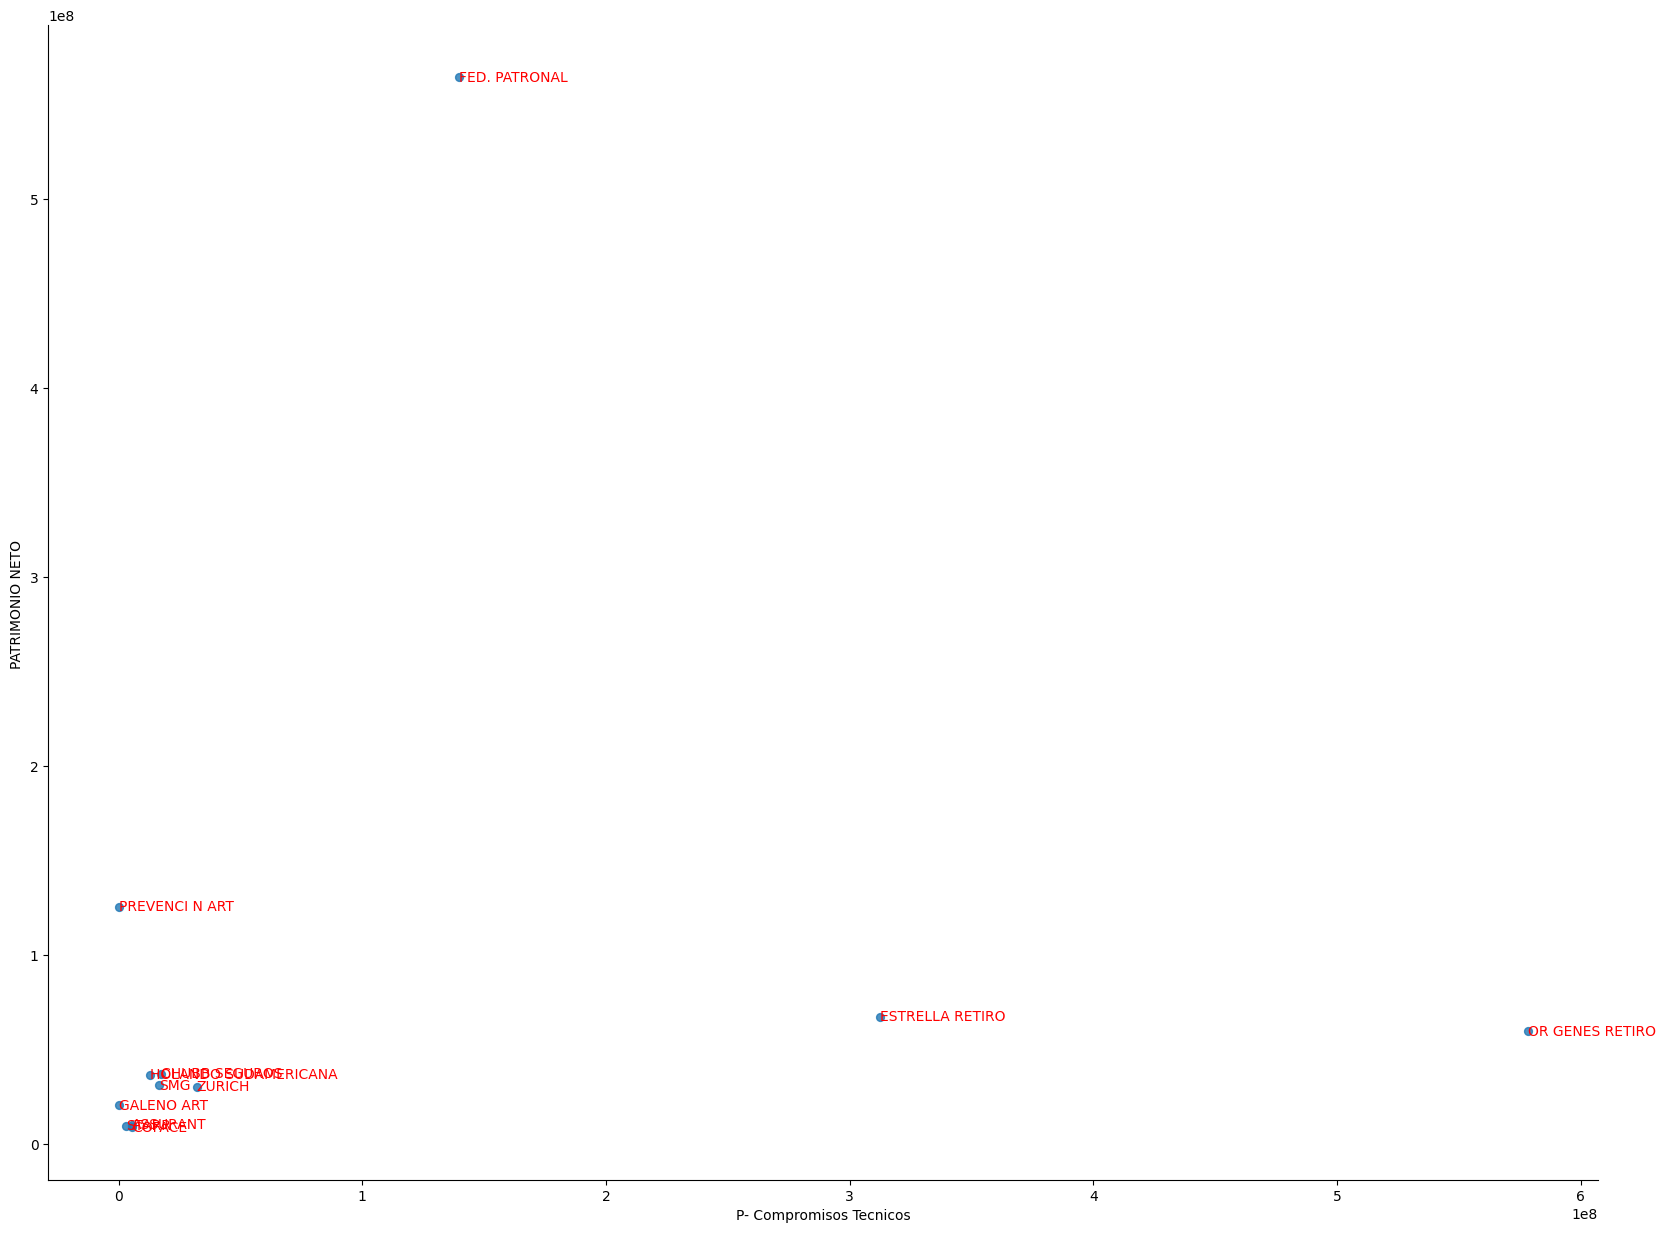

In [92]:
from matplotlib import pyplot as plt
df_filtered3.plot(kind='scatter', x='P- Compromisos Tecnicos', y='PATRIMONIO NETO ', s=32, alpha=.8,figsize=(20, 15))
plt.gca().spines[['top', 'right',]].set_visible(False)

for index, row in df_filtered3.iterrows():
    plt.annotate(row['Entidad Denominacion'],
                 (row['P- Compromisos Tecnicos'], row['PATRIMONIO NETO ']),
                 fontsize=10, color='red', ha='left', va='center')

plt.show()

In [93]:
datas_kmeans_4 = datas.loc[datas['kmeans'] == 4]

# Obtén los índices de 'datas_kmeans_0'
indices_kmeans_4 = datas_kmeans_4.index

# Usa estos índices para filtrar 'df_original'
df_filtered4 = df_original.loc[indices_kmeans_4]

# Muestra el DataFrame filtrado
df_filtered4

Entidad N Entidad NJ  Entidad Denominacion SEGMENTO  Rank TOP  \
16         17          C  BERNARDINO RIVADAVIA       PM     7  10   
57         58          O      INST. AUTaRQUICO       PM    38  50   
77         78          A                NACIoN       PM     9  10   
98         99          C         SAN CRISToBAL       PM     8  10   

    A- Disponibilidades  A- Inversiones   A- Creditos  A- Inmuebles  ...  \
16         2.165754e+07    3.630890e+08  7.691889e+07  1.027609e+06  ...   
57         8.937045e+05    9.891338e+07  2.066008e+07  4.566992e+07  ...   
77         2.372235e+06    4.102800e+08  1.598199e+08  0.000000e+00  ...   
98         2.122764e+07    4.434437e+08  1.177792e+08  0.000000e+00  ...   

    RF -  Resultados porTenencia  RF -  OtrosIngresos  RF -  OtrosEgresos  \
16                  2.560241e+08          1617496.488               0.000   
57                  9.240693e+07            34447.227        -5514407.125   
77                  4.502161e+08          4022574.525               0.000   
98                  2.328704e+08          2919815.782        -2109891.021   

    RF -  Gastos deExplotacion yOtros Cargos  RF -  RECPAM   RF -  TOTAL  \
16                             -1.997510e+06 -4.431724e+08 -1.077230e+08   
57                             -7.416718e+06 -1.483298e+08 -3.808976e+07   
77                             -2.670855e+07 -5.860021e+08 -1.023193e+08   
98                             -1.539830e+07 -4.319913e+08 -7.114451e+07   

    RF -  ResultadoOperacionesOrdinarias  \
16                         -9.826147e+07   
57                         -3.843009e+06   
77                         -7.576595e+06   
98                         -6.132682e+07   

    RF -  Resultado OperacionesExtraordinarias  RF -  Impuestoa lasGanancias  \
16                                         0.0                         0.000   
57                                         0.0                   -121554.012   
77                                         0.0                   3265221.343   
98                                         0.0                         0.000   

    RF -  RESULTADODELEJERCICIO  
16                -9.826147e+07  
57                -3.964563e+06  
77                -4.311374e+06  
98                -6.132682e+07  

[4 rows x 87 columns]

In [94]:
import numpy as np

columnas_intresado = [2,8,15,18,38,43,44,45]
df_filtered4.iloc[:,columnas_intresado].describe()

A- Creditos  P- Compromisos Tecnicos  PATRIMONIO NETO   I  - GESTION  \
count  4.000000e+00             4.000000e+00      4.000000e+00      4.000000   
mean   9.379452e+07             3.998121e+07      2.889897e+08     12.984300   
std    5.935219e+07             2.524643e+07      1.045753e+08     21.824980   
min    2.066008e+07             4.294310e+06      1.331782e+08      0.253700   
25%    6.285419e+07             3.258407e+07      2.791547e+08      1.443575   
50%    9.734906e+07             4.649221e+07      3.329003e+08      3.026400   
75%    1.282894e+08             5.388935e+07      3.427354e+08     14.567125   
max    1.598199e+08             6.264609e+07      3.569801e+08     45.630700   

       N - GESTION  RT SD - Primas NetasDevengadas  \
count     4.000000                    4.000000e+00   
mean    -10.302150                    3.221111e+08   
std       8.927341                    2.062220e+08   
min     -21.256100                    7.603638e+07   
25%     -15.419150                    1.895718e+08   
50%      -9.433750                    3.595957e+08   
75%      -4.316750                    4.921350e+08   
max      -1.085000                    4.932165e+08   

       RT SD - Siniestros NetosDevengados  
count                        4.000000e+00  
mean                        -1.476094e+08  
std                          1.311495e+08  
min                         -2.612677e+08  
25%                         -2.599895e+08  
50%                         -1.565259e+08  
75%                         -4.414581e+07  
max                         -1.611834e+07

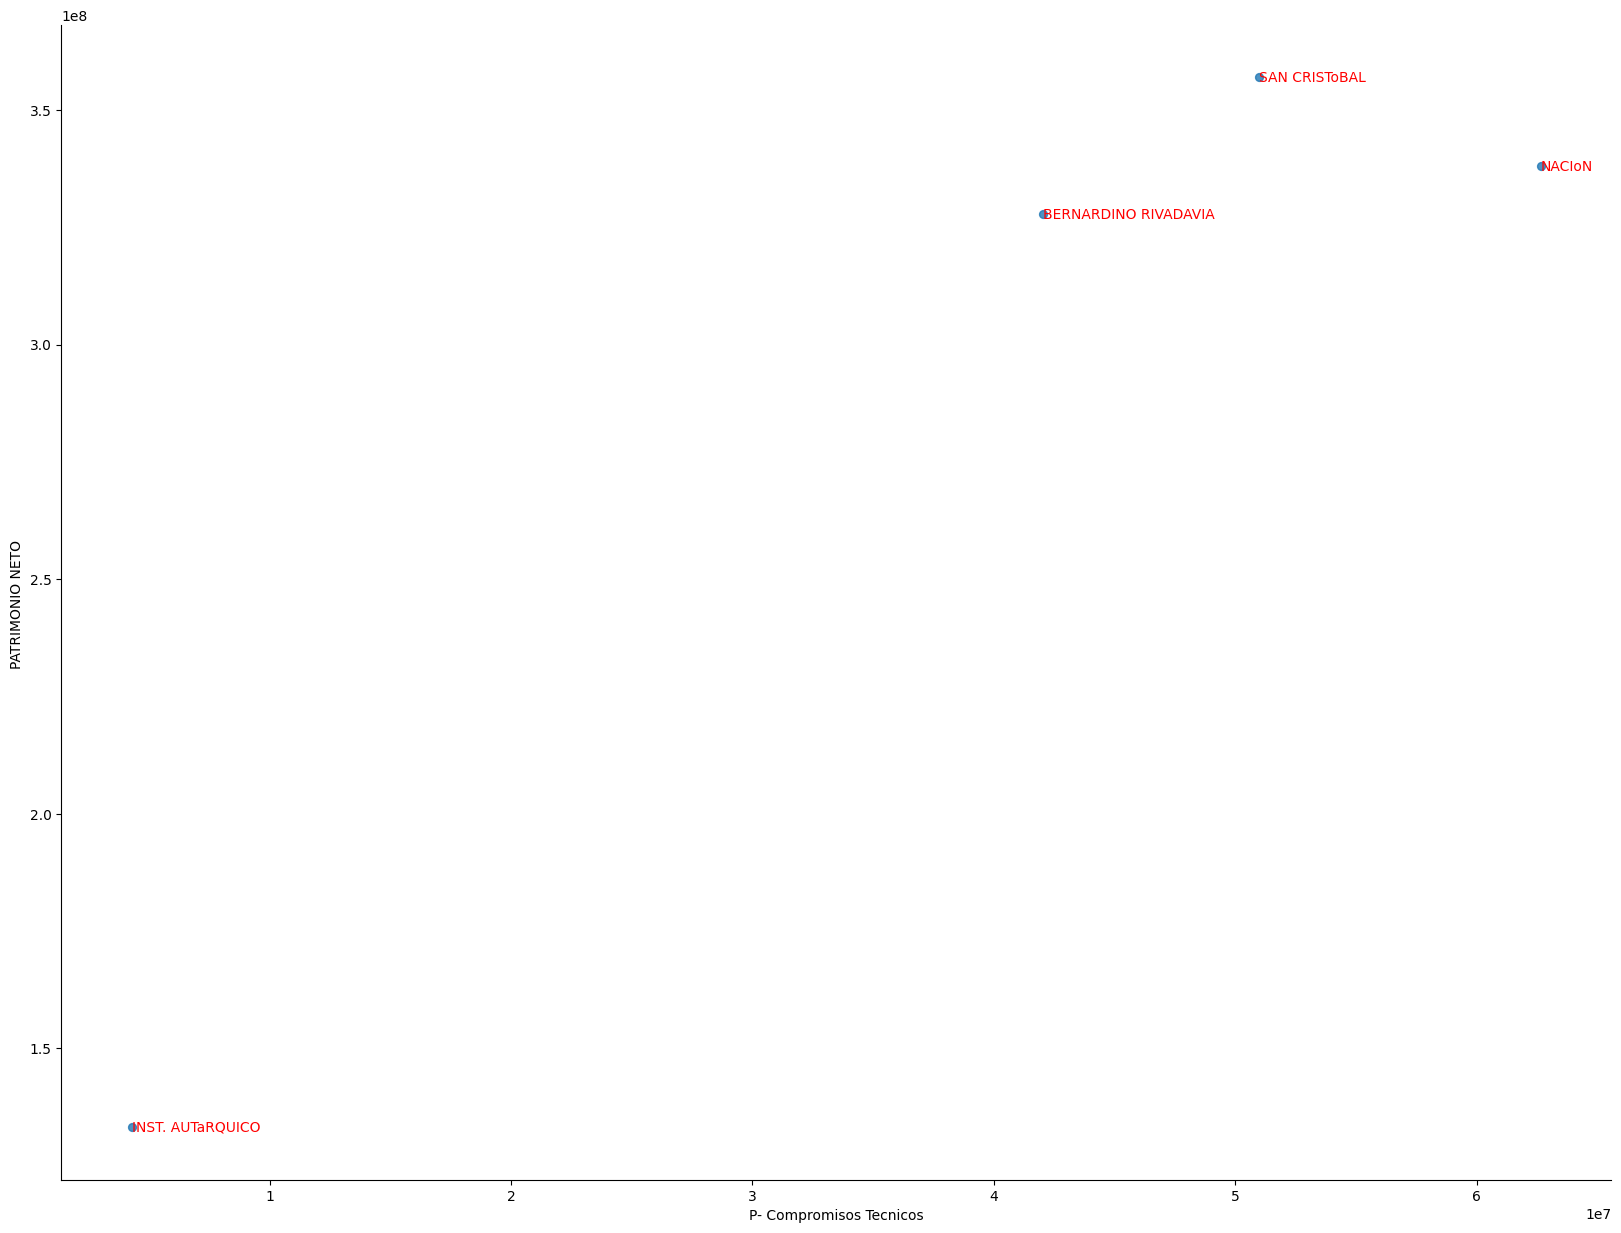

In [95]:
from matplotlib import pyplot as plt
df_filtered4.plot(kind='scatter', x='P- Compromisos Tecnicos', y='PATRIMONIO NETO ', s=32, alpha=.8,figsize=(20, 15))
plt.gca().spines[['top', 'right',]].set_visible(False)

for index, row in df_filtered4.iterrows():
    plt.annotate(row['Entidad Denominacion'],
                 (row['P- Compromisos Tecnicos'], row['PATRIMONIO NETO ']),
                 fontsize=10, color='red', ha='left', va='center')

plt.show()


In [96]:
datas.head()

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0          1          A       PM    92  RESTO       0.0936         40.0   
1          2          C       PM   113  RESTO       0.0599       5180.0   
2          3          A       PM   121  RESTO       0.0487         75.0   
3          4          A       PM    11     20       3.0154       2879.0   
4          5          A       PM   123  RESTO       0.0478       2229.0   

    PC8_PAT   PC8_RES  PC12_IND    cat_comb  kmeans  
0 -0.064581  0.001081 -0.068503  A_PM_RESTO       0  
1  0.655004 -0.042231  0.080473  C_PM_RESTO       1  
2 -0.099615 -0.017211 -0.061297  A_PM_RESTO       0  
3  0.484431  0.068064  0.007700     A_PM_20       1  
4  0.007053 -0.009576  0.023810  A_PM_RESTO       0

#MANOVA

### Armado dataframe con PCA Ideales

In [113]:
datas.head()

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0          1          A       PM    92  RESTO       0.0936         40.0   
1          2          C       PM   113  RESTO       0.0599       5180.0   
2          3          A       PM   121  RESTO       0.0487         75.0   
3          4          A       PM    11     20       3.0154       2879.0   
4          5          A       PM   123  RESTO       0.0478       2229.0   

    PC8_PAT   PC8_RES  PC12_IND    cat_comb  kmeans  
0 -0.064581  0.001081 -0.068503  A_PM_RESTO       0  
1  0.655004 -0.042231  0.080473  C_PM_RESTO       1  
2 -0.099615 -0.017211 -0.061297  A_PM_RESTO       0  
3  0.484431  0.068064  0.007700     A_PM_20       1  
4  0.007053 -0.009576  0.023810  A_PM_RESTO       0

In [114]:
extraer_orginal = [0,1,3,4,5,19,20]
original_man = df_original.iloc[:,extraer_orginal]
extraer_datas = [7,8,9,10,11]
dastas_man =  datas.iloc[:,extraer_datas]
df_manova = pd.concat([original_man,dastas_man],axis=1)
#df_manova = df_manova.loc[df_manova['kmeans'] == 0]
df_manova.head(20)

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0           1          A       PM    92  RESTO       0.0936         40.0   
1           2          C       PM   113  RESTO       0.0599       5180.0   
2           3          A       PM   121  RESTO       0.0487         75.0   
3           4          A       PM    11     20       3.0154       2879.0   
4           5          A       PM   123  RESTO       0.0478       2229.0   
5           6          A       PM   150  RESTO       0.0158        406.0   
6           7          A       PM   125  RESTO       0.0442          0.0   
7           8          A       PM   130  RESTO       0.0383         31.0   
8           9          C       PM   131  RESTO       0.0380          0.0   
9          10          A       PM   132  RESTO       0.0370         10.0   
10         11          A       PM    44     50       0.3820         40.0   
11         12          A       PM   138  RESTO       0.0284         28.0   
12         13          A       PM    40     50       0.4718       3345.0   
13         14          A       PM    45     50       0.3576        397.0   
14         15          A       PM   139  RESTO       0.0272         15.0   
15         16          A       PM    36     50       0.5995        362.0   
16         17          C       PM     7     10       3.5747      18050.0   
17         18          A       PM    72  RESTO       0.1647          7.0   
18         19          A       PM   122  RESTO       0.0487          0.0   
19         20          O       PM    48     50       0.3178       1156.0   

     PC8_PAT   PC8_RES  PC12_IND    cat_comb  kmeans  
0  -0.064581  0.001081 -0.068503  A_PM_RESTO       0  
1   0.655004 -0.042231  0.080473  C_PM_RESTO       1  
2  -0.099615 -0.017211 -0.061297  A_PM_RESTO       0  
3   0.484431  0.068064  0.007700     A_PM_20       1  
4   0.007053 -0.009576  0.023810  A_PM_RESTO       0  
5  -0.004716 -0.013708 -0.007188  A_PM_RESTO       0  
6  -0.035101 -0.011956  0.230282  A_PM_RESTO       0  
7  -0.037254 -0.018998 -0.107224  A_PM_RESTO       0  
8   0.028843 -0.006906  0.014693  C_PM_RESTO       0  
9  -0.115463 -0.010845 -0.094355  A_PM_RESTO       0  
10 -0.347553 -0.034182  0.010618     A_PM_50       3  
11 -0.033517 -0.002278  0.009102  A_PM_RESTO       0  
12 -0.110952  0.031947  0.014969     A_PM_50       0  
13  0.378009 -0.098207  0.018069     A_PM_50       1  
14 -0.025330 -0.007455  0.016954  A_PM_RESTO       0  
15 -0.040203  0.071298  0.014679     A_PM_50       0  
16  1.436216 -0.198161 -0.001890     C_PM_10       4  
17  0.009269  0.011220  0.008478  A_PM_RESTO       0  
18 -0.013398  0.018401 -0.021191  A_PM_RESTO       0  
19  0.201788  0.052207 -0.024811     O_PM_50       0

In [115]:
#LIBRERIAS
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA


In [116]:
df_manova = df_manova.rename(columns={'Entidad NJ': 'Tipo',
                                            'SEGMENTO': 'Segmento',
                                            'TOP': 'Top_Categoria',
                                           'B - GENERAL':'Juicios' })
df_manova.head()

Entidad N Tipo Segmento  Rank Top_Categoria  A - GENERAL  Juicios  \
0          1    A       PM    92         RESTO       0.0936     40.0   
1          2    C       PM   113         RESTO       0.0599   5180.0   
2          3    A       PM   121         RESTO       0.0487     75.0   
3          4    A       PM    11            20       3.0154   2879.0   
4          5    A       PM   123         RESTO       0.0478   2229.0   

    PC8_PAT   PC8_RES  PC12_IND    cat_comb  kmeans  
0 -0.064581  0.001081 -0.068503  A_PM_RESTO       0  
1  0.655004 -0.042231  0.080473  C_PM_RESTO       1  
2 -0.099615 -0.017211 -0.061297  A_PM_RESTO       0  
3  0.484431  0.068064  0.007700     A_PM_20       1  
4  0.007053 -0.009576  0.023810  A_PM_RESTO       0

### Modelo Manova Variables Principales

In [117]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC8_PAT ~ C(Tipo) + C(Segmento) + C(Top_Categoria) + C(kmeans)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.4903 2.0000 175.0000 90.9783 0.0000
          Pillai's trace 0.5097 2.0000 175.0000 90.9783 0.0000
  Hotelling-Lawley trace 1.0398 2.0000 175.0000 90.9783 0.0000
     Roy's greatest root 1.0398 2.0000 175.0000 90.9783 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9464 6.0000 350.0000  1.6284 0.1383
          Pillai's trace 0.0542 6.0000 352.0000  1.6330 0.1370
  Hotelling

In [118]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES ~ C(Tipo) + C(Segmento) + C(Top_Categoria) + C(kmeans)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.4731 2.0000 175.0000 97.4475 0.0000
         Pillai's trace 0.5269 2.0000 175.0000 97.4475 0.0000
 Hotelling-Lawley trace 1.1137 2.0000 175.0000 97.4475 0.0000
    Roy's greatest root 1.1137 2.0000 175.0000 97.4475 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9067 6.0000 350.0000  2.9284 0.0084
         Pillai's trace 0.0943 6.0000 352.0000  2.9035 0.0089
 Hotelling-Lawley trace 0.

In [119]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC12_IND ~ C(Tipo) + C(Segmento) + C(Top_Categoria) + C(kmeans)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.4943 2.0000 175.0000 89.5133 0.0000
         Pillai's trace 0.5057 2.0000 175.0000 89.5133 0.0000
 Hotelling-Lawley trace 1.0230 2.0000 175.0000 89.5133 0.0000
    Roy's greatest root 1.0230 2.0000 175.0000 89.5133 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        C(Tipo)         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9493 6.0000 350.0000  1.5369 0.1651
         Pillai's trace 0.0510 6.0000 352.0000  1.5351 0.1657
 Hotelling-Lawley trace 0.

In [120]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES + PC8_PAT  + PC12_IND ~ C(Tipo) + C(Segmento) + C(Top_Categoria) + C(kmeans)', data=df_manova)

# Obtener los resultados
print(md.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.4688 4.0000 173.0000 49.0109 0.0000
           Pillai's trace 0.5312 4.0000 173.0000 49.0109 0.0000
   Hotelling-Lawley trace 1.1332 4.0000 173.0000 49.0109 0.0000
      Roy's greatest root 1.1332 4.0000 173.0000 49.0109 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         C(Tipo)         Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.8650 12.0000 458.0065  2.1504 0.0131
          Pillai's trace 0.1397 12.0000 525.0000  2.1361 0.

In [121]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import numpy as np

# Obtener los resultados del MANOVA
md = MANOVA.from_formula('Juicios + PC8_RES + PC8_PAT  + PC12_IND ~ C(Tipo) + C(Segmento) + C(Top_Categoria) + C(kmeans)', data=df_manova)
results = md.mv_test()


In [122]:
print(results)

                   Multivariate linear model
                                                               
---------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.4688 4.0000 173.0000 49.0109 0.0000
           Pillai's trace 0.5312 4.0000 173.0000 49.0109 0.0000
   Hotelling-Lawley trace 1.1332 4.0000 173.0000 49.0109 0.0000
      Roy's greatest root 1.1332 4.0000 173.0000 49.0109 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         C(Tipo)         Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.8650 12.0000 458.0065  2.1504 0.0131
          Pillai's trace 0.1397 12.0000 525.0000  2.1361 0.

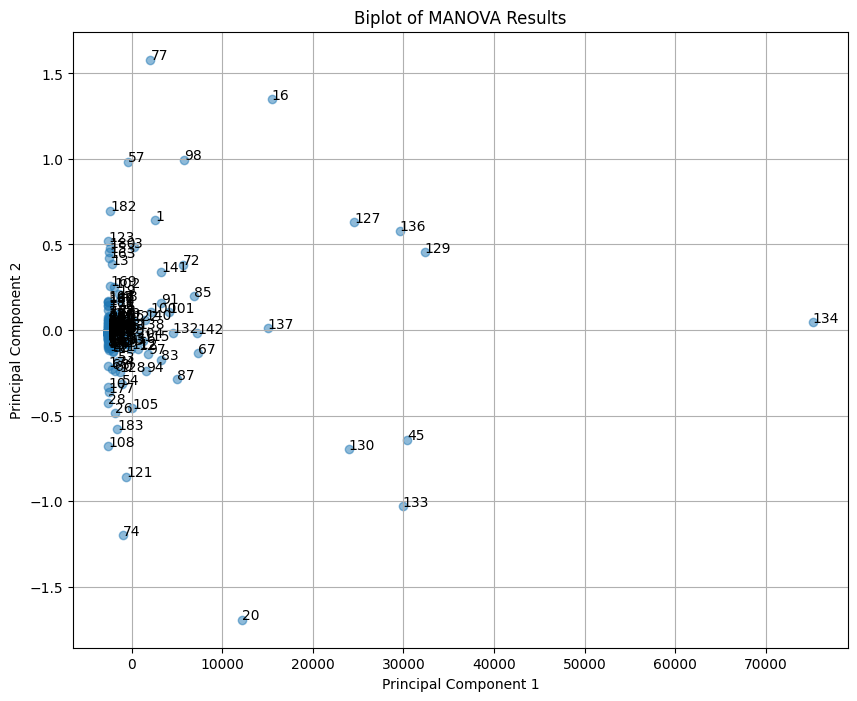

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA

# Extract the dependent variables
dependent_vars = df_manova[['Juicios', 'PC8_RES', 'PC8_PAT','PC12_IND']]

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
components = pca.fit_transform(dependent_vars)

# Create the biplot
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)

# Add labels for each data point (optional)
for i, txt in enumerate(df_manova.index):
    plt.annotate(txt, (components[i, 0], components[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot of MANOVA Results')
plt.grid(True)
plt.show()

In [128]:
!pip install roman


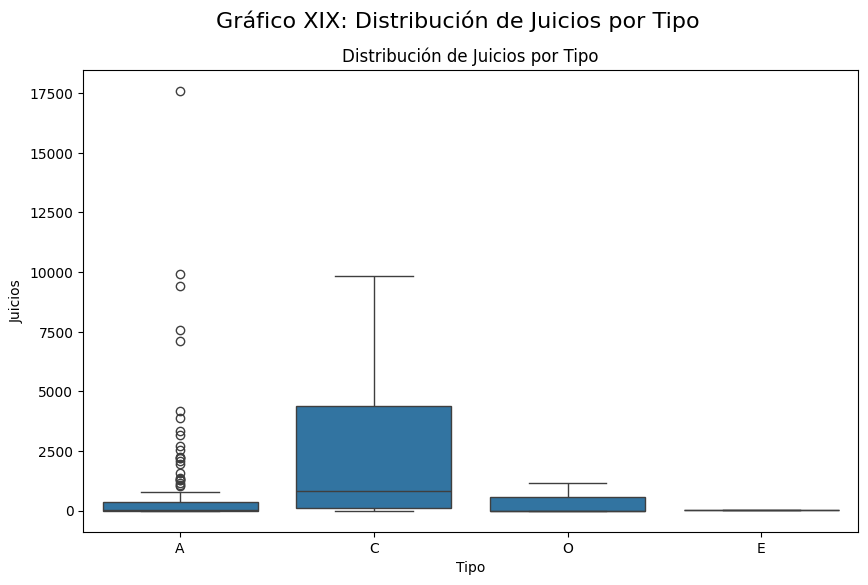

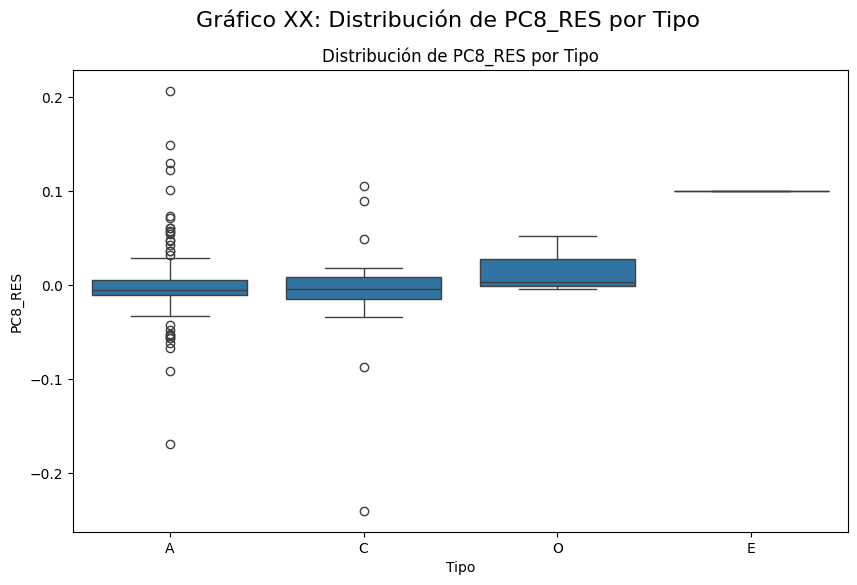

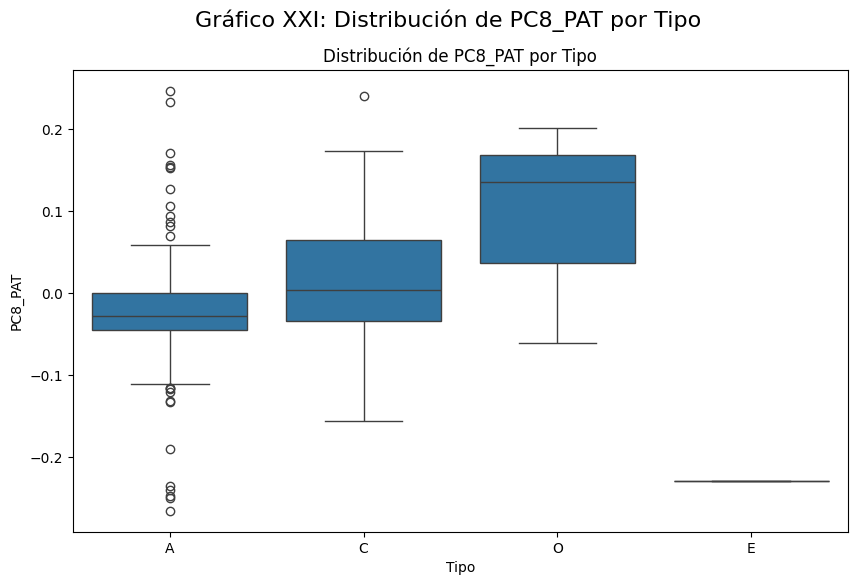

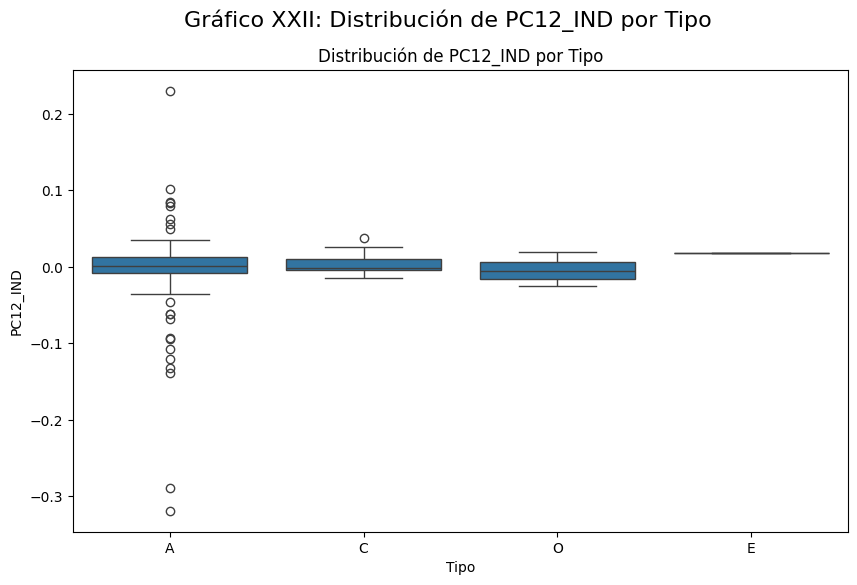

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import roman

# Lista de variables para los gráficos
variables = ['Juicios', 'PC8_RES', 'PC8_PAT','PC12_IND']

# Número romano inicial
num_romano = 19

for i, var in enumerate(variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo', y=var, data=df_manova.loc[df_manova['kmeans'] == 0])

    # Título general con número romano
    plt.suptitle(f"Gráfico {roman.toRoman(num_romano)}: Distribución de {var} por Tipo", fontsize=16)

    # Título específico del gráfico
    plt.title(f'Distribución de {var} por Tipo', fontsize=12)

    plt.show()

    # Incrementar el número romano para el siguiente gráfico
    num_romano += 1

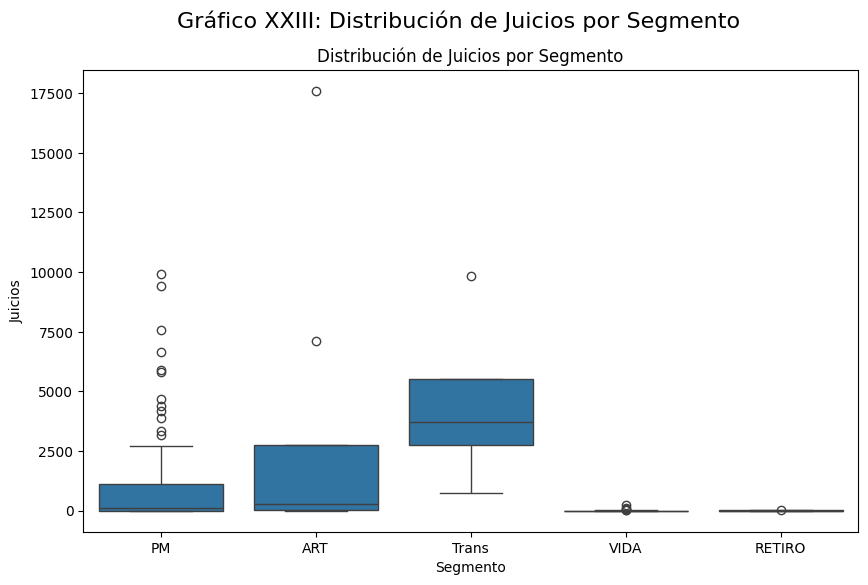

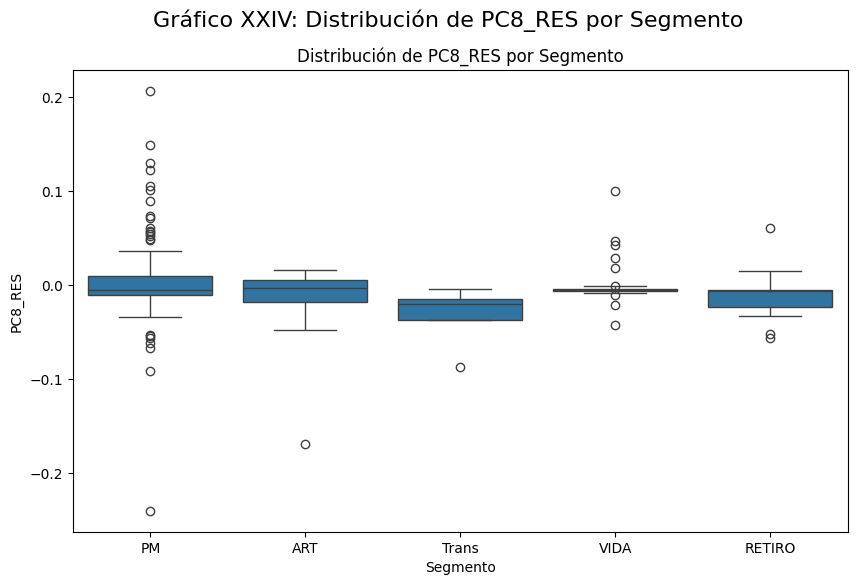

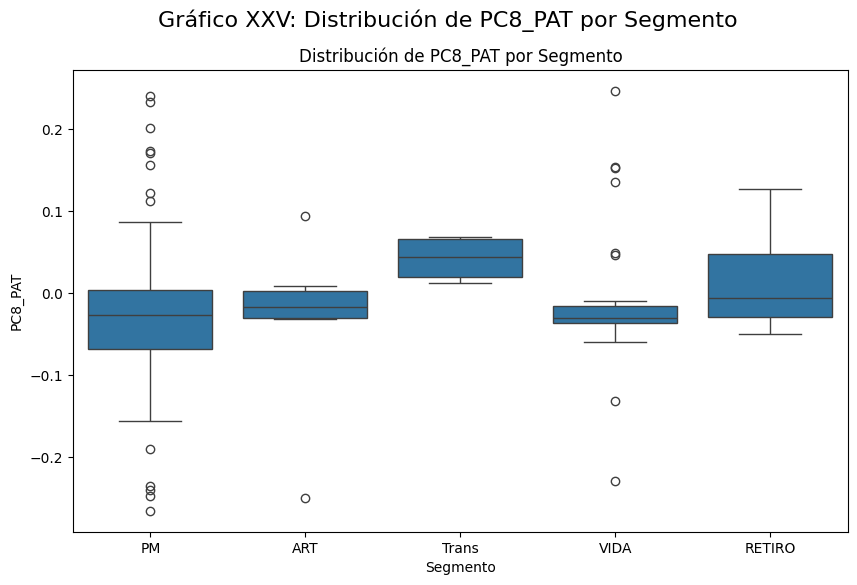

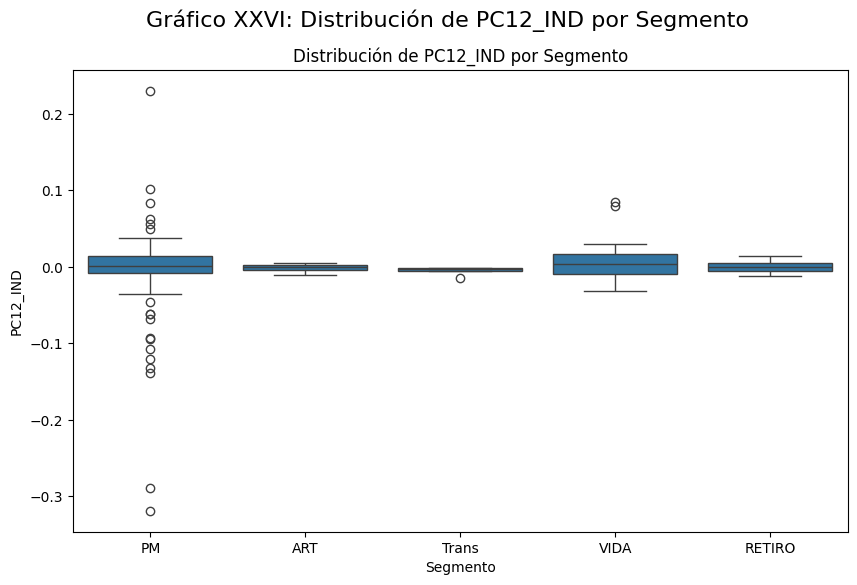

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import roman

# Lista de variables para los gráficos
variables = ['Juicios', 'PC8_RES', 'PC8_PAT','PC12_IND']

# Número romano inicial
num_romano = 23

for i, var in enumerate(variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segmento', y=var, data=df_manova.loc[df_manova['kmeans'] == 0])

    # Título general con número romano
    plt.suptitle(f"Gráfico {roman.toRoman(num_romano)}: Distribución de {var} por Segmento", fontsize=16)

    # Título específico del gráfico
    plt.title(f'Distribución de {var} por Segmento', fontsize=12)

    plt.show()

    # Incrementar el número romano para el siguiente gráfico
    num_romano += 1

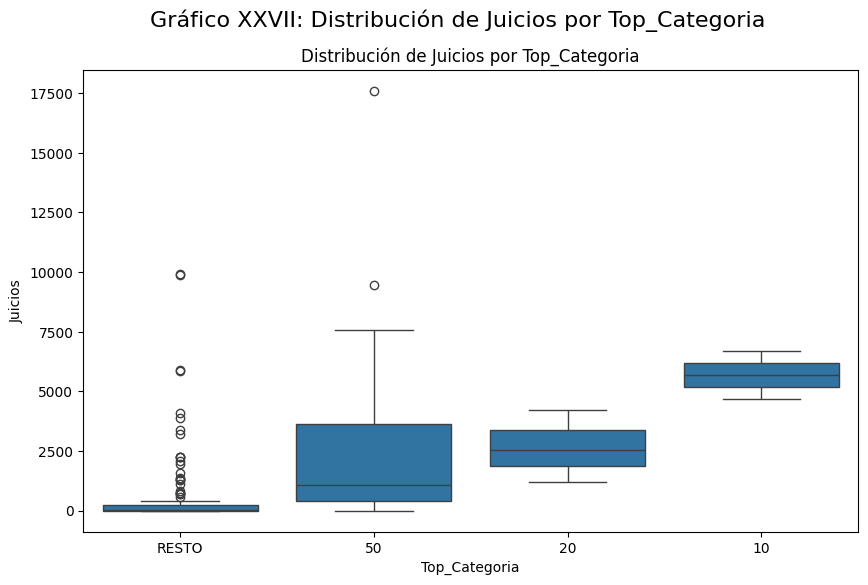

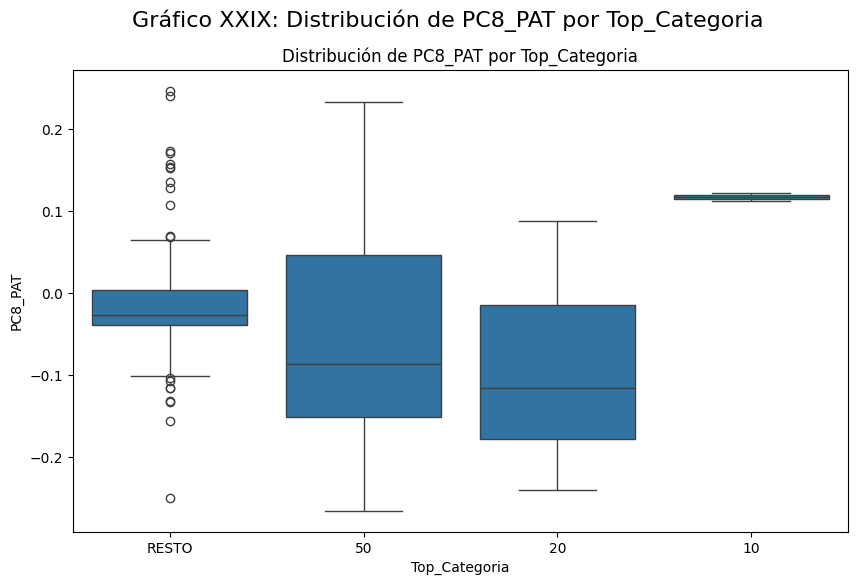

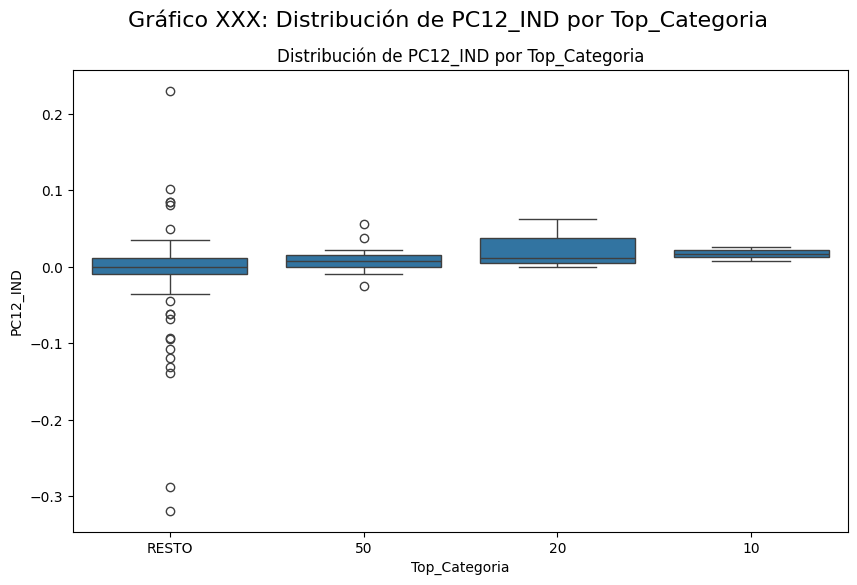

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import roman

# Lista de variables para los gráficos
variables = ['Juicios', 'PC8_RES', 'PC8_PAT','PC12_IND']

# Número romano inicial
num_romano = 27

for i, var in enumerate(variables):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Top_Categoria', y=var, data=df_manova.loc[df_manova['kmeans'] == 0])

    # Título general con número romano
    plt.suptitle(f"Gráfico {roman.toRoman(num_romano)}: Distribución de {var} por Top_Categoria", fontsize=16)

    # Título específico del gráfico
    plt.title(f'Distribución de {var} por Top_Categoria', fontsize=12)

    plt.show()

    # Incrementar el número romano para el siguiente gráfico
    num_romano += 1

### Armado dataframe con PCA Representativo

In [132]:
datas.head()

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0          1          A       PM    92  RESTO       0.0936         40.0   
1          2          C       PM   113  RESTO       0.0599       5180.0   
2          3          A       PM   121  RESTO       0.0487         75.0   
3          4          A       PM    11     20       3.0154       2879.0   
4          5          A       PM   123  RESTO       0.0478       2229.0   

    PC8_PAT   PC8_RES  PC12_IND    cat_comb  kmeans  
0 -0.064581  0.001081 -0.068503  A_PM_RESTO       0  
1  0.655004 -0.042231  0.080473  C_PM_RESTO       1  
2 -0.099615 -0.017211 -0.061297  A_PM_RESTO       0  
3  0.484431  0.068064  0.007700     A_PM_20       1  
4  0.007053 -0.009576  0.023810  A_PM_RESTO       0

In [164]:
extraer_orginal = [0,1,3,4,5,19,20]
df_manova_op = df_original.iloc[:,extraer_orginal]
df_manova_op['PC0_PAT'] = principal_components_pat["PC0"] #PC0, PC1, PC2
#df_manova_op['PC1_PAT'] = principal_components_pat["PC1"]
#df_manova_op['PC2_PAT'] = principal_components_pat["PC2"]
df_manova_op['PC0_RES'] = principal_components_res["PC0"] #PC0, PC1
#df_manova_op['PC1_RES'] = principal_components_res["PC1"]
df_manova_op['PC0_IND'] = principal_components_ind["PC0"]
#df_manova_op['PC1_IND'] = principal_components_ind["PC1"]
#df_manova_op['PC2_IND'] = principal_components_ind["PC2"]
#df_manova_op['PC3_IND'] = principal_components_ind["PC3"]
#df_manova_op['PC4_IND'] = principal_components_ind["PC4"] #PC0, PC1, PC2, PC3, PC4
df_manova_op.head()

Entidad N Entidad NJ SEGMENTO  Rank    TOP  A - GENERAL  B - GENERAL  \
0          1          A       PM    92  RESTO       0.0936         40.0   
1          2          C       PM   113  RESTO       0.0599       5180.0   
2          3          A       PM   121  RESTO       0.0487         75.0   
3          4          A       PM    11     20       3.0154       2879.0   
4          5          A       PM   123  RESTO       0.0478       2229.0   

    PC0_PAT   PC0_RES   PC0_IND  
0 -1.025969 -0.954882  3.198389  
1  0.273398 -0.683769  0.967289  
2 -0.972010 -1.015610  1.831028  
3  5.219417  5.953206  0.912611  
4 -0.811180 -0.976901 -0.289283

In [165]:
#LIBRERIAS
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.multivariate.manova import MANOVA


In [166]:
df_manova_op = df_manova_op.rename(columns={'Entidad NJ': 'Tipo',
                                            'SEGMENTO': 'Segmento',
                                            'TOP': 'Top_Categoria',
                                           'B - GENERAL':'Juicios' })
df_manova_op.head()

Entidad N Tipo Segmento  Rank Top_Categoria  A - GENERAL  Juicios  \
0          1    A       PM    92         RESTO       0.0936     40.0   
1          2    C       PM   113         RESTO       0.0599   5180.0   
2          3    A       PM   121         RESTO       0.0487     75.0   
3          4    A       PM    11            20       3.0154   2879.0   
4          5    A       PM   123         RESTO       0.0478   2229.0   

    PC0_PAT   PC0_RES   PC0_IND  
0 -1.025969 -0.954882  3.198389  
1  0.273398 -0.683769  0.967289  
2 -0.972010 -1.015610  1.831028  
3  5.219417  5.953206  0.912611  
4 -0.811180 -0.976901 -0.289283

### Modelo Manova Variables Optimas

In [167]:
# Crear el modelo MANOVA
md = MANOVA.from_formula('Juicios + PC0_PAT + PC0_RES + PC0_IND  ~ C(Tipo) + C(Segmento) + C(Top_Categoria)', data=df_manova_op)

# Obtener los resultados
print(md.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.1970 4.0000 177.0000 180.3325 0.0000
          Pillai's trace 0.8030 4.0000 177.0000 180.3325 0.0000
  Hotelling-Lawley trace 4.0753 4.0000 177.0000 180.3325 0.0000
     Roy's greatest root 4.0753 4.0000 177.0000 180.3325 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         C(Tipo)         Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.7521 12.0000 468.5895  4.4383 0.0000
          Pillai's trace 0.2612 12.0000 537.0000  4.2684 0.

In [170]:
metric_columns = ['Juicios','PC0_PAT','PC0_RES','PC0_IND']
metric_columns_numbers = [6,7,8,9]
metric = df_manova_op.iloc[:,metric_columns_numbers]
categorical_vars = ['Segmento', 'Top_Categoria']  # Reemplaza con los nombres reales de tus variables categóricas


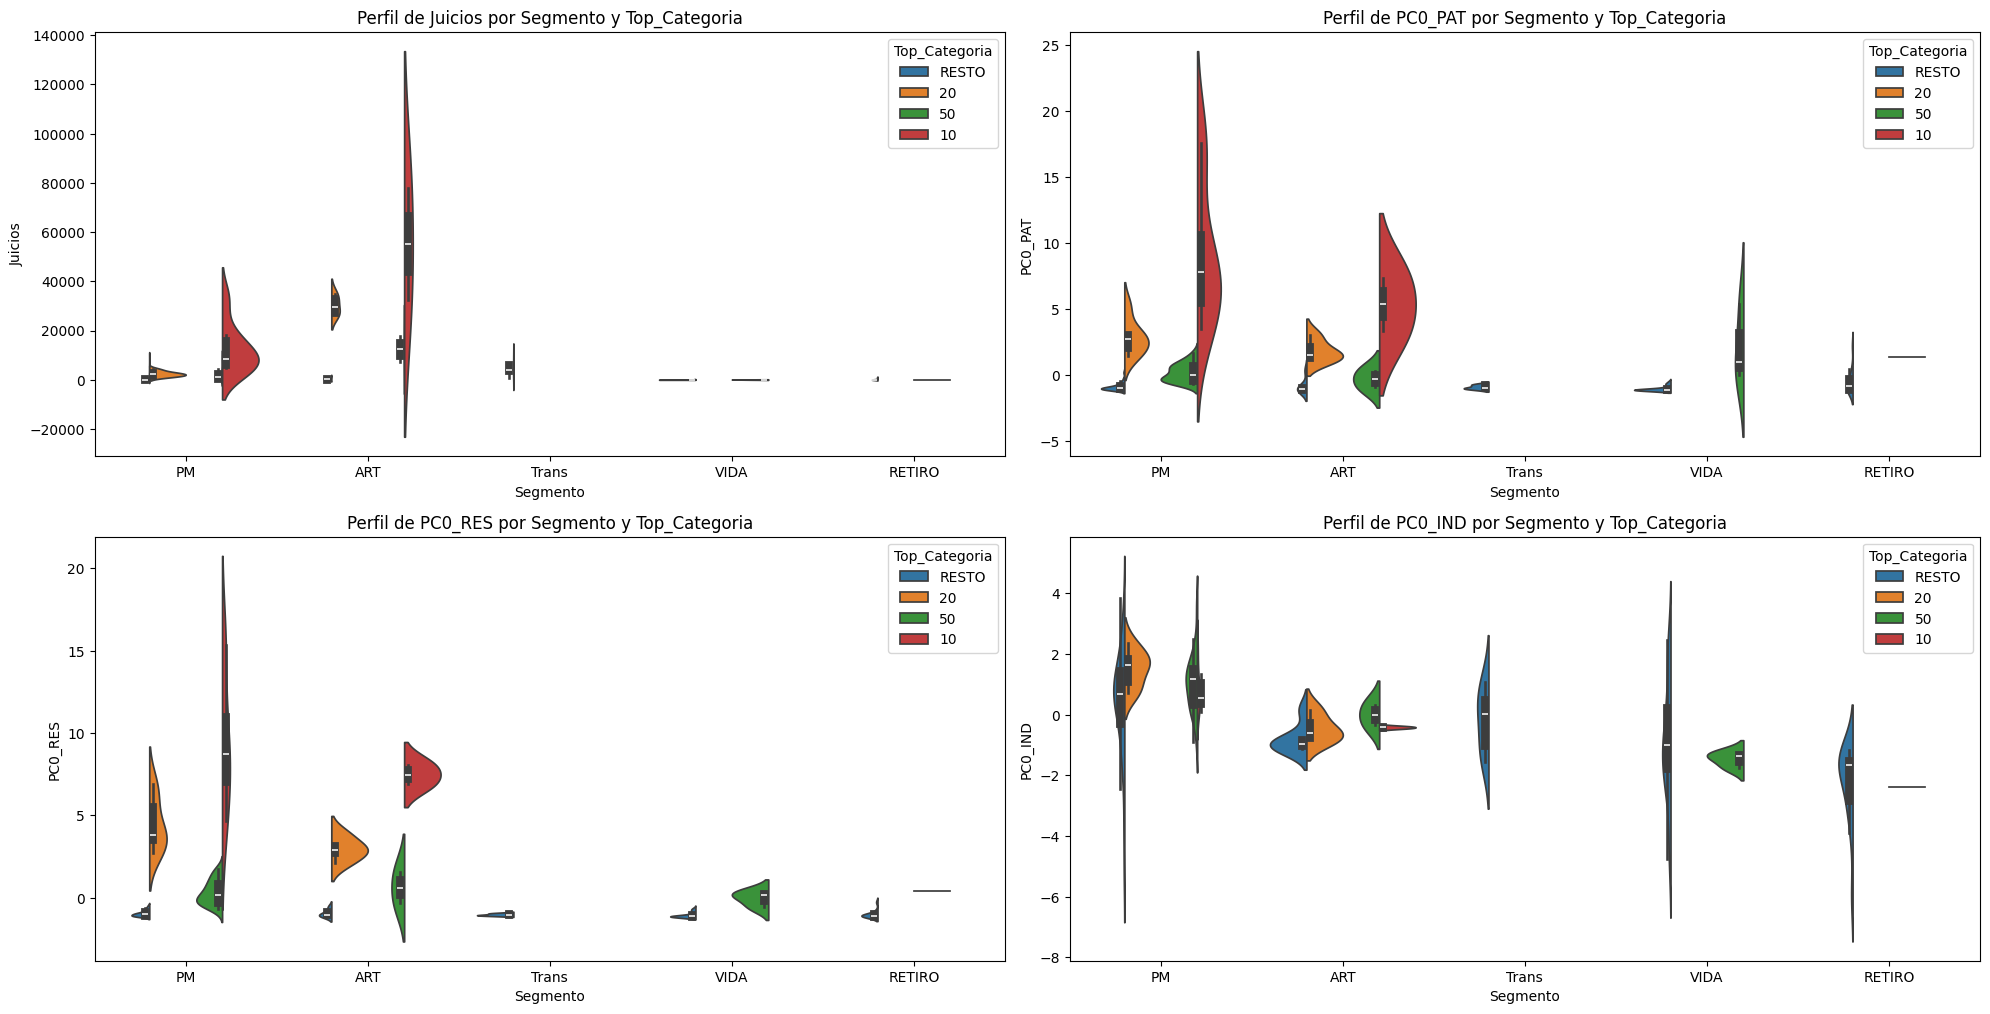

In [171]:
# Configura la figura
plt.figure(figsize=(20, 30))

for i, metric in enumerate(metric_columns, 1):
    plt.subplot(6, 2, i)  # Ajusta según la cantidad de métricas (11 aquí)
    sns.violinplot(x='Segmento', y=metric, hue='Top_Categoria', data=df_manova_op, split=True)
    plt.title(f'Perfil de {metric} por {categorical_vars[0]} y {categorical_vars[1]}')
    plt.tight_layout()

plt.show()

# Repite para otras combinaciones de variables categóricas si es necesario

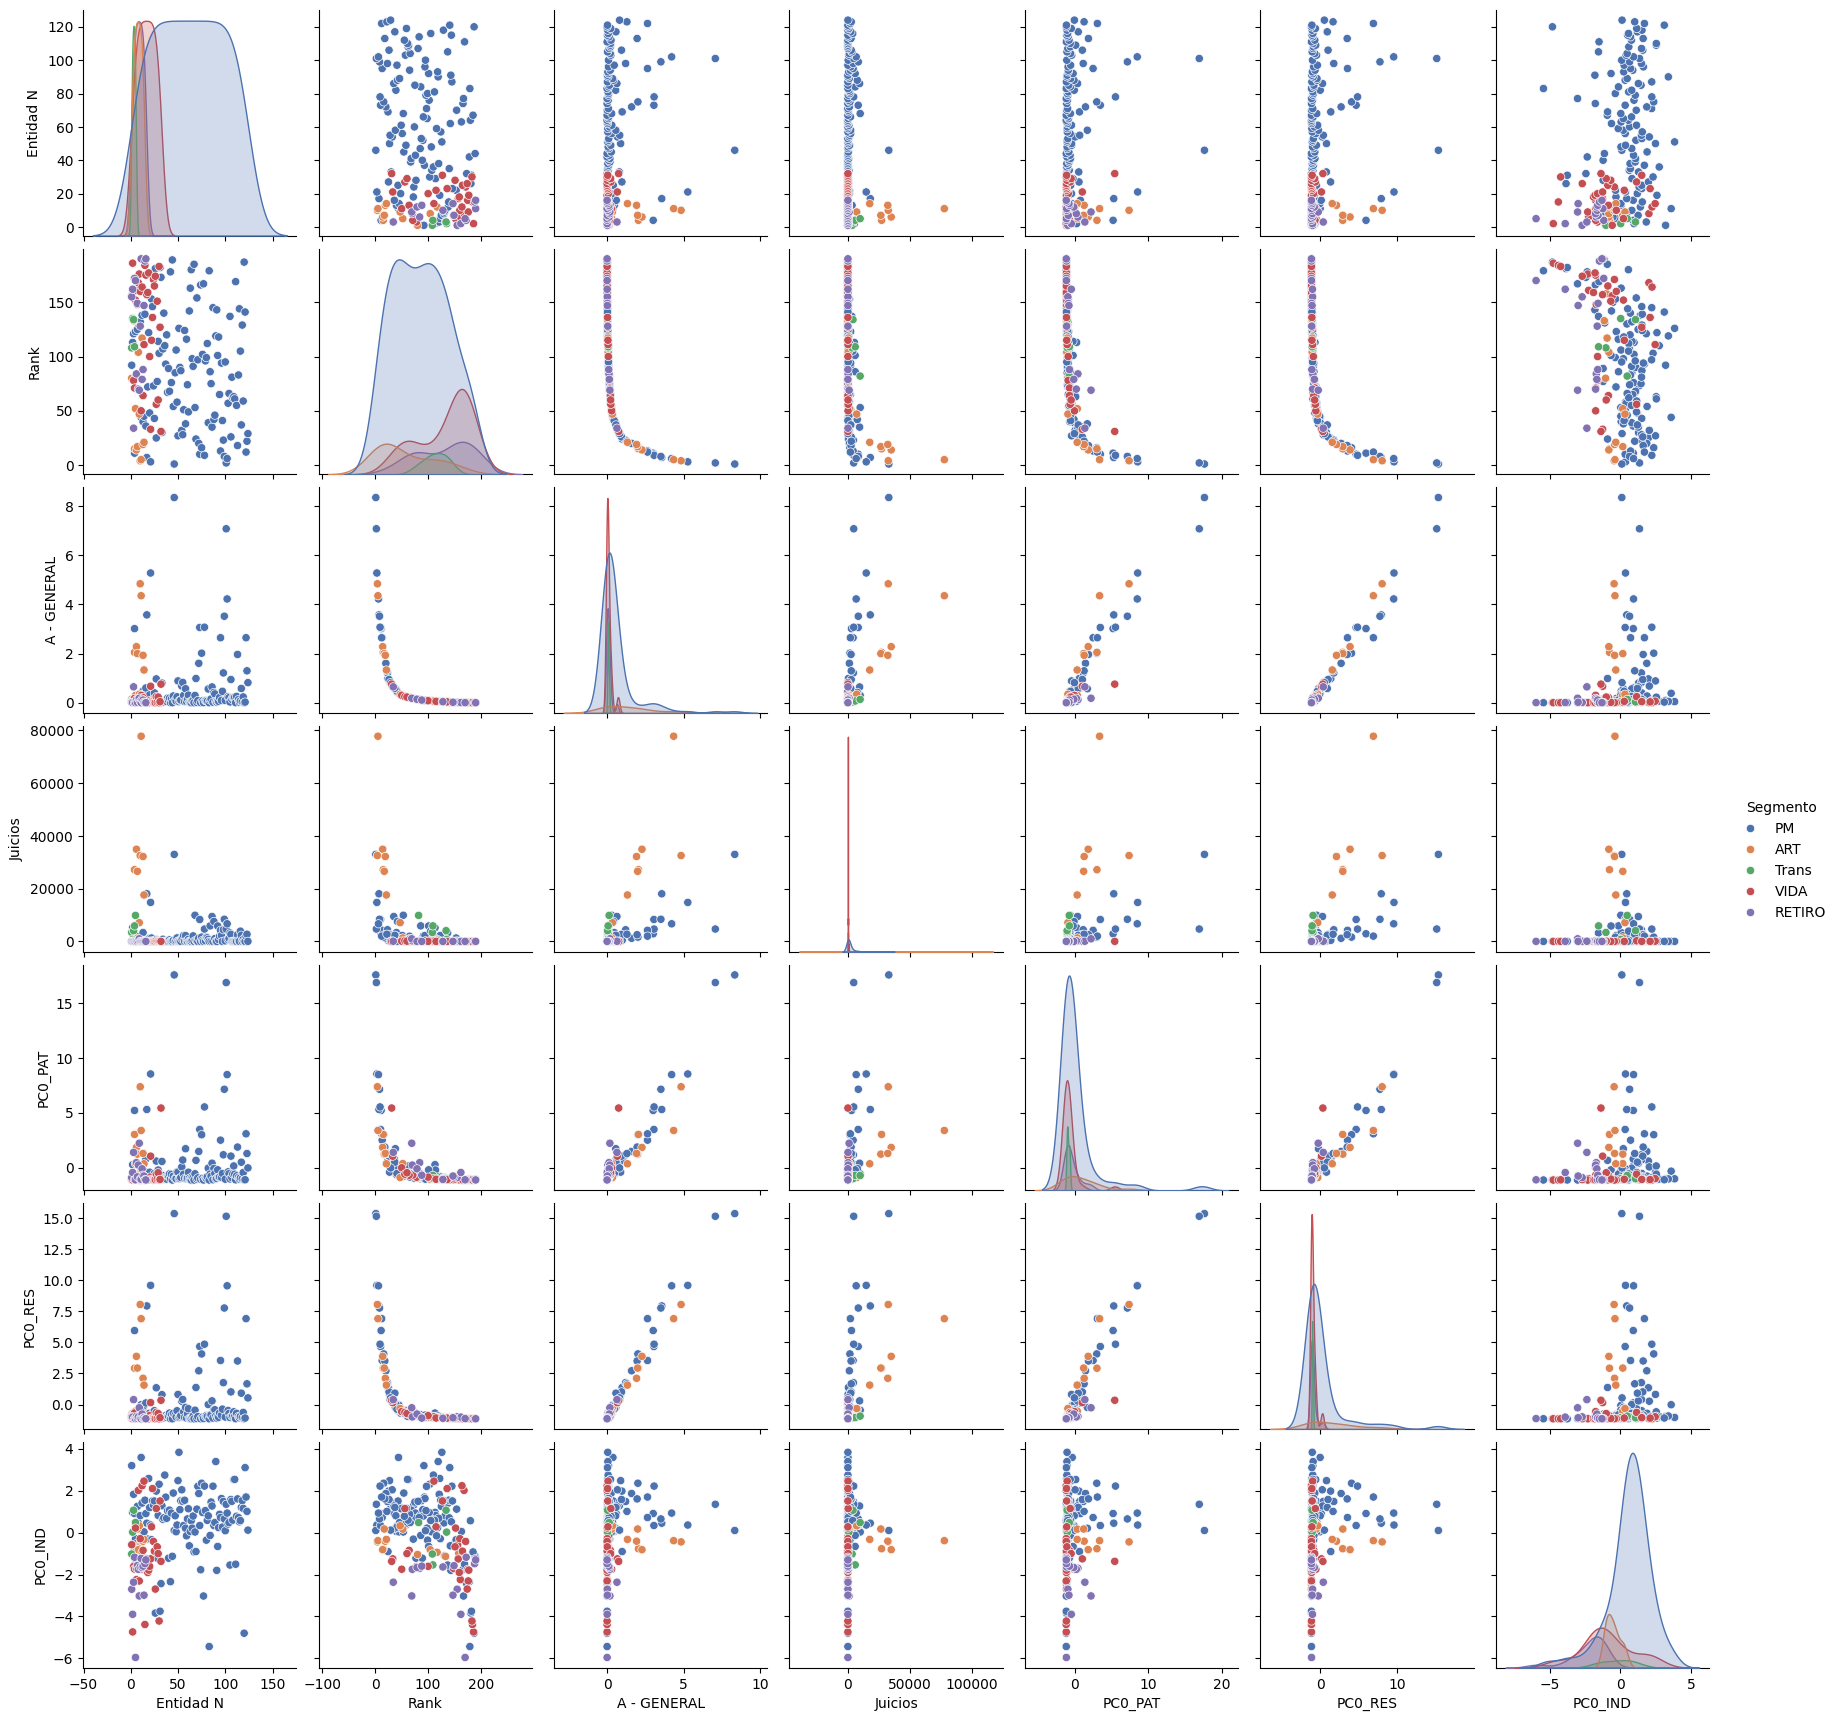

In [172]:
import seaborn as sns
sns.pairplot(df_manova_op, hue='Segmento', hue_order=['PM', 'ART','Trans', 'VIDA', 'RETIRO'], palette='deep')

In [173]:
import plotly.express as px
fig = px.scatter_3d(df_manova_op, x='PC0_PAT', y='PC0_RES', z='PC0_IND', color='Segmento')
fig.show()

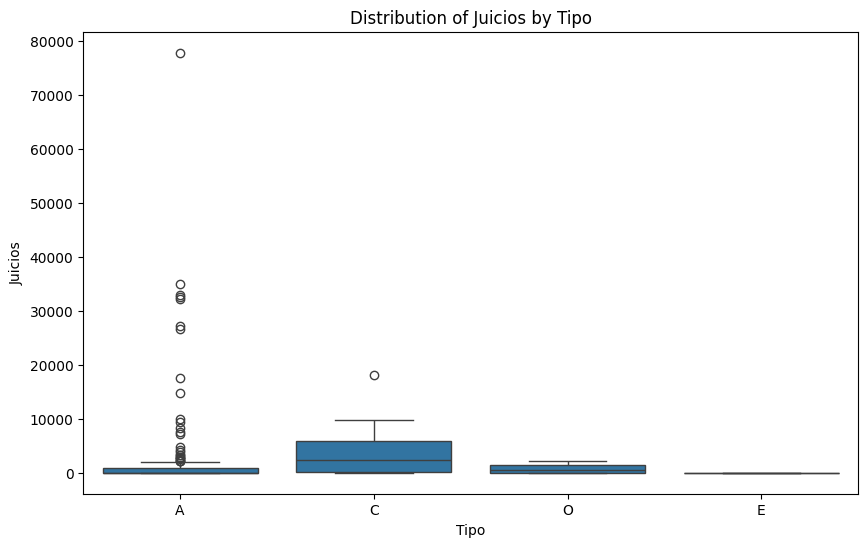

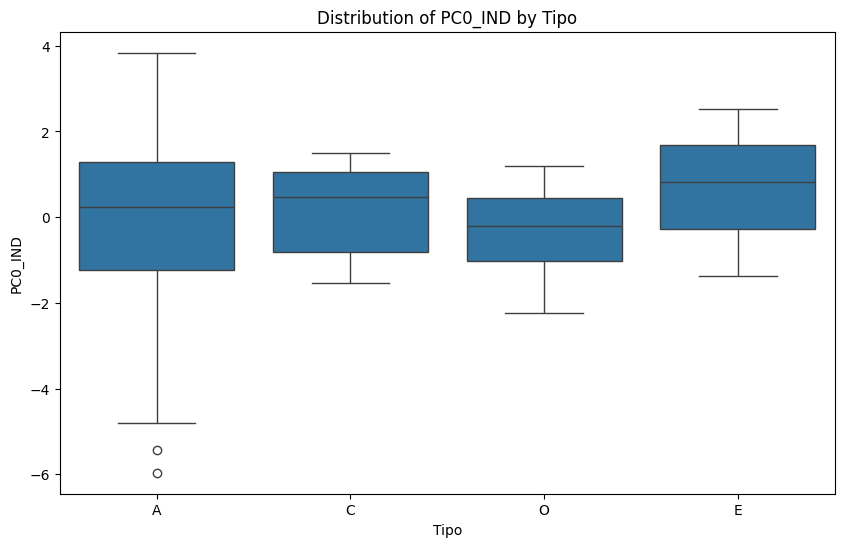

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios','PC0_PAT','PC0_RES','PC0_IND']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo', y=var, data=df_manova_op)
    plt.title(f'Distribution of {var} by Tipo')
    plt.show()



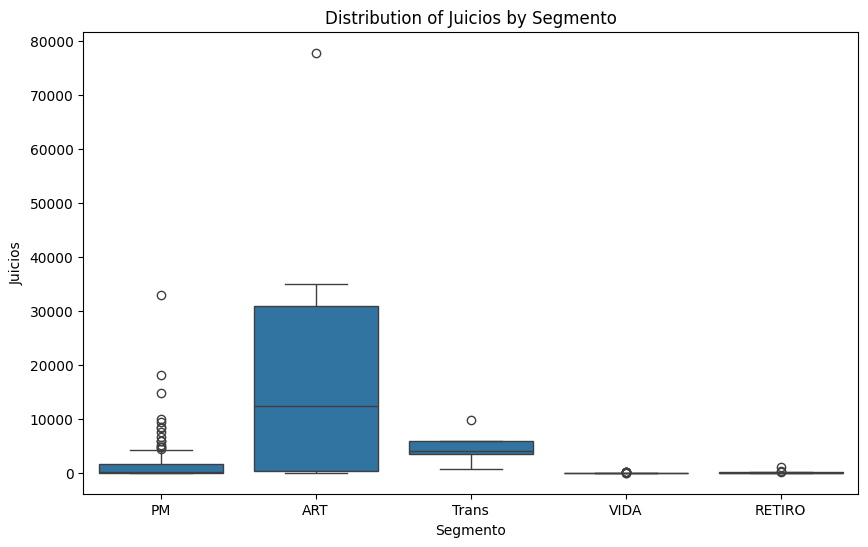

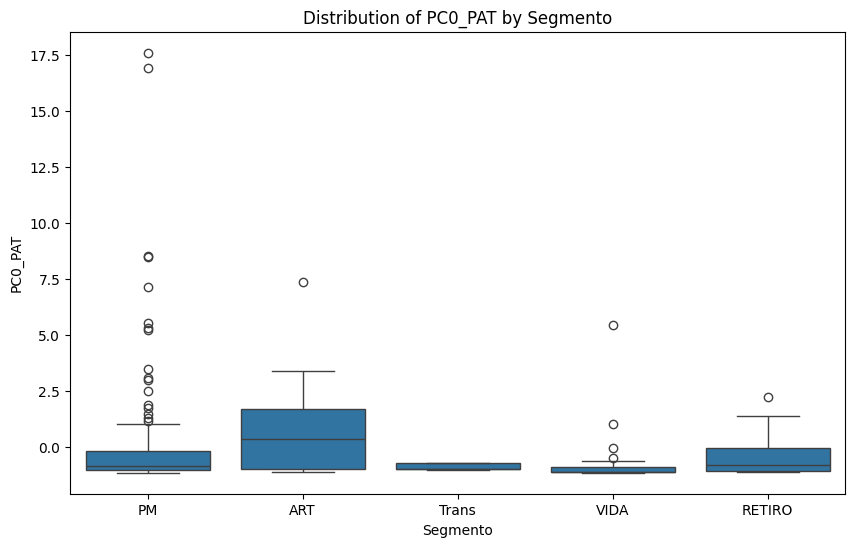

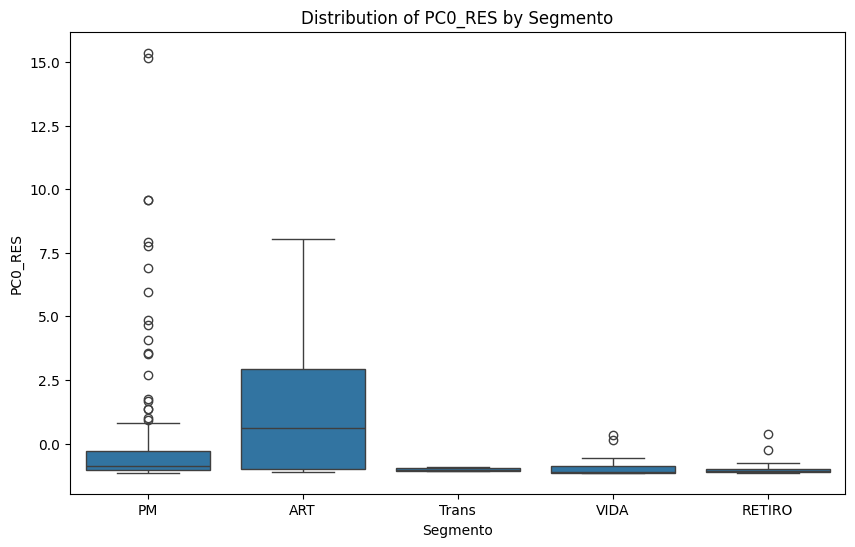

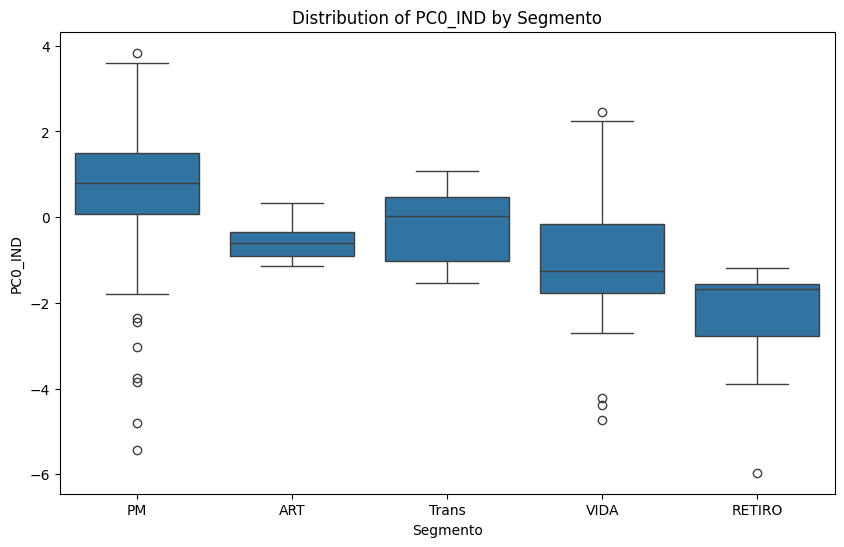

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios','PC0_PAT','PC0_RES','PC0_IND']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Segmento', y=var, data=df_manova_op)
    plt.title(f'Distribution of {var} by Segmento')
    plt.show()



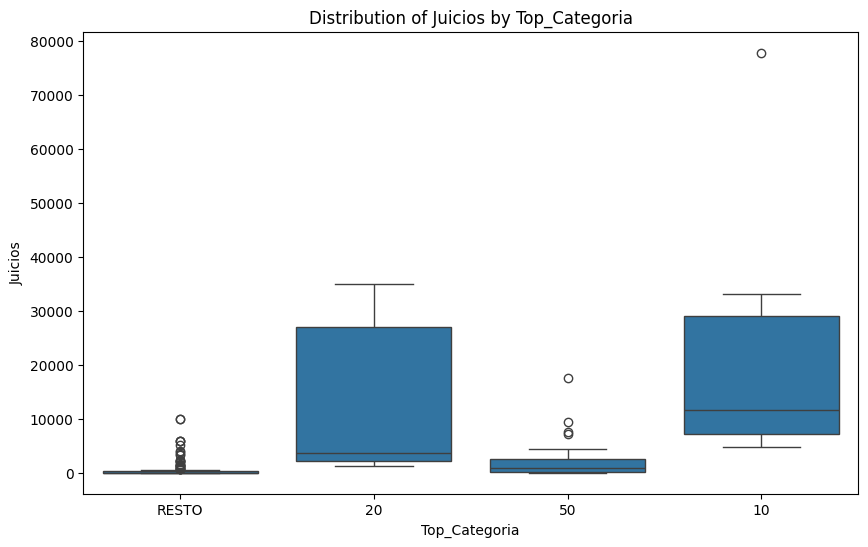

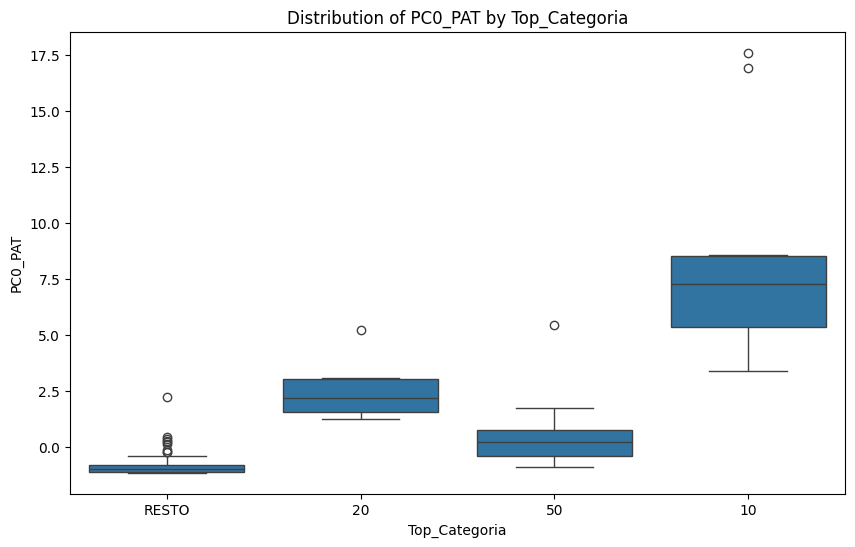

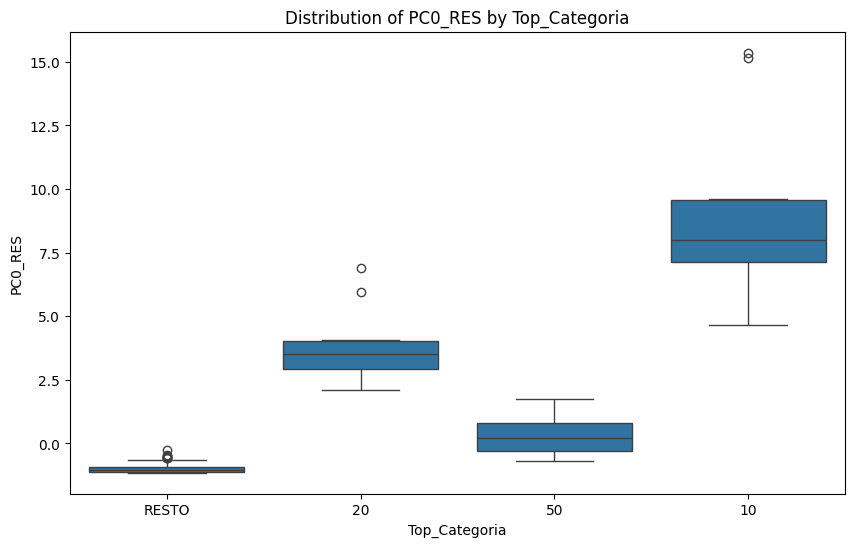

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['Juicios','PC0_PAT','PC0_RES','PC0_IND']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Top_Categoria', y=var, data=df_manova_op)
    plt.title(f'Distribution of {var} by Top_Categoria')
    plt.show()

